In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,mean_squared_error,adjusted_rand_score
from sklearn.model_selection import GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [22]:
data_df = pd.read_csv('concrete_data.csv')
data_df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

In [45]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [46]:
data_df.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

          Strength  
count  1030.000000  
mean     35.817961  
std      16.705742  
min       2.330000  
25%      23.710000  
50%      34.445000  
75%      46.135000  
max      82.600000

In [47]:
data_df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

C:\Users\ssw10\AppData\Local\Temp\ipykernel_24660\395023377.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df.Cement)


<Axes: xlabel='Cement', ylabel='Density'>

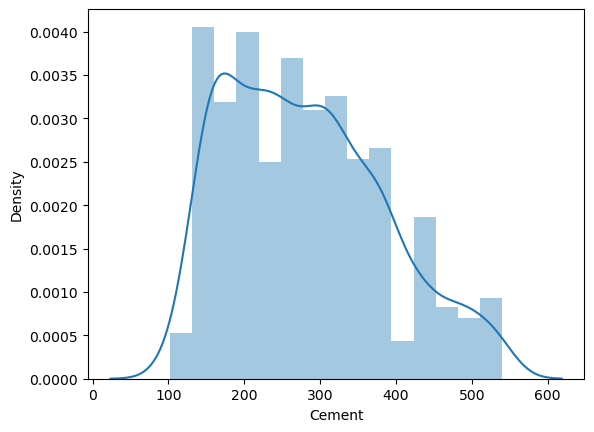

In [51]:
sns.distplot(data_df.Cement)

C:\Users\ssw10\AppData\Local\Temp\ipykernel_24660\1711388546.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['Blast Furnace Slag'])


<Axes: xlabel='Blast Furnace Slag', ylabel='Density'>

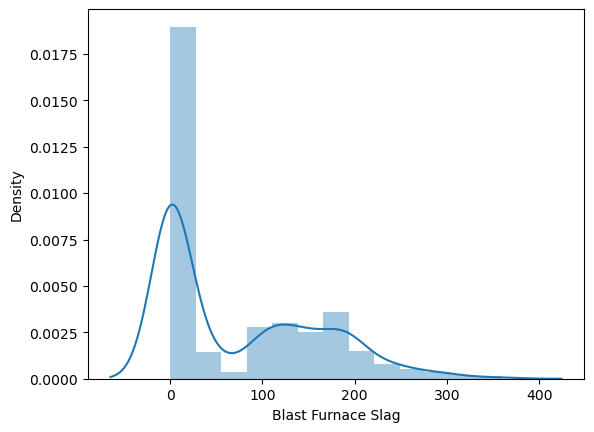

In [54]:
sns.distplot(data_df['Blast Furnace Slag'])

C:\Users\ssw10\AppData\Local\Temp\ipykernel_24660\1832487436.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['Fly Ash'])


<Axes: xlabel='Fly Ash', ylabel='Density'>

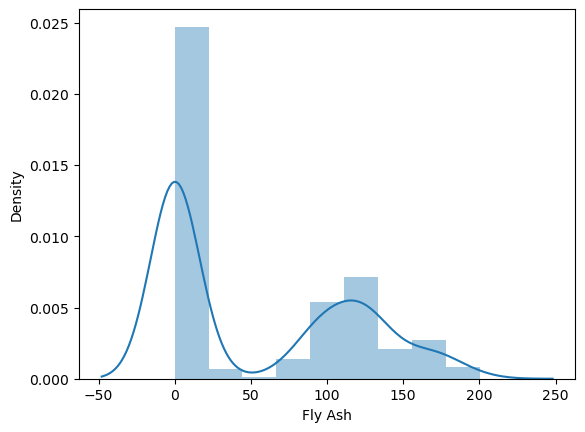

In [56]:
sns.distplot(data_df['Fly Ash'])

C:\Users\ssw10\AppData\Local\Temp\ipykernel_24660\2404959058.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df.Age)


<Axes: xlabel='Age', ylabel='Density'>

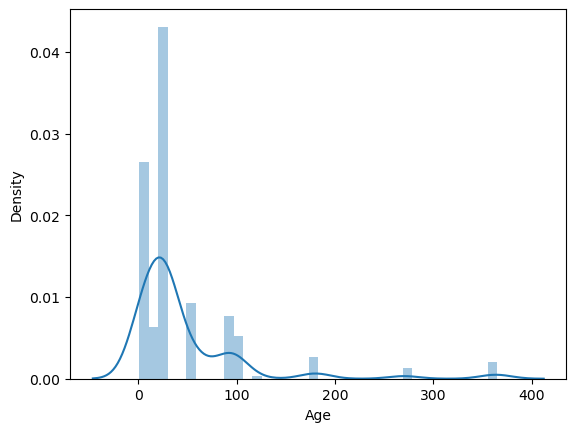

In [57]:
sns.distplot(data_df.Age)

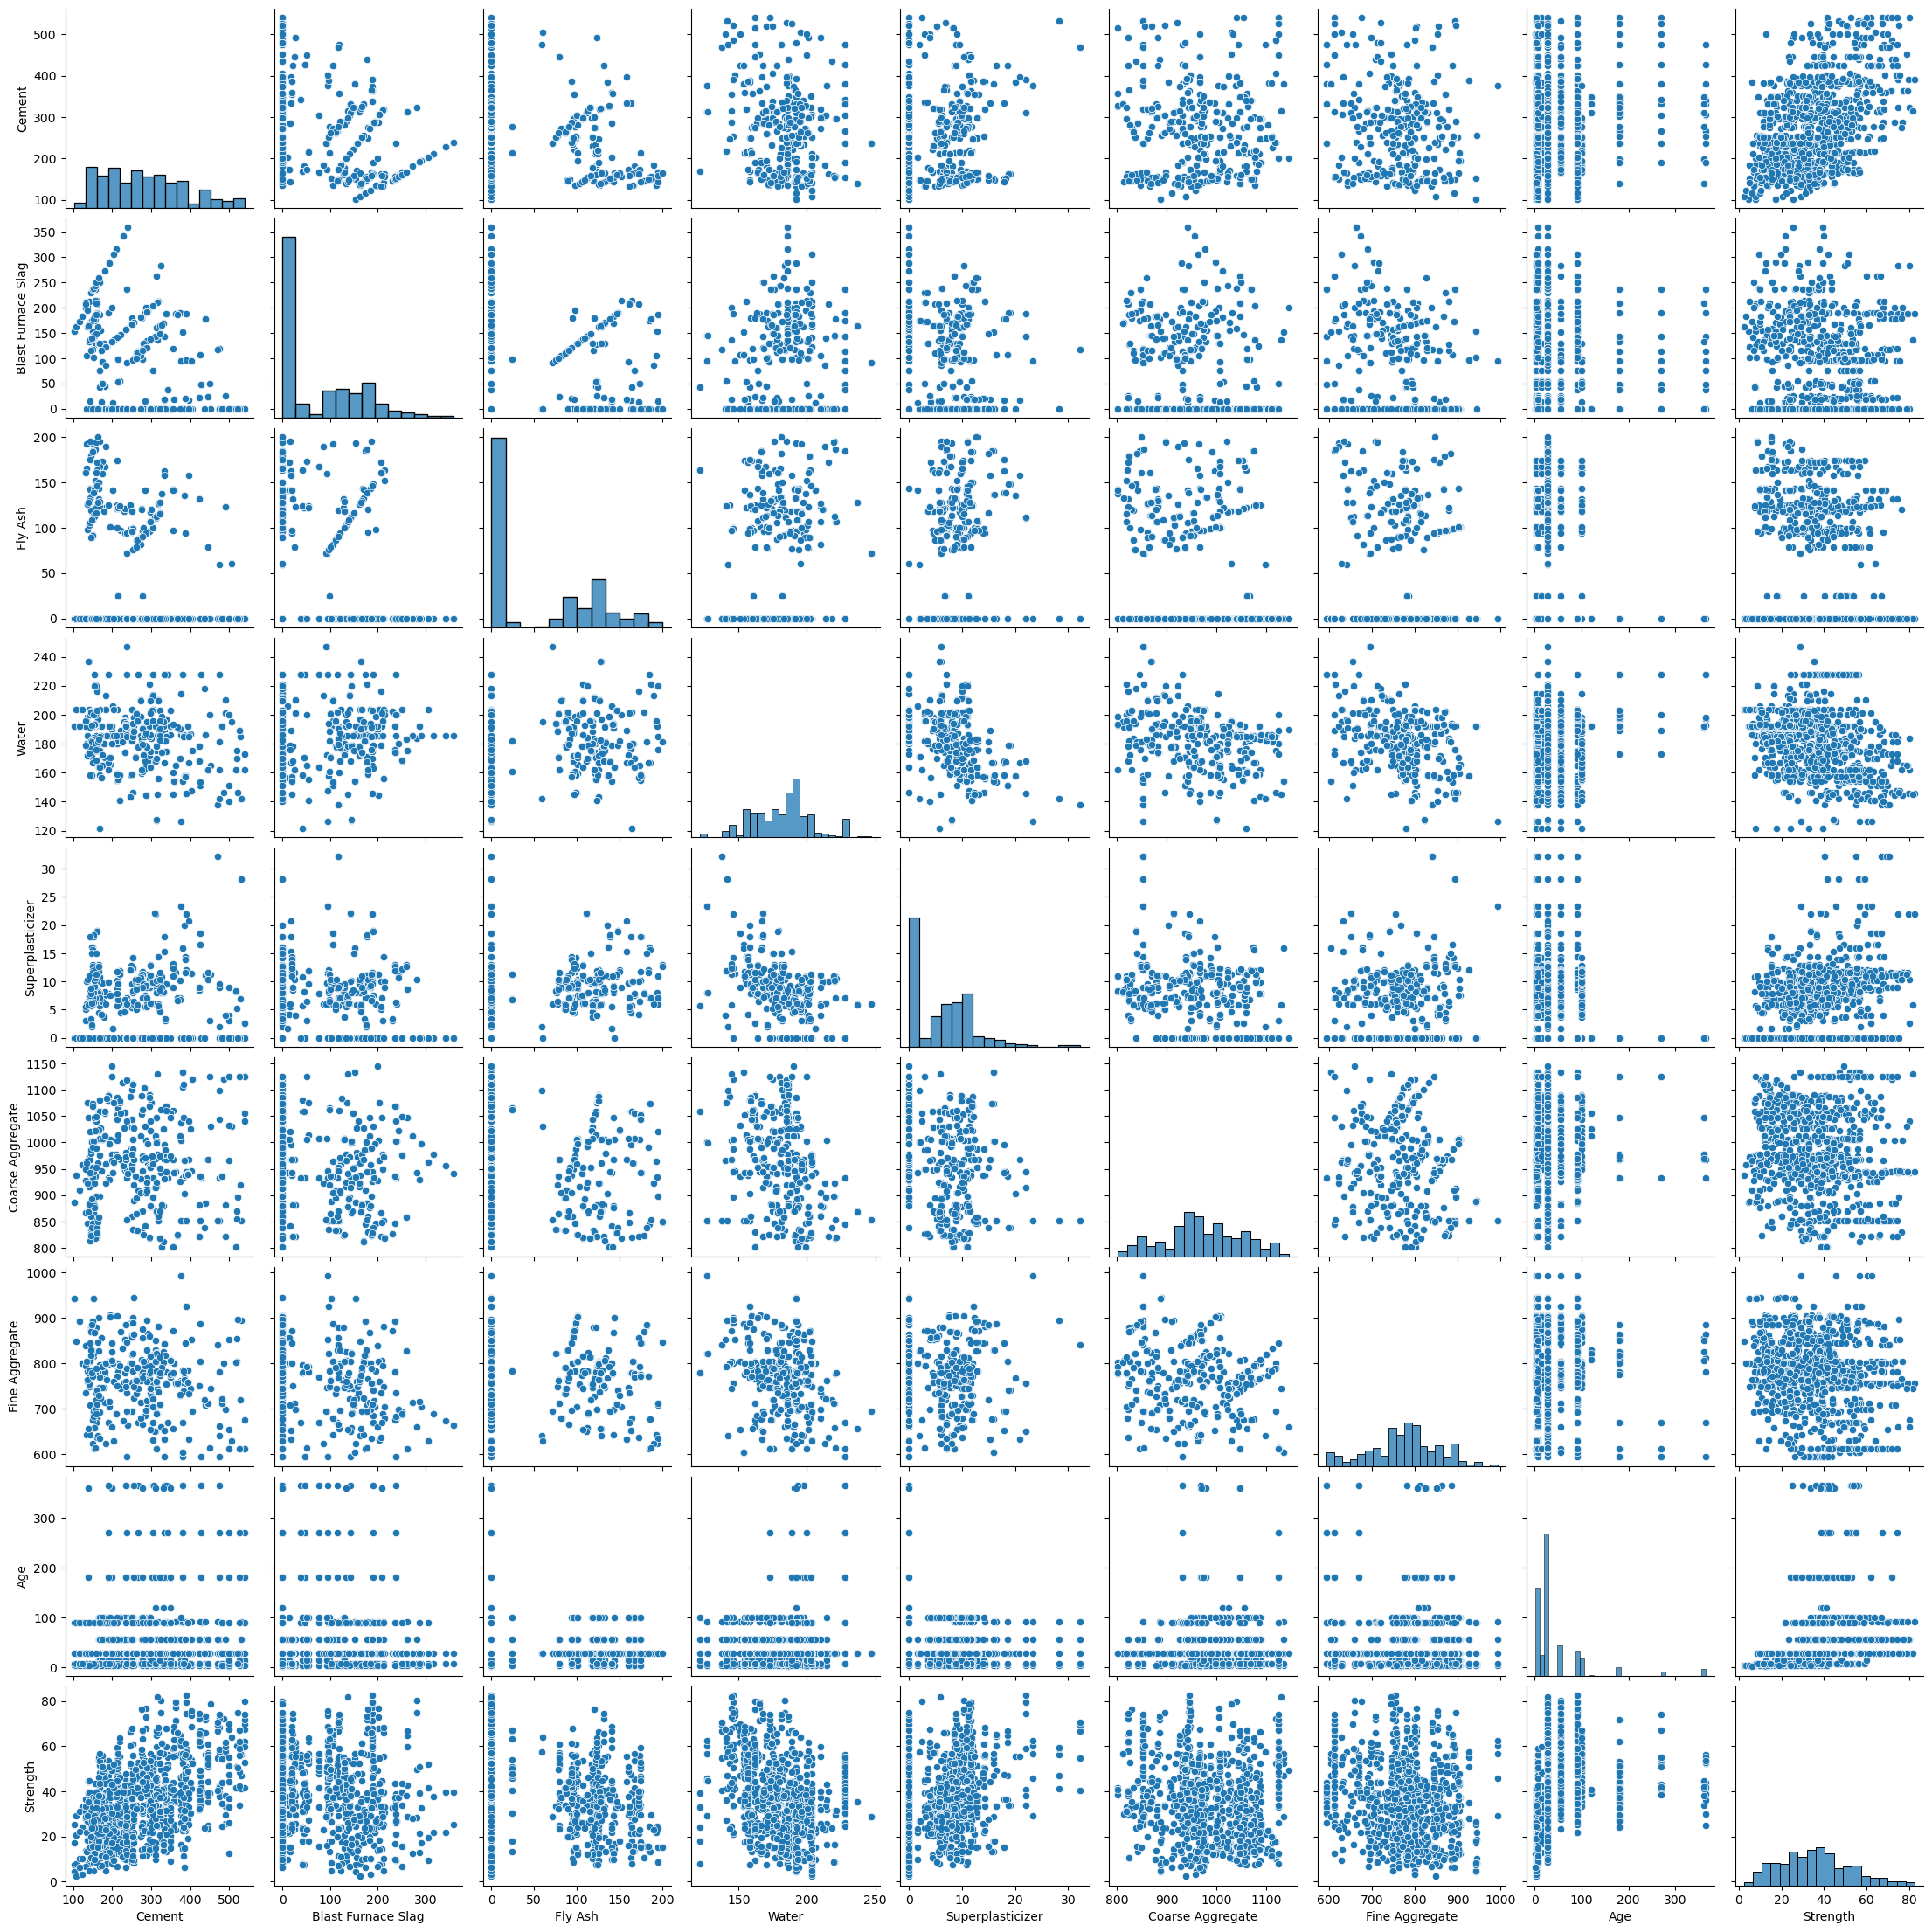

In [58]:
sns.pairplot(data_df)

<Axes: >

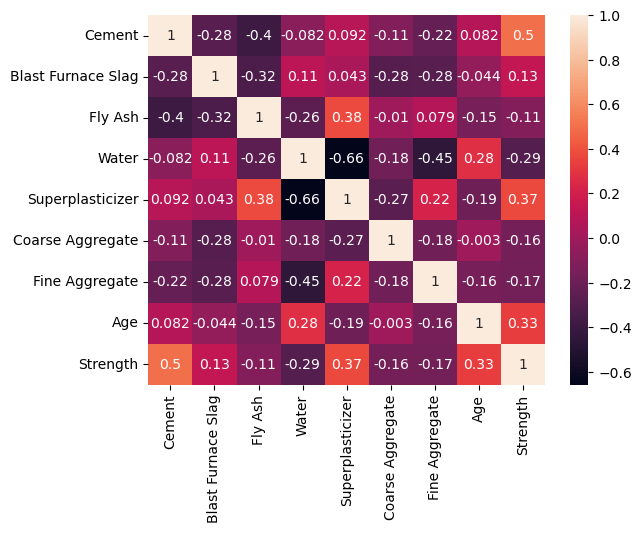

In [49]:
sns.heatmap(data_df.corr(),annot=True)

In [23]:
X = data_df.drop('Strength',axis=1)
y = data_df['Strength']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.40,random_state=101)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
classifier = Sequential()

In [27]:
# First layer of ANN
classifier.add(Dense(128,activation='relu',kernel_initializer='uniform',input_dim=8))
Dropout(rate=0.01)
# second layer of ANN 
classifier.add(Dense(64,activation='relu',kernel_initializer='uniform'))
Dropout(rate=0.01)
# Third layer of ANN
classifier.add(Dense(32,activation='relu',kernel_initializer='uniform'))
Dropout(rate=0.01)
# Fourth layer of ANN
classifier.add(Dense(16,activation='relu',kernel_initializer='uniform'))
Dropout(rate=0.01)

In [28]:
# Output layer
classifier.add(Dense(1,activation='linear',kernel_initializer='uniform'))
Dropout(rate=0.01)

In [29]:
# compiling ANN
classifier.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [30]:
# fitting the ANN
classifier.fit(X_train,y_train,batch_size=64,epochs=600)

Epoch 1/600
7/7 [==============================] - 1s 2ms/step - loss: 1509.7726 - accuracy: 0.0000e+00
Epoch 2/600
7/7 [==============================] - 0s 2ms/step - loss: 1509.0269 - accuracy: 0.0000e+00
Epoch 3/600
7/7 [==============================] - 0s 2ms/step - loss: 1507.8019 - accuracy: 0.0000e+00
Epoch 4/600
7/7 [==============================] - 0s 3ms/step - loss: 1505.2076 - accuracy: 0.0000e+00
Epoch 5/600
7/7 [==============================] - 0s 2ms/step - loss: 1498.6781 - accuracy: 0.0000e+00
Epoch 6/600
7/7 [==============================] - 0s 2ms/step - loss: 1482.5863 - accuracy: 0.0000e+00
Epoch 7/600
7/7 [==============================] - 0s 2ms/step - loss: 1446.4590 - accuracy: 0.0000e+00
Epoch 8/600
7/7 [==============================] - 0s 3ms/step - loss: 1368.9414 - accuracy: 0.0000e+00
Epoch 9/600
7/7 [==============================] - 0s 3ms/step - loss: 1217.6604 - accuracy: 0.0000e+00
Epoch 10/600
7/7 [==============================] - 0s 3ms/step 

7/7 [==============================] - 0s 3ms/step - loss: 98.4128 - accuracy: 0.0000e+00
Epoch 80/600
7/7 [==============================] - 0s 3ms/step - loss: 98.1524 - accuracy: 0.0000e+00
Epoch 81/600
7/7 [==============================] - 0s 2ms/step - loss: 97.8740 - accuracy: 0.0000e+00
Epoch 82/600
7/7 [==============================] - 0s 2ms/step - loss: 97.8079 - accuracy: 0.0000e+00
Epoch 83/600
7/7 [==============================] - 0s 3ms/step - loss: 97.5487 - accuracy: 0.0000e+00
Epoch 84/600
7/7 [==============================] - 0s 2ms/step - loss: 98.3941 - accuracy: 0.0000e+00
Epoch 85/600
7/7 [==============================] - 0s 3ms/step - loss: 98.0992 - accuracy: 0.0000e+00
Epoch 86/600
7/7 [==============================] - 0s 2ms/step - loss: 96.6370 - accuracy: 0.0000e+00
Epoch 87/600
7/7 [==============================] - 0s 2ms/step - loss: 97.2723 - accuracy: 0.0000e+00
Epoch 88/600
7/7 [==============================] - 0s 2ms/step - loss: 96.6733 - accu

7/7 [==============================] - 0s 3ms/step - loss: 93.0736 - accuracy: 0.0000e+00
Epoch 159/600
7/7 [==============================] - 0s 3ms/step - loss: 92.5061 - accuracy: 0.0000e+00
Epoch 160/600
7/7 [==============================] - 0s 2ms/step - loss: 92.8890 - accuracy: 0.0000e+00
Epoch 161/600
7/7 [==============================] - 0s 3ms/step - loss: 92.4604 - accuracy: 0.0000e+00
Epoch 162/600
7/7 [==============================] - 0s 3ms/step - loss: 92.6689 - accuracy: 0.0000e+00
Epoch 163/600
7/7 [==============================] - 0s 2ms/step - loss: 94.1317 - accuracy: 0.0000e+00
Epoch 164/600
7/7 [==============================] - 0s 2ms/step - loss: 92.7098 - accuracy: 0.0000e+00
Epoch 165/600
7/7 [==============================] - 0s 1ms/step - loss: 93.2821 - accuracy: 0.0000e+00
Epoch 166/600
7/7 [==============================] - 0s 2ms/step - loss: 92.8969 - accuracy: 0.0000e+00
Epoch 167/600
7/7 [==============================] - 0s 2ms/step - loss: 92.25

7/7 [==============================] - 0s 2ms/step - loss: 91.5432 - accuracy: 0.0000e+00
Epoch 237/600
7/7 [==============================] - 0s 2ms/step - loss: 92.0466 - accuracy: 0.0000e+00
Epoch 238/600
7/7 [==============================] - 0s 918us/step - loss: 92.2944 - accuracy: 0.0000e+00
Epoch 239/600
7/7 [==============================] - 0s 2ms/step - loss: 91.5164 - accuracy: 0.0000e+00
Epoch 240/600
7/7 [==============================] - 0s 3ms/step - loss: 91.2640 - accuracy: 0.0000e+00
Epoch 241/600
7/7 [==============================] - 0s 2ms/step - loss: 91.7383 - accuracy: 0.0000e+00
Epoch 242/600
7/7 [==============================] - 0s 2ms/step - loss: 91.3290 - accuracy: 0.0000e+00
Epoch 243/600
7/7 [==============================] - 0s 3ms/step - loss: 91.4906 - accuracy: 0.0000e+00
Epoch 244/600
7/7 [==============================] - 0s 2ms/step - loss: 91.0737 - accuracy: 0.0000e+00
Epoch 245/600
7/7 [==============================] - 0s 2ms/step - loss: 91.

7/7 [==============================] - 0s 2ms/step - loss: 90.4803 - accuracy: 0.0000e+00
Epoch 315/600
7/7 [==============================] - 0s 2ms/step - loss: 90.8179 - accuracy: 0.0000e+00
Epoch 316/600
7/7 [==============================] - 0s 2ms/step - loss: 91.0439 - accuracy: 0.0000e+00
Epoch 317/600
7/7 [==============================] - 0s 2ms/step - loss: 90.6143 - accuracy: 0.0000e+00
Epoch 318/600
7/7 [==============================] - 0s 2ms/step - loss: 91.2231 - accuracy: 0.0000e+00
Epoch 319/600
7/7 [==============================] - 0s 2ms/step - loss: 90.5414 - accuracy: 0.0000e+00
Epoch 320/600
7/7 [==============================] - 0s 2ms/step - loss: 91.8035 - accuracy: 0.0000e+00
Epoch 321/600
7/7 [==============================] - 0s 2ms/step - loss: 91.5558 - accuracy: 0.0000e+00
Epoch 322/600
7/7 [==============================] - 0s 2ms/step - loss: 91.0715 - accuracy: 0.0000e+00
Epoch 323/600
7/7 [==============================] - 0s 2ms/step - loss: 91.18

7/7 [==============================] - 0s 2ms/step - loss: 90.1725 - accuracy: 0.0000e+00
Epoch 393/600
7/7 [==============================] - 0s 2ms/step - loss: 90.7695 - accuracy: 0.0000e+00
Epoch 394/600
7/7 [==============================] - 0s 2ms/step - loss: 92.6134 - accuracy: 0.0000e+00
Epoch 395/600
7/7 [==============================] - 0s 1ms/step - loss: 90.2188 - accuracy: 0.0000e+00
Epoch 396/600
7/7 [==============================] - 0s 2ms/step - loss: 91.4581 - accuracy: 0.0000e+00
Epoch 397/600
7/7 [==============================] - 0s 3ms/step - loss: 89.7089 - accuracy: 0.0000e+00
Epoch 398/600
7/7 [==============================] - 0s 2ms/step - loss: 89.8943 - accuracy: 0.0000e+00
Epoch 399/600
7/7 [==============================] - 0s 3ms/step - loss: 90.1914 - accuracy: 0.0000e+00
Epoch 400/600
7/7 [==============================] - 0s 2ms/step - loss: 89.7377 - accuracy: 0.0000e+00
Epoch 401/600
7/7 [==============================] - 0s 3ms/step - loss: 90.21

7/7 [==============================] - 0s 3ms/step - loss: 69.0094 - accuracy: 0.0000e+00
Epoch 471/600
7/7 [==============================] - 0s 2ms/step - loss: 68.1650 - accuracy: 0.0000e+00
Epoch 472/600
7/7 [==============================] - 0s 3ms/step - loss: 67.7376 - accuracy: 0.0000e+00
Epoch 473/600
7/7 [==============================] - 0s 3ms/step - loss: 67.3804 - accuracy: 0.0000e+00
Epoch 474/600
7/7 [==============================] - 0s 2ms/step - loss: 66.3016 - accuracy: 0.0000e+00
Epoch 475/600
7/7 [==============================] - 0s 2ms/step - loss: 65.4475 - accuracy: 0.0000e+00
Epoch 476/600
7/7 [==============================] - 0s 1ms/step - loss: 65.1475 - accuracy: 0.0000e+00
Epoch 477/600
7/7 [==============================] - 0s 2ms/step - loss: 65.0418 - accuracy: 0.0000e+00
Epoch 478/600
7/7 [==============================] - 0s 837us/step - loss: 63.6435 - accuracy: 0.0000e+00
Epoch 479/600
7/7 [==============================] - 0s 3ms/step - loss: 62.

7/7 [==============================] - 0s 4ms/step - loss: 40.5873 - accuracy: 0.0000e+00
Epoch 549/600
7/7 [==============================] - 0s 2ms/step - loss: 40.0362 - accuracy: 0.0000e+00
Epoch 550/600
7/7 [==============================] - 0s 2ms/step - loss: 40.3244 - accuracy: 0.0000e+00
Epoch 551/600
7/7 [==============================] - 0s 2ms/step - loss: 39.9582 - accuracy: 0.0000e+00
Epoch 552/600
7/7 [==============================] - 0s 2ms/step - loss: 39.4761 - accuracy: 0.0000e+00
Epoch 553/600
7/7 [==============================] - 0s 3ms/step - loss: 39.5205 - accuracy: 0.0000e+00
Epoch 554/600
7/7 [==============================] - 0s 3ms/step - loss: 39.8135 - accuracy: 0.0000e+00
Epoch 555/600
7/7 [==============================] - 0s 3ms/step - loss: 38.8859 - accuracy: 0.0000e+00
Epoch 556/600
7/7 [==============================] - 0s 3ms/step - loss: 39.2172 - accuracy: 0.0000e+00
Epoch 557/600
7/7 [==============================] - 0s 2ms/step - loss: 38.48

In [31]:
# making predictions on the test set
y_pred = classifier.predict(X_test)
y_pred

20/20 [==============================] - 0s 2ms/step


array([[ 7.3050094],
       [13.909076 ],
       [32.33875  ],
       [15.705732 ],
       [36.27957  ],
       [43.451984 ],
       [57.806705 ],
       [12.806539 ],
       [51.462788 ],
       [52.37901  ],
       [24.777485 ],
       [33.23368  ],
       [43.217426 ],
       [55.538    ],
       [15.2020235],
       [43.16187  ],
       [15.91964  ],
       [47.586376 ],
       [32.114063 ],
       [ 9.017343 ],
       [31.341917 ],
       [44.270107 ],
       [52.679733 ],
       [26.791183 ],
       [49.083256 ],
       [26.35521  ],
       [21.352484 ],
       [29.5924   ],
       [40.80776  ],
       [65.52451  ],
       [41.631763 ],
       [86.37231  ],
       [30.273418 ],
       [76.433365 ],
       [13.367589 ],
       [29.15927  ],
       [36.73716  ],
       [45.92781  ],
       [32.234364 ],
       [19.358805 ],
       [51.081524 ],
       [51.440647 ],
       [50.038544 ],
       [60.467915 ],
       [56.847004 ],
       [26.08724  ],
       [37.054447 ],
       [26.94

In [32]:
# computing R2 value
r2 = r2_score(y_test,y_pred)
r2

0.8435927723254081

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
def baseline_model():
    model=Sequential()
    model.add(Dense(units=4,activation='relu',kernel_initializer='uniform',input_dim=8))
    model.add(Dense(units=4,activation='relu',kernel_initializer='uniform'))
    model.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [38]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [39]:
from scikeras.wrappers import KerasRegressor
estimator = KerasRegressor(build_fn=baseline_model)

In [40]:
parameters = {'batch_size': [15,25, 32],'epochs': [100, 300 ,500]}
grid_search = GridSearchCV(estimator = estimator,param_grid = parameters,cv = 10)

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 0s 2ms/step - loss: 1502.1871
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 1499.8256
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 1496.4617
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 1491.0967
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 1482.8740
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 1470.5801
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 1453.3033
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 1430.0985
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 1399.5881
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 1362.5955
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 1317.7101
Epoch 12/100
25/25 [==============================] - 0s 2ms/step - loss: 1264.3564
Epoch 13/100


25/25 [==============================] - 0s 2ms/step - loss: 106.6981
Epoch 100/100
3/3 [==============================] - 0s 2ms/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 0s 1ms/step - loss: 1498.2395
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 1496.1669
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 1493.6628
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 1490.4568
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 1486.2211
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 1480.5439
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 1472.9689
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 1463.2644
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 1451.2059
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 1435.8491
Epoch 11/100
25/25 [==============================] - 0s 1ms/step - loss: 1417.8408
Epoch 12/100
25/25 [==============================] - 0s 1ms/step - loss: 1396.0171
Epoch 13/100


25/25 [==============================] - 0s 2ms/step - loss: 128.4977
Epoch 100/100
3/3 [==============================] - 0s 2ms/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 1s 2ms/step - loss: 1528.0598
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 1525.7491
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 1522.3369
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1516.8143
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 1508.6257
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 1496.1383
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 1478.3901
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 1455.4548
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 1424.7686
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 1387.8535
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 1343.0844
Epoch 12/100
25/25 [==============================] - 0s 2ms/step - loss: 1291.3792
Epoch 13/100


25/25 [==============================] - 0s 1ms/step - loss: 114.4658
Epoch 100/100
3/3 [==============================] - 0s 4ms/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 1s 2ms/step - loss: 1497.7798
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 1495.8024
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 1493.4713
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 1490.5258
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 1486.5625
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 1481.2450
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 1474.2323
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 1465.1254
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 1453.7078
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 1439.4902
Epoch 11/100
25/25 [==============================] - 0s 1ms/step - loss: 1421.9363
Epoch 12/100
25/25 [==============================] - 0s 2ms/step - loss: 1401.4830
Epoch 13/100


25/25 [==============================] - 0s 2ms/step - loss: 129.7762
Epoch 100/100
3/3 [==============================] - 0s 0s/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 0s 1ms/step - loss: 1534.3379
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 1532.2656
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 1529.5957
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 1525.8354
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 1520.3413
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 1512.1379
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 1500.8558
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 1485.8164
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 1465.7845
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 1440.8751
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 1410.4773
Epoch 12/100
25/25 [==============================] - 0s 1ms/step - loss: 1374.3455
Epoch 13/100


25/25 [==============================] - 0s 1ms/step - loss: 107.2235
Epoch 100/100
3/3 [==============================] - 0s 0s/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 0s 1ms/step - loss: 1492.7661
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 1490.2780
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 1486.8213
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 1481.6694
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 1473.7739
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 1462.1597
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 1445.8773
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 1423.8657
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 1395.5352
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 1359.4985
Epoch 11/100
25/25 [==============================] - 0s 1ms/step - loss: 1317.4606
Epoch 12/100
25/25 [==============================] - 0s 2ms/step - loss: 1267.7726
Epoch 13/100


25/25 [==============================] - 0s 1ms/step - loss: 100.3624
Epoch 100/100
3/3 [==============================] - 0s 925us/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 1s 1ms/step - loss: 1489.9269
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 1487.9091
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 1485.5200
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 1482.1521
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 1477.0359
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 1469.2823
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 1457.8804
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 1442.3622
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 1422.1289
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 1396.2300
Epoch 11/100
25/25 [==============================] - 0s 1ms/step - loss: 1364.2134
Epoch 12/100
25/25 [==============================] - 0s 2ms/step - loss: 1326.3279
Epoch 13/100


25/25 [==============================] - 0s 2ms/step - loss: 108.3981
Epoch 100/100
3/3 [==============================] - 0s 6ms/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 0s 1ms/step - loss: 1507.2855
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 1504.9894
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 1501.7825
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 1496.9130
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 1489.2363
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 1477.7938
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 1461.7252
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 1439.4299
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 1410.9128
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 1375.6019
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 1331.8236
Epoch 12/100
25/25 [==============================] - 0s 1ms/step - loss: 1281.4259
Epoch 13/100


25/25 [==============================] - 0s 2ms/step - loss: 104.9588
Epoch 100/100
3/3 [==============================] - 0s 1ms/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 1s 2ms/step - loss: 1518.9379
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 1516.7474
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 1513.8494
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 1509.8240
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 1503.9073
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 1495.1958
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 1483.0336
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 1466.7268
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 1445.6237
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 1419.1681
Epoch 11/100
25/25 [==============================] - 0s 1ms/step - loss: 1387.5515
Epoch 12/100
25/25 [==============================] - 0s 1ms/step - loss: 1348.9637
Epoch 13/100


25/25 [==============================] - 0s 2ms/step - loss: 110.4265
Epoch 100/100
3/3 [==============================] - 0s 2ms/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 1s 2ms/step - loss: 1521.4073
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 1518.9966
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 1515.5900
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 1510.4517
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 1502.3600
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 1490.3086
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 1472.8303
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 1449.2955
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 1418.4137
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 1380.1282
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 1333.1486
Epoch 12/100
25/25 [==============================] - 0s 2ms/step - loss: 1277.7581
Epoch 13/100


25/25 [==============================] - 0s 2ms/step - loss: 106.7253
Epoch 100/100
3/3 [==============================] - 0s 2ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 1s 1ms/step - loss: 1502.1458
Epoch 2/300
25/25 [==============================] - 0s 1ms/step - loss: 1499.8870
Epoch 3/300
25/25 [==============================] - 0s 1ms/step - loss: 1496.8992
Epoch 4/300
25/25 [==============================] - 0s 1ms/step - loss: 1492.6588
Epoch 5/300
25/25 [==============================] - 0s 2ms/step - loss: 1486.3206
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 1477.2640
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 1464.7754
Epoch 8/300
25/25 [==============================] - 0s 1ms/step - loss: 1448.1040
Epoch 9/300
25/25 [==============================] - 0s 2ms/step - loss: 1427.0551
Epoch 10/300
25/25 [==============================] - 0s 2ms/step - loss: 1400.0897
Epoch 11/300
25/25 [==============================] - 0s 2ms/step - loss: 1367.7693
Epoch 12/300
25/25 [==============================] - 0s 2ms/step - loss: 1329.2712
Epoch 13/300


25/25 [==============================] - 0s 1ms/step - loss: 118.2906
Epoch 100/300
25/25 [==============================] - 0s 1ms/step - loss: 117.9014
Epoch 101/300
25/25 [==============================] - 0s 2ms/step - loss: 117.4917
Epoch 102/300
25/25 [==============================] - 0s 2ms/step - loss: 117.3627
Epoch 103/300
25/25 [==============================] - 0s 2ms/step - loss: 116.9794
Epoch 104/300
25/25 [==============================] - 0s 1ms/step - loss: 116.6117
Epoch 105/300
25/25 [==============================] - 0s 1ms/step - loss: 116.1014
Epoch 106/300
25/25 [==============================] - 0s 1ms/step - loss: 115.6210
Epoch 107/300
25/25 [==============================] - 0s 2ms/step - loss: 115.2428
Epoch 108/300
25/25 [==============================] - 0s 2ms/step - loss: 114.7869
Epoch 109/300
25/25 [==============================] - 0s 2ms/step - loss: 114.5086
Epoch 110/300
25/25 [==============================] - 0s 2ms/step - loss: 114.0887
Epoch 

25/25 [==============================] - 0s 1ms/step - loss: 100.2511
Epoch 197/300
25/25 [==============================] - 0s 1ms/step - loss: 100.1601
Epoch 198/300
25/25 [==============================] - 0s 1ms/step - loss: 100.2634
Epoch 199/300
25/25 [==============================] - 0s 1ms/step - loss: 100.1090
Epoch 200/300
25/25 [==============================] - 0s 1ms/step - loss: 100.0876
Epoch 201/300
25/25 [==============================] - 0s 2ms/step - loss: 100.0129
Epoch 202/300
25/25 [==============================] - 0s 1ms/step - loss: 99.9534
Epoch 203/300
25/25 [==============================] - 0s 2ms/step - loss: 99.8895
Epoch 204/300
25/25 [==============================] - 0s 1ms/step - loss: 99.8146
Epoch 205/300
25/25 [==============================] - 0s 1ms/step - loss: 99.9845
Epoch 206/300
25/25 [==============================] - 0s 1ms/step - loss: 99.8434
Epoch 207/300
25/25 [==============================] - 0s 1ms/step - loss: 99.8840
Epoch 208/30

25/25 [==============================] - 0s 1ms/step - loss: 98.0103
Epoch 295/300
25/25 [==============================] - 0s 1ms/step - loss: 97.9518
Epoch 296/300
25/25 [==============================] - 0s 1ms/step - loss: 97.9460
Epoch 297/300
25/25 [==============================] - 0s 2ms/step - loss: 97.8696
Epoch 298/300
25/25 [==============================] - 0s 1ms/step - loss: 97.9699
Epoch 299/300
25/25 [==============================] - 0s 2ms/step - loss: 98.1334
Epoch 300/300
3/3 [==============================] - 0s 4ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 0s 2ms/step - loss: 1498.2411
Epoch 2/300
25/25 [==============================] - 0s 1ms/step - loss: 1495.8394
Epoch 3/300
25/25 [==============================] - 0s 1ms/step - loss: 1492.5184
Epoch 4/300
25/25 [==============================] - 0s 1ms/step - loss: 1487.1338
Epoch 5/300
25/25 [==============================] - 0s 1ms/step - loss: 1478.1620
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 1463.8198
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 1442.6967
Epoch 8/300
25/25 [==============================] - 0s 1ms/step - loss: 1413.6046
Epoch 9/300
25/25 [==============================] - 0s 2ms/step - loss: 1375.7642
Epoch 10/300
25/25 [==============================] - 0s 1ms/step - loss: 1327.9204
Epoch 11/300
25/25 [==============================] - 0s 2ms/step - loss: 1271.6034
Epoch 12/300
25/25 [==============================] - 0s 2ms/step - loss: 1204.8173
Epoch 13/300


25/25 [==============================] - 0s 1ms/step - loss: 112.4447
Epoch 100/300
25/25 [==============================] - 0s 2ms/step - loss: 112.2405
Epoch 101/300
25/25 [==============================] - 0s 2ms/step - loss: 112.1601
Epoch 102/300
25/25 [==============================] - 0s 1ms/step - loss: 111.9074
Epoch 103/300
25/25 [==============================] - 0s 2ms/step - loss: 111.7613
Epoch 104/300
25/25 [==============================] - 0s 1ms/step - loss: 111.5400
Epoch 105/300
25/25 [==============================] - 0s 2ms/step - loss: 111.4520
Epoch 106/300
25/25 [==============================] - 0s 2ms/step - loss: 111.1969
Epoch 107/300
25/25 [==============================] - 0s 2ms/step - loss: 111.1641
Epoch 108/300
25/25 [==============================] - 0s 1ms/step - loss: 111.2076
Epoch 109/300
25/25 [==============================] - 0s 1ms/step - loss: 110.6938
Epoch 110/300
25/25 [==============================] - 0s 1ms/step - loss: 110.7272
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 103.4855
Epoch 197/300
25/25 [==============================] - 0s 1ms/step - loss: 103.3725
Epoch 198/300
25/25 [==============================] - 0s 2ms/step - loss: 103.7956
Epoch 199/300
25/25 [==============================] - 0s 1ms/step - loss: 103.3254
Epoch 200/300
25/25 [==============================] - 0s 2ms/step - loss: 103.1209
Epoch 201/300
25/25 [==============================] - 0s 1ms/step - loss: 103.2685
Epoch 202/300
25/25 [==============================] - 0s 2ms/step - loss: 103.0246
Epoch 203/300
25/25 [==============================] - 0s 1ms/step - loss: 103.0461
Epoch 204/300
25/25 [==============================] - 0s 1ms/step - loss: 103.0038
Epoch 205/300
25/25 [==============================] - 0s 2ms/step - loss: 102.8316
Epoch 206/300
25/25 [==============================] - 0s 1ms/step - loss: 103.0513
Epoch 207/300
25/25 [==============================] - 0s 1ms/step - loss: 102.9674
Epoch 

25/25 [==============================] - 0s 1ms/step - loss: 100.2874
Epoch 294/300
25/25 [==============================] - 0s 1ms/step - loss: 99.9797
Epoch 295/300
25/25 [==============================] - 0s 1ms/step - loss: 100.0347
Epoch 296/300
25/25 [==============================] - 0s 1ms/step - loss: 99.9754
Epoch 297/300
25/25 [==============================] - 0s 1ms/step - loss: 100.0015
Epoch 298/300
25/25 [==============================] - 0s 1ms/step - loss: 100.1381
Epoch 299/300
25/25 [==============================] - 0s 1ms/step - loss: 100.0174
Epoch 300/300
3/3 [==============================] - 0s 3ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 1s 2ms/step - loss: 1528.5842
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 1526.6353
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 1524.2084
Epoch 4/300
25/25 [==============================] - 0s 1ms/step - loss: 1521.1260
Epoch 5/300
25/25 [==============================] - 0s 2ms/step - loss: 1517.0183
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 1511.5094
Epoch 7/300
25/25 [==============================] - 0s 1ms/step - loss: 1504.3169
Epoch 8/300
25/25 [==============================] - 0s 1ms/step - loss: 1494.9392
Epoch 9/300
25/25 [==============================] - 0s 1ms/step - loss: 1483.0708
Epoch 10/300
25/25 [==============================] - 0s 1ms/step - loss: 1468.5031
Epoch 11/300
25/25 [==============================] - 0s 2ms/step - loss: 1450.8923
Epoch 12/300
25/25 [==============================] - 0s 2ms/step - loss: 1429.7306
Epoch 13/300


25/25 [==============================] - 0s 1ms/step - loss: 129.9883
Epoch 100/300
25/25 [==============================] - 0s 1ms/step - loss: 129.5138
Epoch 101/300
25/25 [==============================] - 0s 2ms/step - loss: 129.1871
Epoch 102/300
25/25 [==============================] - 0s 2ms/step - loss: 128.6514
Epoch 103/300
25/25 [==============================] - 0s 1ms/step - loss: 128.2147
Epoch 104/300
25/25 [==============================] - 0s 2ms/step - loss: 127.8252
Epoch 105/300
25/25 [==============================] - 0s 1ms/step - loss: 127.4118
Epoch 106/300
25/25 [==============================] - 0s 1ms/step - loss: 127.0419
Epoch 107/300
25/25 [==============================] - 0s 2ms/step - loss: 126.6222
Epoch 108/300
25/25 [==============================] - 0s 2ms/step - loss: 126.2555
Epoch 109/300
25/25 [==============================] - 0s 2ms/step - loss: 125.9182
Epoch 110/300
25/25 [==============================] - 0s 2ms/step - loss: 125.5678
Epoch 

25/25 [==============================] - 0s 1ms/step - loss: 110.0234
Epoch 197/300
25/25 [==============================] - 0s 1ms/step - loss: 110.0113
Epoch 198/300
25/25 [==============================] - 0s 1ms/step - loss: 109.9464
Epoch 199/300
25/25 [==============================] - 0s 2ms/step - loss: 109.8708
Epoch 200/300
25/25 [==============================] - 0s 1ms/step - loss: 109.6691
Epoch 201/300
25/25 [==============================] - 0s 2ms/step - loss: 109.7581
Epoch 202/300
25/25 [==============================] - 0s 2ms/step - loss: 109.5368
Epoch 203/300
25/25 [==============================] - 0s 1ms/step - loss: 109.5424
Epoch 204/300
25/25 [==============================] - 0s 1ms/step - loss: 109.5695
Epoch 205/300
25/25 [==============================] - 0s 1ms/step - loss: 109.4283
Epoch 206/300
25/25 [==============================] - 0s 1ms/step - loss: 109.5724
Epoch 207/300
25/25 [==============================] - 0s 1ms/step - loss: 109.4177
Epoch 

25/25 [==============================] - 0s 1ms/step - loss: 104.3472
Epoch 294/300
25/25 [==============================] - 0s 2ms/step - loss: 104.4766
Epoch 295/300
25/25 [==============================] - 0s 2ms/step - loss: 104.3064
Epoch 296/300
25/25 [==============================] - 0s 1ms/step - loss: 104.2688
Epoch 297/300
25/25 [==============================] - 0s 1ms/step - loss: 104.2770
Epoch 298/300
25/25 [==============================] - 0s 2ms/step - loss: 104.2117
Epoch 299/300
25/25 [==============================] - 0s 2ms/step - loss: 104.1825
Epoch 300/300
3/3 [==============================] - 0s 3ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 1s 1ms/step - loss: 1497.7175
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 1495.5469
Epoch 3/300
25/25 [==============================] - 0s 1ms/step - loss: 1492.7429
Epoch 4/300
25/25 [==============================] - 0s 1ms/step - loss: 1488.7845
Epoch 5/300
25/25 [==============================] - 0s 2ms/step - loss: 1483.0914
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 1474.6804
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 1462.8643
Epoch 8/300
25/25 [==============================] - 0s 2ms/step - loss: 1446.5763
Epoch 9/300
25/25 [==============================] - 0s 1ms/step - loss: 1425.3638
Epoch 10/300
25/25 [==============================] - 0s 1ms/step - loss: 1399.1057
Epoch 11/300
25/25 [==============================] - 0s 2ms/step - loss: 1366.2238
Epoch 12/300
25/25 [==============================] - 0s 2ms/step - loss: 1328.9221
Epoch 13/300


25/25 [==============================] - 0s 1ms/step - loss: 117.0640
Epoch 100/300
25/25 [==============================] - 0s 2ms/step - loss: 116.8368
Epoch 101/300
25/25 [==============================] - 0s 1ms/step - loss: 116.4526
Epoch 102/300
25/25 [==============================] - 0s 1ms/step - loss: 116.2552
Epoch 103/300
25/25 [==============================] - 0s 1ms/step - loss: 115.8721
Epoch 104/300
25/25 [==============================] - 0s 1ms/step - loss: 115.6881
Epoch 105/300
25/25 [==============================] - 0s 2ms/step - loss: 115.4024
Epoch 106/300
25/25 [==============================] - 0s 2ms/step - loss: 115.1090
Epoch 107/300
25/25 [==============================] - 0s 2ms/step - loss: 114.9289
Epoch 108/300
25/25 [==============================] - 0s 1ms/step - loss: 114.8828
Epoch 109/300
25/25 [==============================] - 0s 2ms/step - loss: 114.5413
Epoch 110/300
25/25 [==============================] - 0s 2ms/step - loss: 114.1827
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 103.2583
Epoch 197/300
25/25 [==============================] - 0s 2ms/step - loss: 103.2532
Epoch 198/300
25/25 [==============================] - 0s 2ms/step - loss: 103.3447
Epoch 199/300
25/25 [==============================] - 0s 1ms/step - loss: 103.1919
Epoch 200/300
25/25 [==============================] - 0s 1ms/step - loss: 103.0480
Epoch 201/300
25/25 [==============================] - 0s 2ms/step - loss: 102.9385
Epoch 202/300
25/25 [==============================] - 0s 1ms/step - loss: 102.9238
Epoch 203/300
25/25 [==============================] - 0s 2ms/step - loss: 102.9283
Epoch 204/300
25/25 [==============================] - 0s 2ms/step - loss: 102.8532
Epoch 205/300
25/25 [==============================] - 0s 1ms/step - loss: 102.7795
Epoch 206/300
25/25 [==============================] - 0s 1ms/step - loss: 102.7058
Epoch 207/300
25/25 [==============================] - 0s 2ms/step - loss: 102.6227
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 100.0958
Epoch 294/300
25/25 [==============================] - 0s 1ms/step - loss: 99.7321
Epoch 295/300
25/25 [==============================] - 0s 1ms/step - loss: 99.6741
Epoch 296/300
25/25 [==============================] - 0s 2ms/step - loss: 99.6969
Epoch 297/300
25/25 [==============================] - 0s 1ms/step - loss: 99.8897
Epoch 298/300
25/25 [==============================] - 0s 1ms/step - loss: 99.6786
Epoch 299/300
25/25 [==============================] - 0s 1ms/step - loss: 99.6549
Epoch 300/300
3/3 [==============================] - 0s 3ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 0s 2ms/step - loss: 1534.3295
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 1532.3669
Epoch 3/300
25/25 [==============================] - 0s 1ms/step - loss: 1530.0137
Epoch 4/300
25/25 [==============================] - 0s 1ms/step - loss: 1527.0071
Epoch 5/300
25/25 [==============================] - 0s 2ms/step - loss: 1522.9268
Epoch 6/300
25/25 [==============================] - 0s 1ms/step - loss: 1517.4161
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 1509.9420
Epoch 8/300
25/25 [==============================] - 0s 2ms/step - loss: 1500.3055
Epoch 9/300
25/25 [==============================] - 0s 2ms/step - loss: 1488.0399
Epoch 10/300
25/25 [==============================] - 0s 2ms/step - loss: 1472.9073
Epoch 11/300
25/25 [==============================] - 0s 2ms/step - loss: 1454.5930
Epoch 12/300
25/25 [==============================] - 0s 1ms/step - loss: 1432.7556
Epoch 13/300


25/25 [==============================] - 0s 2ms/step - loss: 132.8888
Epoch 100/300
25/25 [==============================] - 0s 2ms/step - loss: 131.9816
Epoch 101/300
25/25 [==============================] - 0s 2ms/step - loss: 131.3212
Epoch 102/300
25/25 [==============================] - 0s 2ms/step - loss: 130.5723
Epoch 103/300
25/25 [==============================] - 0s 2ms/step - loss: 129.8530
Epoch 104/300
25/25 [==============================] - 0s 2ms/step - loss: 129.3391
Epoch 105/300
25/25 [==============================] - 0s 2ms/step - loss: 128.6156
Epoch 106/300
25/25 [==============================] - 0s 1ms/step - loss: 128.0448
Epoch 107/300
25/25 [==============================] - 0s 2ms/step - loss: 127.4541
Epoch 108/300
25/25 [==============================] - 0s 1ms/step - loss: 126.9994
Epoch 109/300
25/25 [==============================] - 0s 2ms/step - loss: 126.3585
Epoch 110/300
25/25 [==============================] - 0s 2ms/step - loss: 125.7723
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 100.2910
Epoch 197/300
25/25 [==============================] - 0s 2ms/step - loss: 100.2061
Epoch 198/300
25/25 [==============================] - 0s 2ms/step - loss: 100.1643
Epoch 199/300
25/25 [==============================] - 0s 1ms/step - loss: 100.0358
Epoch 200/300
25/25 [==============================] - 0s 2ms/step - loss: 99.7574
Epoch 201/300
25/25 [==============================] - 0s 2ms/step - loss: 99.6888
Epoch 202/300
25/25 [==============================] - 0s 1ms/step - loss: 99.6303
Epoch 203/300
25/25 [==============================] - 0s 1ms/step - loss: 99.7360
Epoch 204/300
25/25 [==============================] - 0s 1ms/step - loss: 99.5580
Epoch 205/300
25/25 [==============================] - 0s 2ms/step - loss: 99.5470
Epoch 206/300
25/25 [==============================] - 0s 1ms/step - loss: 99.8066
Epoch 207/300
25/25 [==============================] - 0s 1ms/step - loss: 99.4236
Epoch 208/300


25/25 [==============================] - 0s 2ms/step - loss: 96.0627
Epoch 295/300
25/25 [==============================] - 0s 1ms/step - loss: 96.0552
Epoch 296/300
25/25 [==============================] - 0s 1ms/step - loss: 96.0623
Epoch 297/300
25/25 [==============================] - 0s 1ms/step - loss: 95.9367
Epoch 298/300
25/25 [==============================] - 0s 2ms/step - loss: 95.8793
Epoch 299/300
25/25 [==============================] - 0s 2ms/step - loss: 95.9457
Epoch 300/300
3/3 [==============================] - 0s 2ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 0s 1ms/step - loss: 1492.8629
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 1490.7292
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 1488.0260
Epoch 4/300
25/25 [==============================] - 0s 2ms/step - loss: 1484.3013
Epoch 5/300
25/25 [==============================] - 0s 1ms/step - loss: 1479.1188
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 1471.7062
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 1461.8182
Epoch 8/300
25/25 [==============================] - 0s 2ms/step - loss: 1448.6595
Epoch 9/300
25/25 [==============================] - 0s 2ms/step - loss: 1432.0487
Epoch 10/300
25/25 [==============================] - 0s 1ms/step - loss: 1411.3348
Epoch 11/300
25/25 [==============================] - 0s 2ms/step - loss: 1386.4154
Epoch 12/300
25/25 [==============================] - 0s 1ms/step - loss: 1356.9760
Epoch 13/300


25/25 [==============================] - 0s 2ms/step - loss: 113.5357
Epoch 100/300
25/25 [==============================] - 0s 2ms/step - loss: 113.1576
Epoch 101/300
25/25 [==============================] - 0s 2ms/step - loss: 112.8799
Epoch 102/300
25/25 [==============================] - 0s 2ms/step - loss: 112.6700
Epoch 103/300
25/25 [==============================] - 0s 2ms/step - loss: 112.3516
Epoch 104/300
25/25 [==============================] - 0s 2ms/step - loss: 112.0721
Epoch 105/300
25/25 [==============================] - 0s 1ms/step - loss: 111.7184
Epoch 106/300
25/25 [==============================] - 0s 1ms/step - loss: 111.5714
Epoch 107/300
25/25 [==============================] - 0s 1ms/step - loss: 111.1782
Epoch 108/300
25/25 [==============================] - 0s 1ms/step - loss: 110.9188
Epoch 109/300
25/25 [==============================] - 0s 1ms/step - loss: 110.8331
Epoch 110/300
25/25 [==============================] - 0s 1ms/step - loss: 110.4960
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 99.2282
Epoch 197/300
25/25 [==============================] - 0s 1ms/step - loss: 99.1730
Epoch 198/300
25/25 [==============================] - 0s 1ms/step - loss: 98.9541
Epoch 199/300
25/25 [==============================] - 0s 1ms/step - loss: 98.8080
Epoch 200/300
25/25 [==============================] - 0s 2ms/step - loss: 98.9587
Epoch 201/300
25/25 [==============================] - 0s 2ms/step - loss: 98.5720
Epoch 202/300
25/25 [==============================] - 0s 2ms/step - loss: 98.4341
Epoch 203/300
25/25 [==============================] - 0s 2ms/step - loss: 98.2902
Epoch 204/300
25/25 [==============================] - 0s 2ms/step - loss: 98.2590
Epoch 205/300
25/25 [==============================] - 0s 2ms/step - loss: 98.0487
Epoch 206/300
25/25 [==============================] - 0s 1ms/step - loss: 97.9775
Epoch 207/300
25/25 [==============================] - 0s 1ms/step - loss: 97.9310
Epoch 208/300
25/2

25/25 [==============================] - 0s 1ms/step - loss: 93.5827
Epoch 295/300
25/25 [==============================] - 0s 2ms/step - loss: 93.6516
Epoch 296/300
25/25 [==============================] - 0s 1ms/step - loss: 93.7055
Epoch 297/300
25/25 [==============================] - 0s 1ms/step - loss: 93.6033
Epoch 298/300
25/25 [==============================] - 0s 1ms/step - loss: 93.5878
Epoch 299/300
25/25 [==============================] - 0s 1ms/step - loss: 93.5491
Epoch 300/300
3/3 [==============================] - 0s 5ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 0s 1ms/step - loss: 1489.8033
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 1487.2654
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 1483.5533
Epoch 4/300
25/25 [==============================] - 0s 2ms/step - loss: 1477.7836
Epoch 5/300
25/25 [==============================] - 0s 1ms/step - loss: 1468.8746
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 1455.6117
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 1436.8273
Epoch 8/300
25/25 [==============================] - 0s 1ms/step - loss: 1411.7815
Epoch 9/300
25/25 [==============================] - 0s 2ms/step - loss: 1379.6296
Epoch 10/300
25/25 [==============================] - 0s 1ms/step - loss: 1339.1608
Epoch 11/300
25/25 [==============================] - 0s 1ms/step - loss: 1290.9916
Epoch 12/300
25/25 [==============================] - 0s 1ms/step - loss: 1233.9281
Epoch 13/300


25/25 [==============================] - 0s 1ms/step - loss: 106.9103
Epoch 100/300
25/25 [==============================] - 0s 2ms/step - loss: 106.6441
Epoch 101/300
25/25 [==============================] - 0s 2ms/step - loss: 106.3582
Epoch 102/300
25/25 [==============================] - 0s 2ms/step - loss: 106.1684
Epoch 103/300
25/25 [==============================] - 0s 1ms/step - loss: 106.0454
Epoch 104/300
25/25 [==============================] - 0s 1ms/step - loss: 105.8250
Epoch 105/300
25/25 [==============================] - 0s 1ms/step - loss: 105.3495
Epoch 106/300
25/25 [==============================] - 0s 2ms/step - loss: 105.0090
Epoch 107/300
25/25 [==============================] - 0s 2ms/step - loss: 104.7580
Epoch 108/300
25/25 [==============================] - 0s 1ms/step - loss: 104.3818
Epoch 109/300
25/25 [==============================] - 0s 1ms/step - loss: 104.3542
Epoch 110/300
25/25 [==============================] - 0s 1ms/step - loss: 103.9535
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 95.2179
Epoch 198/300
25/25 [==============================] - 0s 1ms/step - loss: 95.4777
Epoch 199/300
25/25 [==============================] - 0s 2ms/step - loss: 95.2288
Epoch 200/300
25/25 [==============================] - 0s 2ms/step - loss: 95.4139
Epoch 201/300
25/25 [==============================] - 0s 1ms/step - loss: 95.1318
Epoch 202/300
25/25 [==============================] - 0s 1ms/step - loss: 95.1170
Epoch 203/300
25/25 [==============================] - 0s 1ms/step - loss: 95.2054
Epoch 204/300
25/25 [==============================] - 0s 1ms/step - loss: 95.1434
Epoch 205/300
25/25 [==============================] - 0s 1ms/step - loss: 95.1559
Epoch 206/300
25/25 [==============================] - 0s 2ms/step - loss: 95.0836
Epoch 207/300
25/25 [==============================] - 0s 1ms/step - loss: 95.0804
Epoch 208/300
25/25 [==============================] - 0s 1ms/step - loss: 95.1086
Epoch 209/300
25/2

25/25 [==============================] - 0s 2ms/step - loss: 93.6250
Epoch 296/300
25/25 [==============================] - 0s 2ms/step - loss: 93.5357
Epoch 297/300
25/25 [==============================] - 0s 2ms/step - loss: 93.3792
Epoch 298/300
25/25 [==============================] - 0s 1ms/step - loss: 93.5433
Epoch 299/300
25/25 [==============================] - 0s 2ms/step - loss: 93.5200
Epoch 300/300
3/3 [==============================] - 0s 6ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 1s 2ms/step - loss: 1507.3064
Epoch 2/300
25/25 [==============================] - 0s 1ms/step - loss: 1505.0806
Epoch 3/300
25/25 [==============================] - 0s 1ms/step - loss: 1502.1036
Epoch 4/300
25/25 [==============================] - 0s 1ms/step - loss: 1497.7501
Epoch 5/300
25/25 [==============================] - 0s 2ms/step - loss: 1490.6370
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 1479.5310
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 1463.6564
Epoch 8/300
25/25 [==============================] - 0s 2ms/step - loss: 1441.7339
Epoch 9/300
25/25 [==============================] - 0s 1ms/step - loss: 1413.6202
Epoch 10/300
25/25 [==============================] - 0s 1ms/step - loss: 1377.9449
Epoch 11/300
25/25 [==============================] - 0s 1ms/step - loss: 1334.9064
Epoch 12/300
25/25 [==============================] - 0s 1ms/step - loss: 1284.3805
Epoch 13/300


25/25 [==============================] - 0s 2ms/step - loss: 101.6526
Epoch 100/300
25/25 [==============================] - 0s 2ms/step - loss: 101.4569
Epoch 101/300
25/25 [==============================] - 0s 2ms/step - loss: 101.2768
Epoch 102/300
25/25 [==============================] - 0s 2ms/step - loss: 101.3855
Epoch 103/300
25/25 [==============================] - 0s 2ms/step - loss: 101.0368
Epoch 104/300
25/25 [==============================] - 0s 2ms/step - loss: 100.9912
Epoch 105/300
25/25 [==============================] - 0s 2ms/step - loss: 100.7642
Epoch 106/300
25/25 [==============================] - 0s 2ms/step - loss: 100.7847
Epoch 107/300
25/25 [==============================] - 0s 2ms/step - loss: 100.7352
Epoch 108/300
25/25 [==============================] - 0s 2ms/step - loss: 100.4014
Epoch 109/300
25/25 [==============================] - 0s 1ms/step - loss: 100.3301
Epoch 110/300
25/25 [==============================] - 0s 2ms/step - loss: 100.1260
Epoch 

25/25 [==============================] - 0s 1ms/step - loss: 94.9255
Epoch 198/300
25/25 [==============================] - 0s 1ms/step - loss: 94.8601
Epoch 199/300
25/25 [==============================] - 0s 2ms/step - loss: 95.0212
Epoch 200/300
25/25 [==============================] - 0s 1ms/step - loss: 94.9492
Epoch 201/300
25/25 [==============================] - 0s 2ms/step - loss: 95.1583
Epoch 202/300
25/25 [==============================] - 0s 2ms/step - loss: 94.8206
Epoch 203/300
25/25 [==============================] - 0s 1ms/step - loss: 94.9192
Epoch 204/300
25/25 [==============================] - 0s 1ms/step - loss: 94.8449
Epoch 205/300
25/25 [==============================] - 0s 1ms/step - loss: 94.8885
Epoch 206/300
25/25 [==============================] - 0s 1ms/step - loss: 94.7149
Epoch 207/300
25/25 [==============================] - 0s 1ms/step - loss: 94.8666
Epoch 208/300
25/25 [==============================] - 0s 1ms/step - loss: 94.9893
Epoch 209/300
25/2

25/25 [==============================] - 0s 1ms/step - loss: 93.8247
Epoch 296/300
25/25 [==============================] - 0s 2ms/step - loss: 93.6657
Epoch 297/300
25/25 [==============================] - 0s 2ms/step - loss: 93.4792
Epoch 298/300
25/25 [==============================] - 0s 2ms/step - loss: 93.4598
Epoch 299/300
25/25 [==============================] - 0s 2ms/step - loss: 93.4642
Epoch 300/300
3/3 [==============================] - 0s 2ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 1s 2ms/step - loss: 1518.9513
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 1516.7949
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 1513.8702
Epoch 4/300
25/25 [==============================] - 0s 2ms/step - loss: 1509.5865
Epoch 5/300
25/25 [==============================] - 0s 2ms/step - loss: 1503.1241
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 1493.6559
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 1480.3097
Epoch 8/300
25/25 [==============================] - 0s 2ms/step - loss: 1462.7534
Epoch 9/300
25/25 [==============================] - 0s 2ms/step - loss: 1440.0784
Epoch 10/300
25/25 [==============================] - 0s 2ms/step - loss: 1411.2783
Epoch 11/300
25/25 [==============================] - 0s 1ms/step - loss: 1377.4722
Epoch 12/300
25/25 [==============================] - 0s 1ms/step - loss: 1336.3407
Epoch 13/300


25/25 [==============================] - 0s 2ms/step - loss: 110.7010
Epoch 100/300
25/25 [==============================] - 0s 2ms/step - loss: 110.0455
Epoch 101/300
25/25 [==============================] - 0s 2ms/step - loss: 109.4883
Epoch 102/300
25/25 [==============================] - 0s 1ms/step - loss: 109.0748
Epoch 103/300
25/25 [==============================] - 0s 2ms/step - loss: 108.7412
Epoch 104/300
25/25 [==============================] - 0s 1ms/step - loss: 108.3086
Epoch 105/300
25/25 [==============================] - 0s 2ms/step - loss: 107.8796
Epoch 106/300
25/25 [==============================] - 0s 1ms/step - loss: 107.5641
Epoch 107/300
25/25 [==============================] - 0s 1ms/step - loss: 107.2162
Epoch 108/300
25/25 [==============================] - 0s 2ms/step - loss: 107.1925
Epoch 109/300
25/25 [==============================] - 0s 2ms/step - loss: 106.6923
Epoch 110/300
25/25 [==============================] - 0s 2ms/step - loss: 106.2268
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 99.6566
Epoch 197/300
25/25 [==============================] - 0s 1ms/step - loss: 99.5960
Epoch 198/300
25/25 [==============================] - 0s 1ms/step - loss: 99.7025
Epoch 199/300
25/25 [==============================] - 0s 1ms/step - loss: 99.7561
Epoch 200/300
25/25 [==============================] - 0s 2ms/step - loss: 99.5042
Epoch 201/300
25/25 [==============================] - 0s 1ms/step - loss: 99.5721
Epoch 202/300
25/25 [==============================] - 0s 1ms/step - loss: 99.7568
Epoch 203/300
25/25 [==============================] - 0s 1ms/step - loss: 99.5565
Epoch 204/300
25/25 [==============================] - 0s 2ms/step - loss: 99.5553
Epoch 205/300
25/25 [==============================] - 0s 2ms/step - loss: 99.6493
Epoch 206/300
25/25 [==============================] - 0s 2ms/step - loss: 99.5899
Epoch 207/300
25/25 [==============================] - 0s 2ms/step - loss: 99.4764
Epoch 208/300
25/2

25/25 [==============================] - 0s 1ms/step - loss: 98.6977
Epoch 295/300
25/25 [==============================] - 0s 1ms/step - loss: 98.7550
Epoch 296/300
25/25 [==============================] - 0s 1ms/step - loss: 98.6930
Epoch 297/300
25/25 [==============================] - 0s 1ms/step - loss: 98.5792
Epoch 298/300
25/25 [==============================] - 0s 1ms/step - loss: 98.7786
Epoch 299/300
25/25 [==============================] - 0s 2ms/step - loss: 98.5509
Epoch 300/300
3/3 [==============================] - 0s 5ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 0s 2ms/step - loss: 1521.4792
Epoch 2/300
25/25 [==============================] - 0s 1ms/step - loss: 1519.2086
Epoch 3/300
25/25 [==============================] - 0s 1ms/step - loss: 1516.3226
Epoch 4/300
25/25 [==============================] - 0s 1ms/step - loss: 1512.3976
Epoch 5/300
25/25 [==============================] - 0s 1ms/step - loss: 1506.8243
Epoch 6/300
25/25 [==============================] - 0s 1ms/step - loss: 1499.0085
Epoch 7/300
25/25 [==============================] - 0s 1ms/step - loss: 1488.2220
Epoch 8/300
25/25 [==============================] - 0s 1ms/step - loss: 1473.7244
Epoch 9/300
25/25 [==============================] - 0s 1ms/step - loss: 1454.7692
Epoch 10/300
25/25 [==============================] - 0s 2ms/step - loss: 1431.3228
Epoch 11/300
25/25 [==============================] - 0s 1ms/step - loss: 1402.1930
Epoch 12/300
25/25 [==============================] - 0s 2ms/step - loss: 1368.0742
Epoch 13/300


25/25 [==============================] - 0s 1ms/step - loss: 102.7532
Epoch 100/300
25/25 [==============================] - 0s 1ms/step - loss: 102.4443
Epoch 101/300
25/25 [==============================] - 0s 1ms/step - loss: 102.3873
Epoch 102/300
25/25 [==============================] - 0s 2ms/step - loss: 102.3127
Epoch 103/300
25/25 [==============================] - 0s 1ms/step - loss: 102.1035
Epoch 104/300
25/25 [==============================] - 0s 2ms/step - loss: 102.1197
Epoch 105/300
25/25 [==============================] - 0s 2ms/step - loss: 102.1518
Epoch 106/300
25/25 [==============================] - 0s 2ms/step - loss: 101.9370
Epoch 107/300
25/25 [==============================] - 0s 2ms/step - loss: 101.9327
Epoch 108/300
25/25 [==============================] - 0s 1ms/step - loss: 101.6522
Epoch 109/300
25/25 [==============================] - 0s 1ms/step - loss: 101.5606
Epoch 110/300
25/25 [==============================] - 0s 2ms/step - loss: 101.3127
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 97.3199
Epoch 198/300
25/25 [==============================] - 0s 2ms/step - loss: 97.3570
Epoch 199/300
25/25 [==============================] - 0s 2ms/step - loss: 97.3269
Epoch 200/300
25/25 [==============================] - 0s 1ms/step - loss: 97.5419
Epoch 201/300
25/25 [==============================] - 0s 1ms/step - loss: 97.3119
Epoch 202/300
25/25 [==============================] - 0s 1ms/step - loss: 97.4375
Epoch 203/300
25/25 [==============================] - 0s 1ms/step - loss: 97.2191
Epoch 204/300
25/25 [==============================] - 0s 1ms/step - loss: 97.4719
Epoch 205/300
25/25 [==============================] - 0s 1ms/step - loss: 97.2185
Epoch 206/300
25/25 [==============================] - 0s 1ms/step - loss: 97.2576
Epoch 207/300
25/25 [==============================] - 0s 1ms/step - loss: 97.1927
Epoch 208/300
25/25 [==============================] - 0s 1ms/step - loss: 97.0526
Epoch 209/300
25/2

25/25 [==============================] - 0s 1ms/step - loss: 96.1315
Epoch 296/300
25/25 [==============================] - 0s 2ms/step - loss: 96.1280
Epoch 297/300
25/25 [==============================] - 0s 2ms/step - loss: 96.2005
Epoch 298/300
25/25 [==============================] - 0s 2ms/step - loss: 96.1496
Epoch 299/300
25/25 [==============================] - 0s 2ms/step - loss: 96.0770
Epoch 300/300
3/3 [==============================] - 0s 0s/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 1s 2ms/step - loss: 1503.1350
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1348
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1348
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 1503.1348
Epoch 8/500
25/25 [==============================] - 0s 3ms/step - loss: 1503.1350
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 11/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 12/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 13/500


25/25 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 99/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.1351
Epoch 100/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.1346
Epoch 101/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 102/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 103/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 104/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1348
Epoch 105/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1348
Epoch 106/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.1348
Epoch 107/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 108/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.1351
Epoch 109/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.

25/25 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 195/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 196/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 197/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1348
Epoch 198/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 199/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.1348
Epoch 200/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 201/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 202/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 203/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.1351
Epoch 204/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 205/500
25/25 [==============================] - 0s 1ms/step - loss: 1503

25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 291/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 292/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 293/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 294/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 295/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 296/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 297/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 298/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.1351
Epoch 299/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 300/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 301/500
25/25 [==============================] - 0s 2ms/step - loss: 1503

25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 387/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 388/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 389/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 390/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 391/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 392/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 393/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 394/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 395/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 396/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1348
Epoch 397/500
25/25 [==============================] - 0s 1ms/step - loss: 1503

25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 483/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 484/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 485/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 486/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 487/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 488/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 489/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1348
Epoch 490/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 491/500
25/25 [==============================] - 0s 2ms/step - loss: 1503.1348
Epoch 492/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 493/500
25/25 [==============================] - 0s 2ms/step - loss: 1503

C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 1s 2ms/step - loss: 1498.1664
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1495.6346
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1491.9287
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 1486.2843
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 1477.6373
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 1464.7902
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 1447.6097
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 1423.9700
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 1394.2435
Epoch 10/500
25/25 [==============================] - 0s 1ms/step - loss: 1357.7373
Epoch 11/500
25/25 [==============================] - 0s 2ms/step - loss: 1313.5769
Epoch 12/500
25/25 [==============================] - 0s 2ms/step - loss: 1263.2910
Epoch 13/500


25/25 [==============================] - 0s 2ms/step - loss: 108.9039
Epoch 100/500
25/25 [==============================] - 0s 2ms/step - loss: 109.0067
Epoch 101/500
25/25 [==============================] - 0s 1ms/step - loss: 108.7774
Epoch 102/500
25/25 [==============================] - 0s 1ms/step - loss: 108.3772
Epoch 103/500
25/25 [==============================] - 0s 2ms/step - loss: 108.3228
Epoch 104/500
25/25 [==============================] - 0s 1ms/step - loss: 108.1771
Epoch 105/500
25/25 [==============================] - 0s 1ms/step - loss: 107.8733
Epoch 106/500
25/25 [==============================] - 0s 1ms/step - loss: 107.7412
Epoch 107/500
25/25 [==============================] - 0s 1ms/step - loss: 107.6285
Epoch 108/500
25/25 [==============================] - 0s 2ms/step - loss: 107.3443
Epoch 109/500
25/25 [==============================] - 0s 2ms/step - loss: 107.2154
Epoch 110/500
25/25 [==============================] - 0s 2ms/step - loss: 107.1025
Epoch 

25/25 [==============================] - 0s 1ms/step - loss: 100.4774
Epoch 197/500
25/25 [==============================] - 0s 2ms/step - loss: 100.3340
Epoch 198/500
25/25 [==============================] - 0s 2ms/step - loss: 100.1728
Epoch 199/500
25/25 [==============================] - 0s 1ms/step - loss: 100.4396
Epoch 200/500
25/25 [==============================] - 0s 1ms/step - loss: 100.3548
Epoch 201/500
25/25 [==============================] - 0s 1ms/step - loss: 100.0590
Epoch 202/500
25/25 [==============================] - 0s 1ms/step - loss: 100.2791
Epoch 203/500
25/25 [==============================] - 0s 1ms/step - loss: 100.8407
Epoch 204/500
25/25 [==============================] - 0s 1ms/step - loss: 100.0167
Epoch 205/500
25/25 [==============================] - 0s 2ms/step - loss: 100.1468
Epoch 206/500
25/25 [==============================] - 0s 1ms/step - loss: 100.0223
Epoch 207/500
25/25 [==============================] - 0s 1ms/step - loss: 100.0110
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 99.5137
Epoch 295/500
25/25 [==============================] - 0s 2ms/step - loss: 99.4393
Epoch 296/500
25/25 [==============================] - 0s 1ms/step - loss: 99.4109
Epoch 297/500
25/25 [==============================] - 0s 2ms/step - loss: 99.4805
Epoch 298/500
25/25 [==============================] - 0s 1ms/step - loss: 99.5865
Epoch 299/500
25/25 [==============================] - 0s 2ms/step - loss: 99.3364
Epoch 300/500
25/25 [==============================] - 0s 1ms/step - loss: 99.1791
Epoch 301/500
25/25 [==============================] - 0s 2ms/step - loss: 99.3072
Epoch 302/500
25/25 [==============================] - 0s 1ms/step - loss: 99.4980
Epoch 303/500
25/25 [==============================] - 0s 1ms/step - loss: 99.2980
Epoch 304/500
25/25 [==============================] - 0s 1ms/step - loss: 99.5060
Epoch 305/500
25/25 [==============================] - 0s 2ms/step - loss: 99.4360
Epoch 306/500
25/2

25/25 [==============================] - 0s 2ms/step - loss: 99.1581
Epoch 393/500
25/25 [==============================] - 0s 2ms/step - loss: 98.9933
Epoch 394/500
25/25 [==============================] - 0s 1ms/step - loss: 99.1686
Epoch 395/500
25/25 [==============================] - 0s 2ms/step - loss: 99.5373
Epoch 396/500
25/25 [==============================] - 0s 1ms/step - loss: 99.1380
Epoch 397/500
25/25 [==============================] - 0s 2ms/step - loss: 99.1361
Epoch 398/500
25/25 [==============================] - 0s 1ms/step - loss: 99.0117
Epoch 399/500
25/25 [==============================] - 0s 1ms/step - loss: 99.4390
Epoch 400/500
25/25 [==============================] - 0s 1ms/step - loss: 98.8978
Epoch 401/500
25/25 [==============================] - 0s 1ms/step - loss: 98.9732
Epoch 402/500
25/25 [==============================] - 0s 1ms/step - loss: 99.0117
Epoch 403/500
25/25 [==============================] - 0s 2ms/step - loss: 99.0158
Epoch 404/500
25/2

25/25 [==============================] - 0s 1ms/step - loss: 98.8917
Epoch 491/500
25/25 [==============================] - 0s 2ms/step - loss: 98.8989
Epoch 492/500
25/25 [==============================] - 0s 1ms/step - loss: 98.9024
Epoch 493/500
25/25 [==============================] - 0s 1ms/step - loss: 98.8841
Epoch 494/500
25/25 [==============================] - 0s 1ms/step - loss: 98.9189
Epoch 495/500
25/25 [==============================] - 0s 2ms/step - loss: 98.7998
Epoch 496/500
25/25 [==============================] - 0s 2ms/step - loss: 98.8092
Epoch 497/500
25/25 [==============================] - 0s 1ms/step - loss: 98.8967
Epoch 498/500
25/25 [==============================] - 0s 2ms/step - loss: 98.7628
Epoch 499/500
25/25 [==============================] - 0s 2ms/step - loss: 98.9882
Epoch 500/500
3/3 [==============================] - 0s 2ms/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 1s 1ms/step - loss: 1527.9547
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 1525.3376
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 1521.2296
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 1514.5039
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 1503.7642
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 1487.4846
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 1464.1804
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 1433.9037
Epoch 9/500
25/25 [==============================] - 0s 1ms/step - loss: 1393.7268
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 1344.6436
Epoch 11/500
25/25 [==============================] - 0s 1ms/step - loss: 1286.7676
Epoch 12/500
25/25 [==============================] - 0s 2ms/step - loss: 1218.8287
Epoch 13/500


25/25 [==============================] - 0s 1ms/step - loss: 109.2178
Epoch 100/500
25/25 [==============================] - 0s 2ms/step - loss: 108.9153
Epoch 101/500
25/25 [==============================] - 0s 1ms/step - loss: 108.8182
Epoch 102/500
25/25 [==============================] - 0s 2ms/step - loss: 108.5765
Epoch 103/500
25/25 [==============================] - 0s 1ms/step - loss: 108.3925
Epoch 104/500
25/25 [==============================] - 0s 2ms/step - loss: 108.2536
Epoch 105/500
25/25 [==============================] - 0s 2ms/step - loss: 108.2353
Epoch 106/500
25/25 [==============================] - 0s 2ms/step - loss: 107.8347
Epoch 107/500
25/25 [==============================] - 0s 2ms/step - loss: 107.6394
Epoch 108/500
25/25 [==============================] - 0s 1ms/step - loss: 107.5922
Epoch 109/500
25/25 [==============================] - 0s 2ms/step - loss: 107.2730
Epoch 110/500
25/25 [==============================] - 0s 2ms/step - loss: 107.1013
Epoch 

25/25 [==============================] - 0s 1ms/step - loss: 101.3101
Epoch 197/500
25/25 [==============================] - 0s 1ms/step - loss: 101.1107
Epoch 198/500
25/25 [==============================] - 0s 2ms/step - loss: 101.4790
Epoch 199/500
25/25 [==============================] - 0s 2ms/step - loss: 101.1651
Epoch 200/500
25/25 [==============================] - 0s 1ms/step - loss: 101.2414
Epoch 201/500
25/25 [==============================] - 0s 2ms/step - loss: 101.2249
Epoch 202/500
25/25 [==============================] - 0s 1ms/step - loss: 101.3405
Epoch 203/500
25/25 [==============================] - 0s 1ms/step - loss: 101.3275
Epoch 204/500
25/25 [==============================] - 0s 1ms/step - loss: 101.3182
Epoch 205/500
25/25 [==============================] - 0s 1ms/step - loss: 101.1215
Epoch 206/500
25/25 [==============================] - 0s 1ms/step - loss: 101.4001
Epoch 207/500
25/25 [==============================] - 0s 2ms/step - loss: 101.1700
Epoch 

25/25 [==============================] - 0s 1ms/step - loss: 100.3402
Epoch 294/500
25/25 [==============================] - 0s 2ms/step - loss: 100.5070
Epoch 295/500
25/25 [==============================] - 0s 1ms/step - loss: 100.2198
Epoch 296/500
25/25 [==============================] - 0s 1ms/step - loss: 100.3634
Epoch 297/500
25/25 [==============================] - 0s 1ms/step - loss: 100.2502
Epoch 298/500
25/25 [==============================] - 0s 1ms/step - loss: 100.2635
Epoch 299/500
25/25 [==============================] - 0s 1ms/step - loss: 100.3423
Epoch 300/500
25/25 [==============================] - 0s 2ms/step - loss: 100.1365
Epoch 301/500
25/25 [==============================] - 0s 1ms/step - loss: 100.2683
Epoch 302/500
25/25 [==============================] - 0s 1ms/step - loss: 100.3105
Epoch 303/500
25/25 [==============================] - 0s 1ms/step - loss: 100.2725
Epoch 304/500
25/25 [==============================] - 0s 1ms/step - loss: 100.2938
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 99.9696
Epoch 392/500
25/25 [==============================] - 0s 1ms/step - loss: 99.9798
Epoch 393/500
25/25 [==============================] - 0s 2ms/step - loss: 99.7998
Epoch 394/500
25/25 [==============================] - 0s 1ms/step - loss: 99.7723
Epoch 395/500
25/25 [==============================] - 0s 1ms/step - loss: 99.7842
Epoch 396/500
25/25 [==============================] - 0s 1ms/step - loss: 99.9074
Epoch 397/500
25/25 [==============================] - 0s 1ms/step - loss: 99.8089
Epoch 398/500
25/25 [==============================] - 0s 1ms/step - loss: 99.8900
Epoch 399/500
25/25 [==============================] - 0s 1ms/step - loss: 99.6804
Epoch 400/500
25/25 [==============================] - 0s 1ms/step - loss: 99.7511
Epoch 401/500
25/25 [==============================] - 0s 2ms/step - loss: 99.7349
Epoch 402/500
25/25 [==============================] - 0s 1ms/step - loss: 100.0097
Epoch 403/500
25/

25/25 [==============================] - 0s 2ms/step - loss: 99.4040
Epoch 490/500
25/25 [==============================] - 0s 1ms/step - loss: 99.5333
Epoch 491/500
25/25 [==============================] - 0s 1ms/step - loss: 99.3923
Epoch 492/500
25/25 [==============================] - 0s 1ms/step - loss: 99.3857
Epoch 493/500
25/25 [==============================] - 0s 1ms/step - loss: 99.4110
Epoch 494/500
25/25 [==============================] - 0s 1ms/step - loss: 99.4195
Epoch 495/500
25/25 [==============================] - 0s 1ms/step - loss: 99.3970
Epoch 496/500
25/25 [==============================] - 0s 2ms/step - loss: 99.5407
Epoch 497/500
25/25 [==============================] - 0s 1ms/step - loss: 99.3521
Epoch 498/500
25/25 [==============================] - 0s 2ms/step - loss: 99.3911
Epoch 499/500
25/25 [==============================] - 0s 2ms/step - loss: 99.5521
Epoch 500/500
3/3 [==============================] - 0s 2ms/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 0s 2ms/step - loss: 1498.6178
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.6178
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.6179
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.6179
Epoch 8/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.6178
Epoch 10/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6176
Epoch 11/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 12/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 13/500


25/25 [==============================] - 0s 2ms/step - loss: 1498.6176
Epoch 99/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 100/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 101/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6176
Epoch 102/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 103/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 104/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.6178
Epoch 105/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 106/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 107/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6176
Epoch 108/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 109/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.

25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 195/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.6178
Epoch 196/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 197/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 198/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 199/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 200/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 201/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 202/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 203/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 204/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.6178
Epoch 205/500
25/25 [==============================] - 0s 1ms/step - loss: 1498

25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 291/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 292/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6176
Epoch 293/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 294/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 295/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 296/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 297/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 298/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6176
Epoch 299/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 300/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 301/500
25/25 [==============================] - 0s 2ms/step - loss: 1498

25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 387/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 388/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 389/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 390/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.6179
Epoch 391/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.6179
Epoch 392/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.6178
Epoch 393/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.6178
Epoch 394/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 395/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.6176
Epoch 396/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.6178
Epoch 397/500
25/25 [==============================] - 0s 2ms/step - loss: 1498

25/25 [==============================] - 0s 2ms/step - loss: 1498.6178
Epoch 483/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 484/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.6178
Epoch 485/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 486/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 487/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6176
Epoch 488/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 489/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6179
Epoch 490/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.6179
Epoch 491/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.6178
Epoch 492/500
25/25 [==============================] - 0s 2ms/step - loss: 1498.6178
Epoch 493/500
25/25 [==============================] - 0s 1ms/step - loss: 1498

C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 0s 2ms/step - loss: 1534.2457
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1531.8967
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 1528.8199
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 1524.3312
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 1517.7690
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 1508.5337
Epoch 7/500
25/25 [==============================] - 0s 1ms/step - loss: 1495.7800
Epoch 8/500
25/25 [==============================] - 0s 1ms/step - loss: 1479.1520
Epoch 9/500
25/25 [==============================] - 0s 1ms/step - loss: 1457.1949
Epoch 10/500
25/25 [==============================] - 0s 1ms/step - loss: 1430.7142
Epoch 11/500
25/25 [==============================] - 0s 2ms/step - loss: 1398.3820
Epoch 12/500
25/25 [==============================] - 0s 1ms/step - loss: 1361.4009
Epoch 13/500


25/25 [==============================] - 0s 1ms/step - loss: 114.0926
Epoch 100/500
25/25 [==============================] - 0s 1ms/step - loss: 113.8226
Epoch 101/500
25/25 [==============================] - 0s 1ms/step - loss: 113.6990
Epoch 102/500
25/25 [==============================] - 0s 2ms/step - loss: 113.2295
Epoch 103/500
25/25 [==============================] - 0s 1ms/step - loss: 112.9682
Epoch 104/500
25/25 [==============================] - 0s 1ms/step - loss: 112.7484
Epoch 105/500
25/25 [==============================] - 0s 1ms/step - loss: 112.4491
Epoch 106/500
25/25 [==============================] - 0s 1ms/step - loss: 112.1543
Epoch 107/500
25/25 [==============================] - 0s 2ms/step - loss: 111.8775
Epoch 108/500
25/25 [==============================] - 0s 1ms/step - loss: 111.8002
Epoch 109/500
25/25 [==============================] - 0s 1ms/step - loss: 111.4036
Epoch 110/500
25/25 [==============================] - 0s 2ms/step - loss: 111.0989
Epoch 

25/25 [==============================] - 0s 1ms/step - loss: 98.9438
Epoch 197/500
25/25 [==============================] - 0s 1ms/step - loss: 98.8662
Epoch 198/500
25/25 [==============================] - 0s 2ms/step - loss: 98.6189
Epoch 199/500
25/25 [==============================] - 0s 1ms/step - loss: 98.7994
Epoch 200/500
25/25 [==============================] - 0s 1ms/step - loss: 98.4722
Epoch 201/500
25/25 [==============================] - 0s 2ms/step - loss: 98.5439
Epoch 202/500
25/25 [==============================] - 0s 2ms/step - loss: 98.3040
Epoch 203/500
25/25 [==============================] - 0s 1ms/step - loss: 98.2834
Epoch 204/500
25/25 [==============================] - 0s 1ms/step - loss: 98.1955
Epoch 205/500
25/25 [==============================] - 0s 1ms/step - loss: 98.1223
Epoch 206/500
25/25 [==============================] - 0s 1ms/step - loss: 98.0618
Epoch 207/500
25/25 [==============================] - 0s 1ms/step - loss: 97.9469
Epoch 208/500
25/2

25/25 [==============================] - 0s 2ms/step - loss: 96.3685
Epoch 295/500
25/25 [==============================] - 0s 2ms/step - loss: 96.1252
Epoch 296/500
25/25 [==============================] - 0s 2ms/step - loss: 96.2515
Epoch 297/500
25/25 [==============================] - 0s 2ms/step - loss: 96.3540
Epoch 298/500
25/25 [==============================] - 0s 2ms/step - loss: 96.3006
Epoch 299/500
25/25 [==============================] - 0s 2ms/step - loss: 96.0365
Epoch 300/500
25/25 [==============================] - 0s 2ms/step - loss: 96.1962
Epoch 301/500
25/25 [==============================] - 0s 2ms/step - loss: 96.0776
Epoch 302/500
25/25 [==============================] - 0s 2ms/step - loss: 96.0520
Epoch 303/500
25/25 [==============================] - 0s 2ms/step - loss: 96.0314
Epoch 304/500
25/25 [==============================] - 0s 2ms/step - loss: 96.0152
Epoch 305/500
25/25 [==============================] - 0s 2ms/step - loss: 96.1187
Epoch 306/500
25/2

25/25 [==============================] - 0s 2ms/step - loss: 95.0583
Epoch 393/500
25/25 [==============================] - 0s 2ms/step - loss: 95.1883
Epoch 394/500
25/25 [==============================] - 0s 2ms/step - loss: 95.3211
Epoch 395/500
25/25 [==============================] - 0s 2ms/step - loss: 95.2933
Epoch 396/500
25/25 [==============================] - 0s 2ms/step - loss: 95.0922
Epoch 397/500
25/25 [==============================] - 0s 2ms/step - loss: 95.1612
Epoch 398/500
25/25 [==============================] - 0s 2ms/step - loss: 95.0678
Epoch 399/500
25/25 [==============================] - 0s 2ms/step - loss: 95.4160
Epoch 400/500
25/25 [==============================] - 0s 2ms/step - loss: 95.1079
Epoch 401/500
25/25 [==============================] - 0s 2ms/step - loss: 95.1539
Epoch 402/500
25/25 [==============================] - 0s 2ms/step - loss: 95.1444
Epoch 403/500
25/25 [==============================] - 0s 2ms/step - loss: 95.0308
Epoch 404/500
25/2

25/25 [==============================] - 0s 2ms/step - loss: 94.4778
Epoch 491/500
25/25 [==============================] - 0s 2ms/step - loss: 94.4631
Epoch 492/500
25/25 [==============================] - 0s 2ms/step - loss: 94.4685
Epoch 493/500
25/25 [==============================] - 0s 2ms/step - loss: 94.4621
Epoch 494/500
25/25 [==============================] - 0s 2ms/step - loss: 94.5058
Epoch 495/500
25/25 [==============================] - 0s 2ms/step - loss: 94.4082
Epoch 496/500
25/25 [==============================] - 0s 2ms/step - loss: 94.5330
Epoch 497/500
25/25 [==============================] - 0s 2ms/step - loss: 94.4117
Epoch 498/500
25/25 [==============================] - 0s 2ms/step - loss: 94.6297
Epoch 499/500
25/25 [==============================] - 0s 2ms/step - loss: 94.3000
Epoch 500/500
3/3 [==============================] - 0s 2ms/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 1s 2ms/step - loss: 1492.8390
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1490.7594
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1488.1174
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 1484.4274
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 1479.0811
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 1471.2610
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 1459.4655
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 1442.4498
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 1419.8865
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 1390.7352
Epoch 11/500
25/25 [==============================] - 0s 2ms/step - loss: 1355.2052
Epoch 12/500
25/25 [==============================] - 0s 2ms/step - loss: 1313.4407
Epoch 13/500


25/25 [==============================] - 0s 2ms/step - loss: 110.7497
Epoch 100/500
25/25 [==============================] - 0s 2ms/step - loss: 110.4104
Epoch 101/500
25/25 [==============================] - 0s 2ms/step - loss: 110.0043
Epoch 102/500
25/25 [==============================] - 0s 2ms/step - loss: 109.8150
Epoch 103/500
25/25 [==============================] - 0s 2ms/step - loss: 109.4394
Epoch 104/500
25/25 [==============================] - 0s 2ms/step - loss: 109.2729
Epoch 105/500
25/25 [==============================] - 0s 1ms/step - loss: 108.8903
Epoch 106/500
25/25 [==============================] - 0s 2ms/step - loss: 108.5721
Epoch 107/500
25/25 [==============================] - 0s 2ms/step - loss: 108.1648
Epoch 108/500
25/25 [==============================] - 0s 1ms/step - loss: 107.8949
Epoch 109/500
25/25 [==============================] - 0s 2ms/step - loss: 107.6891
Epoch 110/500
25/25 [==============================] - 0s 1ms/step - loss: 107.2978
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 96.5716
Epoch 198/500
25/25 [==============================] - 0s 2ms/step - loss: 96.6279
Epoch 199/500
25/25 [==============================] - 0s 2ms/step - loss: 96.7070
Epoch 200/500
25/25 [==============================] - 0s 2ms/step - loss: 96.4150
Epoch 201/500
25/25 [==============================] - 0s 2ms/step - loss: 96.4943
Epoch 202/500
25/25 [==============================] - 0s 2ms/step - loss: 96.4698
Epoch 203/500
25/25 [==============================] - 0s 2ms/step - loss: 96.3028
Epoch 204/500
25/25 [==============================] - 0s 1ms/step - loss: 96.4897
Epoch 205/500
25/25 [==============================] - 0s 2ms/step - loss: 96.3590
Epoch 206/500
25/25 [==============================] - 0s 2ms/step - loss: 96.3771
Epoch 207/500
25/25 [==============================] - 0s 2ms/step - loss: 96.3550
Epoch 208/500
25/25 [==============================] - 0s 1ms/step - loss: 96.4753
Epoch 209/500
25/2

25/25 [==============================] - 0s 2ms/step - loss: 95.3137
Epoch 296/500
25/25 [==============================] - 0s 2ms/step - loss: 95.3080
Epoch 297/500
25/25 [==============================] - 0s 2ms/step - loss: 95.0660
Epoch 298/500
25/25 [==============================] - 0s 1ms/step - loss: 95.1138
Epoch 299/500
25/25 [==============================] - 0s 1ms/step - loss: 95.1882
Epoch 300/500
25/25 [==============================] - 0s 1ms/step - loss: 95.1624
Epoch 301/500
25/25 [==============================] - 0s 1ms/step - loss: 95.2061
Epoch 302/500
25/25 [==============================] - 0s 2ms/step - loss: 95.6036
Epoch 303/500
25/25 [==============================] - 0s 2ms/step - loss: 95.3761
Epoch 304/500
25/25 [==============================] - 0s 2ms/step - loss: 95.5373
Epoch 305/500
25/25 [==============================] - 0s 2ms/step - loss: 95.0694
Epoch 306/500
25/25 [==============================] - 0s 1ms/step - loss: 95.2536
Epoch 307/500
25/2

25/25 [==============================] - 0s 1ms/step - loss: 93.9120
Epoch 394/500
25/25 [==============================] - 0s 2ms/step - loss: 94.1001
Epoch 395/500
25/25 [==============================] - 0s 1ms/step - loss: 93.8111
Epoch 396/500
25/25 [==============================] - 0s 1ms/step - loss: 93.9273
Epoch 397/500
25/25 [==============================] - 0s 2ms/step - loss: 94.0205
Epoch 398/500
25/25 [==============================] - 0s 2ms/step - loss: 93.9701
Epoch 399/500
25/25 [==============================] - 0s 1ms/step - loss: 93.9078
Epoch 400/500
25/25 [==============================] - 0s 2ms/step - loss: 93.8680
Epoch 401/500
25/25 [==============================] - 0s 2ms/step - loss: 94.0285
Epoch 402/500
25/25 [==============================] - 0s 1ms/step - loss: 93.9398
Epoch 403/500
25/25 [==============================] - 0s 1ms/step - loss: 93.7557
Epoch 404/500
25/25 [==============================] - 0s 1ms/step - loss: 93.9522
Epoch 405/500
25/2

25/25 [==============================] - 0s 1ms/step - loss: 93.1017
Epoch 492/500
25/25 [==============================] - 0s 1ms/step - loss: 93.2234
Epoch 493/500
25/25 [==============================] - 0s 2ms/step - loss: 93.1199
Epoch 494/500
25/25 [==============================] - 0s 2ms/step - loss: 93.1090
Epoch 495/500
25/25 [==============================] - 0s 1ms/step - loss: 93.2324
Epoch 496/500
25/25 [==============================] - 0s 1ms/step - loss: 93.1091
Epoch 497/500
25/25 [==============================] - 0s 2ms/step - loss: 93.0733
Epoch 498/500
25/25 [==============================] - 0s 2ms/step - loss: 93.0075
Epoch 499/500
25/25 [==============================] - 0s 2ms/step - loss: 93.0086
Epoch 500/500
3/3 [==============================] - 0s 2ms/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 0s 1ms/step - loss: 1489.8357
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 1487.4122
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1483.9194
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 1478.4493
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 1470.0632
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 1457.3599
Epoch 7/500
25/25 [==============================] - 0s 1ms/step - loss: 1439.2922
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 1414.4454
Epoch 9/500
25/25 [==============================] - 0s 1ms/step - loss: 1383.0720
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 1343.1191
Epoch 11/500
25/25 [==============================] - 0s 1ms/step - loss: 1294.7404
Epoch 12/500
25/25 [==============================] - 0s 1ms/step - loss: 1239.1957
Epoch 13/500


25/25 [==============================] - 0s 2ms/step - loss: 108.3967
Epoch 100/500
25/25 [==============================] - 0s 2ms/step - loss: 107.9838
Epoch 101/500
25/25 [==============================] - 0s 1ms/step - loss: 107.4636
Epoch 102/500
25/25 [==============================] - 0s 2ms/step - loss: 107.2393
Epoch 103/500
25/25 [==============================] - 0s 1ms/step - loss: 106.7524
Epoch 104/500
25/25 [==============================] - 0s 1ms/step - loss: 106.3553
Epoch 105/500
25/25 [==============================] - 0s 1ms/step - loss: 105.8825
Epoch 106/500
25/25 [==============================] - 0s 2ms/step - loss: 105.5026
Epoch 107/500
25/25 [==============================] - 0s 1ms/step - loss: 105.2573
Epoch 108/500
25/25 [==============================] - 0s 1ms/step - loss: 104.9314
Epoch 109/500
25/25 [==============================] - 0s 1ms/step - loss: 104.5938
Epoch 110/500
25/25 [==============================] - 0s 2ms/step - loss: 104.2851
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 95.7309
Epoch 198/500
25/25 [==============================] - 0s 2ms/step - loss: 95.5192
Epoch 199/500
25/25 [==============================] - 0s 2ms/step - loss: 95.5945
Epoch 200/500
25/25 [==============================] - 0s 2ms/step - loss: 95.4414
Epoch 201/500
25/25 [==============================] - 0s 2ms/step - loss: 95.3579
Epoch 202/500
25/25 [==============================] - 0s 2ms/step - loss: 95.3097
Epoch 203/500
25/25 [==============================] - 0s 1ms/step - loss: 95.2884
Epoch 204/500
25/25 [==============================] - 0s 2ms/step - loss: 95.2391
Epoch 205/500
25/25 [==============================] - 0s 2ms/step - loss: 95.1903
Epoch 206/500
25/25 [==============================] - 0s 2ms/step - loss: 95.1650
Epoch 207/500
25/25 [==============================] - 0s 1ms/step - loss: 95.2075
Epoch 208/500
25/25 [==============================] - 0s 2ms/step - loss: 95.1055
Epoch 209/500
25/2

25/25 [==============================] - 0s 1ms/step - loss: 93.2177
Epoch 296/500
25/25 [==============================] - 0s 2ms/step - loss: 93.1664
Epoch 297/500
25/25 [==============================] - 0s 2ms/step - loss: 93.0266
Epoch 298/500
25/25 [==============================] - 0s 2ms/step - loss: 93.2356
Epoch 299/500
25/25 [==============================] - 0s 2ms/step - loss: 93.1282
Epoch 300/500
25/25 [==============================] - 0s 1ms/step - loss: 93.1353
Epoch 301/500
25/25 [==============================] - 0s 2ms/step - loss: 93.0096
Epoch 302/500
25/25 [==============================] - 0s 2ms/step - loss: 93.0795
Epoch 303/500
25/25 [==============================] - 0s 1ms/step - loss: 93.1972
Epoch 304/500
25/25 [==============================] - 0s 2ms/step - loss: 93.2764
Epoch 305/500
25/25 [==============================] - 0s 2ms/step - loss: 93.0025
Epoch 306/500
25/25 [==============================] - 0s 1ms/step - loss: 92.9969
Epoch 307/500
25/2

25/25 [==============================] - 0s 1ms/step - loss: 91.9944
Epoch 394/500
25/25 [==============================] - 0s 2ms/step - loss: 91.9848
Epoch 395/500
25/25 [==============================] - 0s 1ms/step - loss: 92.0442
Epoch 396/500
25/25 [==============================] - 0s 1ms/step - loss: 92.0296
Epoch 397/500
25/25 [==============================] - 0s 1ms/step - loss: 92.1856
Epoch 398/500
25/25 [==============================] - 0s 1ms/step - loss: 92.0541
Epoch 399/500
25/25 [==============================] - 0s 1ms/step - loss: 92.2778
Epoch 400/500
25/25 [==============================] - 0s 1ms/step - loss: 92.1560
Epoch 401/500
25/25 [==============================] - 0s 1ms/step - loss: 92.0095
Epoch 402/500
25/25 [==============================] - 0s 2ms/step - loss: 91.9326
Epoch 403/500
25/25 [==============================] - 0s 2ms/step - loss: 92.1381
Epoch 404/500
25/25 [==============================] - 0s 1ms/step - loss: 91.9591
Epoch 405/500
25/2

25/25 [==============================] - 0s 2ms/step - loss: 91.5289
Epoch 492/500
25/25 [==============================] - 0s 2ms/step - loss: 91.5986
Epoch 493/500
25/25 [==============================] - 0s 1ms/step - loss: 91.7332
Epoch 494/500
25/25 [==============================] - 0s 1ms/step - loss: 91.4860
Epoch 495/500
25/25 [==============================] - 0s 2ms/step - loss: 91.6883
Epoch 496/500
25/25 [==============================] - 0s 2ms/step - loss: 91.4825
Epoch 497/500
25/25 [==============================] - 0s 2ms/step - loss: 91.5350
Epoch 498/500
25/25 [==============================] - 0s 2ms/step - loss: 91.4553
Epoch 499/500
25/25 [==============================] - 0s 2ms/step - loss: 91.4706
Epoch 500/500
3/3 [==============================] - 0s 1ms/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 1s 2ms/step - loss: 1507.3762
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1505.2430
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1502.3647
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 1498.1379
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 1491.8556
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 1482.8090
Epoch 7/500
25/25 [==============================] - 0s 1ms/step - loss: 1470.4803
Epoch 8/500
25/25 [==============================] - 0s 1ms/step - loss: 1453.8922
Epoch 9/500
25/25 [==============================] - 0s 1ms/step - loss: 1432.4956
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 1405.8313
Epoch 11/500
25/25 [==============================] - 0s 1ms/step - loss: 1374.1227
Epoch 12/500
25/25 [==============================] - 0s 1ms/step - loss: 1335.7189
Epoch 13/500


25/25 [==============================] - 0s 2ms/step - loss: 110.4801
Epoch 100/500
25/25 [==============================] - 0s 2ms/step - loss: 110.1962
Epoch 101/500
25/25 [==============================] - 0s 2ms/step - loss: 109.9913
Epoch 102/500
25/25 [==============================] - 0s 2ms/step - loss: 109.5915
Epoch 103/500
25/25 [==============================] - 0s 2ms/step - loss: 109.5165
Epoch 104/500
25/25 [==============================] - 0s 2ms/step - loss: 109.3758
Epoch 105/500
25/25 [==============================] - 0s 2ms/step - loss: 108.8437
Epoch 106/500
25/25 [==============================] - 0s 2ms/step - loss: 108.6139
Epoch 107/500
25/25 [==============================] - 0s 2ms/step - loss: 108.4116
Epoch 108/500
25/25 [==============================] - 0s 2ms/step - loss: 108.3477
Epoch 109/500
25/25 [==============================] - 0s 2ms/step - loss: 107.9930
Epoch 110/500
25/25 [==============================] - 0s 2ms/step - loss: 107.7790
Epoch 

25/25 [==============================] - 0s 1ms/step - loss: 97.6724
Epoch 198/500
25/25 [==============================] - 0s 1ms/step - loss: 97.5689
Epoch 199/500
25/25 [==============================] - 0s 1ms/step - loss: 97.5567
Epoch 200/500
25/25 [==============================] - 0s 2ms/step - loss: 97.4372
Epoch 201/500
25/25 [==============================] - 0s 1ms/step - loss: 97.3524
Epoch 202/500
25/25 [==============================] - 0s 2ms/step - loss: 97.2720
Epoch 203/500
25/25 [==============================] - 0s 1ms/step - loss: 97.2109
Epoch 204/500
25/25 [==============================] - 0s 1ms/step - loss: 97.1430
Epoch 205/500
25/25 [==============================] - 0s 1ms/step - loss: 97.1531
Epoch 206/500
25/25 [==============================] - 0s 1ms/step - loss: 97.2828
Epoch 207/500
25/25 [==============================] - 0s 1ms/step - loss: 97.3106
Epoch 208/500
25/25 [==============================] - 0s 1ms/step - loss: 97.0947
Epoch 209/500
25/2

25/25 [==============================] - 0s 2ms/step - loss: 94.4565
Epoch 296/500
25/25 [==============================] - 0s 2ms/step - loss: 94.4441
Epoch 297/500
25/25 [==============================] - 0s 1ms/step - loss: 94.4389
Epoch 298/500
25/25 [==============================] - 0s 2ms/step - loss: 94.4724
Epoch 299/500
25/25 [==============================] - 0s 1ms/step - loss: 94.2950
Epoch 300/500
25/25 [==============================] - 0s 2ms/step - loss: 94.3372
Epoch 301/500
25/25 [==============================] - 0s 1ms/step - loss: 94.2381
Epoch 302/500
25/25 [==============================] - 0s 1ms/step - loss: 94.2418
Epoch 303/500
25/25 [==============================] - 0s 1ms/step - loss: 94.5744
Epoch 304/500
25/25 [==============================] - 0s 2ms/step - loss: 94.3245
Epoch 305/500
25/25 [==============================] - 0s 1ms/step - loss: 94.2825
Epoch 306/500
25/25 [==============================] - 0s 1ms/step - loss: 94.2338
Epoch 307/500
25/2

25/25 [==============================] - 0s 2ms/step - loss: 93.2804
Epoch 394/500
25/25 [==============================] - 0s 1ms/step - loss: 93.1466
Epoch 395/500
25/25 [==============================] - 0s 1ms/step - loss: 93.3064
Epoch 396/500
25/25 [==============================] - 0s 2ms/step - loss: 93.3265
Epoch 397/500
25/25 [==============================] - 0s 2ms/step - loss: 93.2849
Epoch 398/500
25/25 [==============================] - 0s 2ms/step - loss: 93.3483
Epoch 399/500
25/25 [==============================] - 0s 1ms/step - loss: 93.2395
Epoch 400/500
25/25 [==============================] - 0s 1ms/step - loss: 93.2503
Epoch 401/500
25/25 [==============================] - 0s 2ms/step - loss: 93.1918
Epoch 402/500
25/25 [==============================] - 0s 1ms/step - loss: 93.3727
Epoch 403/500
25/25 [==============================] - 0s 1ms/step - loss: 93.1199
Epoch 404/500
25/25 [==============================] - 0s 2ms/step - loss: 93.1613
Epoch 405/500
25/2

25/25 [==============================] - 0s 2ms/step - loss: 93.0320
Epoch 492/500
25/25 [==============================] - 0s 1ms/step - loss: 92.6661
Epoch 493/500
25/25 [==============================] - 0s 2ms/step - loss: 92.7259
Epoch 494/500
25/25 [==============================] - 0s 1ms/step - loss: 92.8259
Epoch 495/500
25/25 [==============================] - 0s 1ms/step - loss: 92.6384
Epoch 496/500
25/25 [==============================] - 0s 1ms/step - loss: 92.7009
Epoch 497/500
25/25 [==============================] - 0s 2ms/step - loss: 92.6211
Epoch 498/500
25/25 [==============================] - 0s 2ms/step - loss: 92.5757
Epoch 499/500
25/25 [==============================] - 0s 1ms/step - loss: 92.6234
Epoch 500/500
3/3 [==============================] - 0s 760us/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 0s 2ms/step - loss: 1518.9149
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 1516.5537
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 1513.1692
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 1507.7749
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 1499.4432
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 1486.9023
Epoch 7/500
25/25 [==============================] - 0s 1ms/step - loss: 1469.0323
Epoch 8/500
25/25 [==============================] - 0s 1ms/step - loss: 1444.8740
Epoch 9/500
25/25 [==============================] - 0s 1ms/step - loss: 1413.3521
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 1374.1376
Epoch 11/500
25/25 [==============================] - 0s 1ms/step - loss: 1326.3206
Epoch 12/500
25/25 [==============================] - 0s 1ms/step - loss: 1271.5571
Epoch 13/500


25/25 [==============================] - 0s 1ms/step - loss: 105.0336
Epoch 100/500
25/25 [==============================] - 0s 2ms/step - loss: 104.9129
Epoch 101/500
25/25 [==============================] - 0s 1ms/step - loss: 104.6386
Epoch 102/500
25/25 [==============================] - 0s 1ms/step - loss: 104.4749
Epoch 103/500
25/25 [==============================] - 0s 2ms/step - loss: 104.4473
Epoch 104/500
25/25 [==============================] - 0s 2ms/step - loss: 104.0956
Epoch 105/500
25/25 [==============================] - 0s 1ms/step - loss: 104.0805
Epoch 106/500
25/25 [==============================] - 0s 1ms/step - loss: 103.8334
Epoch 107/500
25/25 [==============================] - 0s 1ms/step - loss: 103.7989
Epoch 108/500
25/25 [==============================] - 0s 1ms/step - loss: 103.5910
Epoch 109/500
25/25 [==============================] - 0s 2ms/step - loss: 103.4423
Epoch 110/500
25/25 [==============================] - 0s 2ms/step - loss: 103.1833
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 98.2353
Epoch 198/500
25/25 [==============================] - 0s 2ms/step - loss: 98.2075
Epoch 199/500
25/25 [==============================] - 0s 1ms/step - loss: 98.1740
Epoch 200/500
25/25 [==============================] - 0s 1ms/step - loss: 98.3938
Epoch 201/500
25/25 [==============================] - 0s 2ms/step - loss: 98.1292
Epoch 202/500
25/25 [==============================] - 0s 2ms/step - loss: 98.2074
Epoch 203/500
25/25 [==============================] - 0s 2ms/step - loss: 98.0916
Epoch 204/500
25/25 [==============================] - 0s 1ms/step - loss: 98.1100
Epoch 205/500
25/25 [==============================] - 0s 1ms/step - loss: 98.5204
Epoch 206/500
25/25 [==============================] - 0s 2ms/step - loss: 98.0023
Epoch 207/500
25/25 [==============================] - 0s 1ms/step - loss: 98.0657
Epoch 208/500
25/25 [==============================] - 0s 2ms/step - loss: 98.0765
Epoch 209/500
25/2

25/25 [==============================] - 0s 1ms/step - loss: 97.1134
Epoch 296/500
25/25 [==============================] - 0s 1ms/step - loss: 97.2140
Epoch 297/500
25/25 [==============================] - 0s 2ms/step - loss: 97.1181
Epoch 298/500
25/25 [==============================] - 0s 1ms/step - loss: 97.1462
Epoch 299/500
25/25 [==============================] - 0s 2ms/step - loss: 97.1185
Epoch 300/500
25/25 [==============================] - 0s 1ms/step - loss: 97.2603
Epoch 301/500
25/25 [==============================] - 0s 1ms/step - loss: 97.1948
Epoch 302/500
25/25 [==============================] - 0s 2ms/step - loss: 97.0635
Epoch 303/500
25/25 [==============================] - 0s 1ms/step - loss: 97.1754
Epoch 304/500
25/25 [==============================] - 0s 2ms/step - loss: 97.1072
Epoch 305/500
25/25 [==============================] - 0s 2ms/step - loss: 97.0057
Epoch 306/500
25/25 [==============================] - 0s 1ms/step - loss: 97.0082
Epoch 307/500
25/2

25/25 [==============================] - 0s 1ms/step - loss: 96.6429
Epoch 394/500
25/25 [==============================] - 0s 2ms/step - loss: 96.7582
Epoch 395/500
25/25 [==============================] - 0s 2ms/step - loss: 96.5612
Epoch 396/500
25/25 [==============================] - 0s 2ms/step - loss: 96.4254
Epoch 397/500
25/25 [==============================] - 0s 1ms/step - loss: 96.6073
Epoch 398/500
25/25 [==============================] - 0s 1ms/step - loss: 96.7127
Epoch 399/500
25/25 [==============================] - 0s 1ms/step - loss: 96.4533
Epoch 400/500
25/25 [==============================] - 0s 1ms/step - loss: 96.5183
Epoch 401/500
25/25 [==============================] - 0s 2ms/step - loss: 96.4382
Epoch 402/500
25/25 [==============================] - 0s 1ms/step - loss: 96.6024
Epoch 403/500
25/25 [==============================] - 0s 1ms/step - loss: 96.5368
Epoch 404/500
25/25 [==============================] - 0s 1ms/step - loss: 96.5071
Epoch 405/500
25/2

25/25 [==============================] - 0s 2ms/step - loss: 96.3155
Epoch 492/500
25/25 [==============================] - 0s 2ms/step - loss: 96.6426
Epoch 493/500
25/25 [==============================] - 0s 1ms/step - loss: 96.0903
Epoch 494/500
25/25 [==============================] - 0s 1ms/step - loss: 96.1212
Epoch 495/500
25/25 [==============================] - 0s 1ms/step - loss: 96.1133
Epoch 496/500
25/25 [==============================] - 0s 1ms/step - loss: 96.2386
Epoch 497/500
25/25 [==============================] - 0s 1ms/step - loss: 96.0774
Epoch 498/500
25/25 [==============================] - 0s 1ms/step - loss: 96.1818
Epoch 499/500
25/25 [==============================] - 0s 2ms/step - loss: 96.1835
Epoch 500/500
3/3 [==============================] - 0s 1ms/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


25/25 [==============================] - 0s 2ms/step - loss: 1521.4768
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 1519.4286
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 1516.9757
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 1513.8623
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 1509.7029
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 1504.0588
Epoch 7/500
25/25 [==============================] - 0s 1ms/step - loss: 1496.6482
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 1487.1144
Epoch 9/500
25/25 [==============================] - 0s 1ms/step - loss: 1475.3846
Epoch 10/500
25/25 [==============================] - 0s 1ms/step - loss: 1461.0127
Epoch 11/500
25/25 [==============================] - 0s 1ms/step - loss: 1443.0996
Epoch 12/500
25/25 [==============================] - 0s 1ms/step - loss: 1422.3453
Epoch 13/500


25/25 [==============================] - 0s 1ms/step - loss: 120.5699
Epoch 100/500
25/25 [==============================] - 0s 1ms/step - loss: 119.7712
Epoch 101/500
25/25 [==============================] - 0s 1ms/step - loss: 119.5466
Epoch 102/500
25/25 [==============================] - 0s 2ms/step - loss: 118.8430
Epoch 103/500
25/25 [==============================] - 0s 2ms/step - loss: 118.5477
Epoch 104/500
25/25 [==============================] - 0s 2ms/step - loss: 118.0653
Epoch 105/500
25/25 [==============================] - 0s 1ms/step - loss: 117.5901
Epoch 106/500
25/25 [==============================] - 0s 1ms/step - loss: 117.3492
Epoch 107/500
25/25 [==============================] - 0s 2ms/step - loss: 116.9629
Epoch 108/500
25/25 [==============================] - 0s 1ms/step - loss: 116.6326
Epoch 109/500
25/25 [==============================] - 0s 2ms/step - loss: 116.3484
Epoch 110/500
25/25 [==============================] - 0s 2ms/step - loss: 116.0230
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 103.1417
Epoch 197/500
25/25 [==============================] - 0s 1ms/step - loss: 103.1207
Epoch 198/500
25/25 [==============================] - 0s 1ms/step - loss: 102.9860
Epoch 199/500
25/25 [==============================] - 0s 2ms/step - loss: 102.8931
Epoch 200/500
25/25 [==============================] - 0s 1ms/step - loss: 102.8755
Epoch 201/500
25/25 [==============================] - 0s 2ms/step - loss: 102.8419
Epoch 202/500
25/25 [==============================] - 0s 1ms/step - loss: 102.6891
Epoch 203/500
25/25 [==============================] - 0s 1ms/step - loss: 102.6480
Epoch 204/500
25/25 [==============================] - 0s 2ms/step - loss: 102.7703
Epoch 205/500
25/25 [==============================] - 0s 2ms/step - loss: 102.5670
Epoch 206/500
25/25 [==============================] - 0s 2ms/step - loss: 102.2879
Epoch 207/500
25/25 [==============================] - 0s 2ms/step - loss: 102.2596
Epoch 

25/25 [==============================] - 0s 1ms/step - loss: 98.4730
Epoch 295/500
25/25 [==============================] - 0s 2ms/step - loss: 98.3411
Epoch 296/500
25/25 [==============================] - 0s 1ms/step - loss: 98.4623
Epoch 297/500
25/25 [==============================] - 0s 2ms/step - loss: 98.3312
Epoch 298/500
25/25 [==============================] - 0s 1ms/step - loss: 98.3298
Epoch 299/500
25/25 [==============================] - 0s 1ms/step - loss: 98.4407
Epoch 300/500
25/25 [==============================] - 0s 1ms/step - loss: 98.3947
Epoch 301/500
25/25 [==============================] - 0s 1ms/step - loss: 98.2700
Epoch 302/500
25/25 [==============================] - 0s 1ms/step - loss: 98.3729
Epoch 303/500
25/25 [==============================] - 0s 1ms/step - loss: 98.3698
Epoch 304/500
25/25 [==============================] - 0s 1ms/step - loss: 98.3270
Epoch 305/500
25/25 [==============================] - 0s 1ms/step - loss: 98.3833
Epoch 306/500
25/2

25/25 [==============================] - 0s 2ms/step - loss: 97.5488
Epoch 393/500
25/25 [==============================] - 0s 2ms/step - loss: 97.5521
Epoch 394/500
25/25 [==============================] - 0s 1ms/step - loss: 97.6747
Epoch 395/500
25/25 [==============================] - 0s 1ms/step - loss: 97.3585
Epoch 396/500
25/25 [==============================] - 0s 1ms/step - loss: 97.5124
Epoch 397/500
25/25 [==============================] - 0s 1ms/step - loss: 97.4905
Epoch 398/500
25/25 [==============================] - 0s 1ms/step - loss: 97.6542
Epoch 399/500
25/25 [==============================] - 0s 1ms/step - loss: 97.5464
Epoch 400/500
25/25 [==============================] - 0s 2ms/step - loss: 97.4065
Epoch 401/500
25/25 [==============================] - 0s 2ms/step - loss: 97.4290
Epoch 402/500
25/25 [==============================] - 0s 1ms/step - loss: 97.3980
Epoch 403/500
25/25 [==============================] - 0s 1ms/step - loss: 97.4231
Epoch 404/500
25/2

25/25 [==============================] - 0s 2ms/step - loss: 96.9573
Epoch 491/500
25/25 [==============================] - 0s 2ms/step - loss: 97.1164
Epoch 492/500
25/25 [==============================] - 0s 2ms/step - loss: 97.0334
Epoch 493/500
25/25 [==============================] - 0s 1ms/step - loss: 96.9151
Epoch 494/500
25/25 [==============================] - 0s 1ms/step - loss: 96.9943
Epoch 495/500
25/25 [==============================] - 0s 2ms/step - loss: 96.9474
Epoch 496/500
25/25 [==============================] - 0s 1ms/step - loss: 96.9621
Epoch 497/500
25/25 [==============================] - 0s 1ms/step - loss: 96.9609
Epoch 498/500
25/25 [==============================] - 0s 1ms/step - loss: 97.0844
Epoch 499/500
25/25 [==============================] - 0s 2ms/step - loss: 97.0489
Epoch 500/500
3/3 [==============================] - 0s 0s/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 1ms/step - loss: 1502.6210
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 1501.4314
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1500.0669
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 1498.4777
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 1496.5009
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 1494.0824
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 1490.9796
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 1487.1079
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 1482.5176
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 1476.7831
Epoch 11/100
15/15 [==============================] - 0s 2ms/step - loss: 1469.8556
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 1461.9086
Epoch 13/100


15/15 [==============================] - 0s 2ms/step - loss: 150.0623
Epoch 100/100
2/2 [==============================] - 0s 0s/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1498.6267
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 1497.3472
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1495.8430
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 1493.8729
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 1491.2406
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 1487.7485
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 1483.0624
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 1476.9701
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 1469.1998
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 1459.6030
Epoch 11/100
15/15 [==============================] - 0s 2ms/step - loss: 1447.6140
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 1433.5596
Epoch 13/100


15/15 [==============================] - 0s 2ms/step - loss: 139.1602
Epoch 100/100
2/2 [==============================] - 0s 6ms/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 1s 2ms/step - loss: 1528.9894
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 1528.9894
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 1528.9894
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 1528.9893
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 1528.9893
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 1528.9893
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 1528.9894
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 1528.9893
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 1528.9893
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 1528.9894
Epoch 11/100
15/15 [==============================] - 0s 2ms/step - loss: 1528.9894
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 1528.9893
Epoch 13/100


15/15 [==============================] - 0s 2ms/step - loss: 1528.9890
Epoch 99/100
15/15 [==============================] - 0s 2ms/step - loss: 1528.9894
Epoch 100/100
2/2 [==============================] - 0s 7ms/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 1s 1ms/step - loss: 1498.1545
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 1497.0518
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1495.8585
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 1494.5540
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 1493.0563
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 1491.3107
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 1489.2487
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 1486.7823
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 1483.7318
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 1480.0409
Epoch 11/100
15/15 [==============================] - 0s 2ms/step - loss: 1475.6986
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 1470.5216
Epoch 13/100


15/15 [==============================] - 0s 2ms/step - loss: 204.8743
Epoch 100/100
2/2 [==============================] - 0s 0s/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1534.6985
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 1533.5070
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1532.1664
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 1530.5997
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 1528.6538
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 1526.1941
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 1523.0925
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 1519.1298
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 1514.1216
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 1507.9490
Epoch 11/100
15/15 [==============================] - 0s 2ms/step - loss: 1500.4694
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 1491.3890
Epoch 13/100


15/15 [==============================] - 0s 2ms/step - loss: 139.7442
Epoch 100/100
2/2 [==============================] - 0s 2ms/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 1s 2ms/step - loss: 1493.2036
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 1491.9086
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1490.3545
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 1488.3811
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 1485.7283
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 1482.2562
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 1477.6956
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 1471.6326
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 1464.1763
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 1454.6742
Epoch 11/100
15/15 [==============================] - 0s 2ms/step - loss: 1443.1967
Epoch 12/100
15/15 [==============================] - 0s 1ms/step - loss: 1429.5469
Epoch 13/100


15/15 [==============================] - 0s 2ms/step - loss: 127.8525
Epoch 100/100
2/2 [==============================] - 0s 0s/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 1s 1ms/step - loss: 1490.2965
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 1489.1392
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1487.8795
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 1486.4995
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 1484.8909
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 1483.0280
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 1480.7833
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 1478.1072
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 1474.8170
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 1470.9274
Epoch 11/100
15/15 [==============================] - 0s 970us/step - loss: 1466.3241
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 1460.8589
Epoch 13/10

15/15 [==============================] - 0s 3ms/step - loss: 188.0022
Epoch 100/100
2/2 [==============================] - 0s 7ms/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 1508.2332
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 1508.2333
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 1508.2333
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 1508.2333
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 11/100
15/15 [==============================] - 0s 1ms/step - loss: 1508.2332
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 13/100


15/15 [==============================] - 0s 2ms/step - loss: 1508.2333
Epoch 99/100
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 100/100
2/2 [==============================] - 0s 7ms/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1519.3370
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 1518.1144
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1516.7255
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 1515.1600
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 1513.2656
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 1510.8698
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 1507.8213
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 1503.9338
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 1499.0496
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 1492.9199
Epoch 11/100
15/15 [==============================] - 0s 1ms/step - loss: 1485.3718
Epoch 12/100
15/15 [==============================] - 0s 1ms/step - loss: 1476.1765
Epoch 13/100


15/15 [==============================] - 0s 2ms/step - loss: 140.6948
Epoch 100/100
2/2 [==============================] - 0s 6ms/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1521.8635
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 1520.6770
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 1519.2849
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 1517.5045
Epoch 5/100
15/15 [==============================] - 0s 739us/step - loss: 1515.1348
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 1511.8975
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 1507.5380
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 1501.8250
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 1494.4609
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 1485.2550
Epoch 11/100
15/15 [==============================] - 0s 1ms/step - loss: 1473.7175
Epoch 12/100
15/15 [==============================] - 0s 2ms/step - loss: 1460.0026
Epoch 13/10

15/15 [==============================] - 0s 2ms/step - loss: 115.5530
Epoch 100/100
2/2 [==============================] - 0s 2ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1502.5889
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 1501.2800
Epoch 3/300
15/15 [==============================] - 0s 1ms/step - loss: 1499.7532
Epoch 4/300
15/15 [==============================] - 0s 1ms/step - loss: 1497.8086
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 1495.3257
Epoch 6/300
15/15 [==============================] - 0s 1ms/step - loss: 1491.9938
Epoch 7/300
15/15 [==============================] - 0s 2ms/step - loss: 1487.6395
Epoch 8/300
15/15 [==============================] - 0s 1ms/step - loss: 1481.8126
Epoch 9/300
15/15 [==============================] - 0s 988us/step - loss: 1474.6293
Epoch 10/300
15/15 [==============================] - 0s 2ms/step - loss: 1465.3529
Epoch 11/300
15/15 [==============================] - 0s 1ms/step - loss: 1454.1025
Epoch 12/300
15/15 [==============================] - 0s 2ms/step - loss: 1440.4119
Epoch 13/30

15/15 [==============================] - 0s 2ms/step - loss: 124.8299
Epoch 100/300
15/15 [==============================] - 0s 1ms/step - loss: 123.6640
Epoch 101/300
15/15 [==============================] - 0s 2ms/step - loss: 122.4618
Epoch 102/300
15/15 [==============================] - 0s 2ms/step - loss: 121.3791
Epoch 103/300
15/15 [==============================] - 0s 1ms/step - loss: 120.2377
Epoch 104/300
15/15 [==============================] - 0s 2ms/step - loss: 119.4227
Epoch 105/300
15/15 [==============================] - 0s 2ms/step - loss: 118.4886
Epoch 106/300
15/15 [==============================] - 0s 2ms/step - loss: 117.5937
Epoch 107/300
15/15 [==============================] - 0s 2ms/step - loss: 116.7783
Epoch 108/300
15/15 [==============================] - 0s 2ms/step - loss: 116.1326
Epoch 109/300
15/15 [==============================] - 0s 1ms/step - loss: 115.2771
Epoch 110/300
15/15 [==============================] - 0s 2ms/step - loss: 114.5905
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 100.3217
Epoch 197/300
15/15 [==============================] - 0s 2ms/step - loss: 100.2998
Epoch 198/300
15/15 [==============================] - 0s 1ms/step - loss: 100.2954
Epoch 199/300
15/15 [==============================] - 0s 2ms/step - loss: 100.3104
Epoch 200/300
15/15 [==============================] - 0s 2ms/step - loss: 100.2466
Epoch 201/300
15/15 [==============================] - 0s 1ms/step - loss: 100.1301
Epoch 202/300
15/15 [==============================] - 0s 2ms/step - loss: 100.0977
Epoch 203/300
15/15 [==============================] - 0s 1ms/step - loss: 100.0451
Epoch 204/300
15/15 [==============================] - 0s 2ms/step - loss: 100.0582
Epoch 205/300
15/15 [==============================] - 0s 2ms/step - loss: 100.0688
Epoch 206/300
15/15 [==============================] - 0s 2ms/step - loss: 100.1291
Epoch 207/300
15/15 [==============================] - 0s 2ms/step - loss: 99.9775
Epoch 2

15/15 [==============================] - 0s 1ms/step - loss: 97.8171
Epoch 295/300
15/15 [==============================] - 0s 2ms/step - loss: 97.7995
Epoch 296/300
15/15 [==============================] - 0s 2ms/step - loss: 97.7179
Epoch 297/300
15/15 [==============================] - 0s 1ms/step - loss: 97.9928
Epoch 298/300
15/15 [==============================] - 0s 2ms/step - loss: 97.7523
Epoch 299/300
15/15 [==============================] - 0s 1ms/step - loss: 97.7357
Epoch 300/300
2/2 [==============================] - 0s 0s/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 1ms/step - loss: 1498.6022
Epoch 2/300
15/15 [==============================] - 0s 1ms/step - loss: 1497.2610
Epoch 3/300
15/15 [==============================] - 0s 2ms/step - loss: 1495.6738
Epoch 4/300
15/15 [==============================] - 0s 2ms/step - loss: 1493.6522
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 1490.9930
Epoch 6/300
15/15 [==============================] - 0s 1ms/step - loss: 1487.4622
Epoch 7/300
15/15 [==============================] - 0s 1ms/step - loss: 1482.8392
Epoch 8/300
15/15 [==============================] - 0s 2ms/step - loss: 1476.6707
Epoch 9/300
15/15 [==============================] - 0s 1ms/step - loss: 1468.8591
Epoch 10/300
15/15 [==============================] - 0s 2ms/step - loss: 1458.9670
Epoch 11/300
15/15 [==============================] - 0s 2ms/step - loss: 1446.8562
Epoch 12/300
15/15 [==============================] - 0s 1ms/step - loss: 1432.0259
Epoch 13/300


15/15 [==============================] - 0s 2ms/step - loss: 146.9417
Epoch 100/300
15/15 [==============================] - 0s 2ms/step - loss: 145.9594
Epoch 101/300
15/15 [==============================] - 0s 1ms/step - loss: 144.8903
Epoch 102/300
15/15 [==============================] - 0s 2ms/step - loss: 143.8158
Epoch 103/300
15/15 [==============================] - 0s 2ms/step - loss: 142.9424
Epoch 104/300
15/15 [==============================] - 0s 919us/step - loss: 141.9512
Epoch 105/300
15/15 [==============================] - 0s 2ms/step - loss: 141.0111
Epoch 106/300
15/15 [==============================] - 0s 2ms/step - loss: 140.1491
Epoch 107/300
15/15 [==============================] - 0s 2ms/step - loss: 139.1612
Epoch 108/300
15/15 [==============================] - 0s 2ms/step - loss: 138.3046
Epoch 109/300
15/15 [==============================] - 0s 2ms/step - loss: 137.3581
Epoch 110/300
15/15 [==============================] - 0s 2ms/step - loss: 136.7461
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 107.0054
Epoch 197/300
15/15 [==============================] - 0s 2ms/step - loss: 106.8725
Epoch 198/300
15/15 [==============================] - 0s 2ms/step - loss: 106.7114
Epoch 199/300
15/15 [==============================] - 0s 2ms/step - loss: 106.6357
Epoch 200/300
15/15 [==============================] - 0s 2ms/step - loss: 106.6034
Epoch 201/300
15/15 [==============================] - 0s 1ms/step - loss: 106.4320
Epoch 202/300
15/15 [==============================] - 0s 2ms/step - loss: 106.3193
Epoch 203/300
15/15 [==============================] - 0s 2ms/step - loss: 106.1741
Epoch 204/300
15/15 [==============================] - 0s 1ms/step - loss: 106.0946
Epoch 205/300
15/15 [==============================] - 0s 2ms/step - loss: 105.9983
Epoch 206/300
15/15 [==============================] - 0s 2ms/step - loss: 105.8518
Epoch 207/300
15/15 [==============================] - 0s 2ms/step - loss: 105.7844
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 102.0293
Epoch 294/300
15/15 [==============================] - 0s 1ms/step - loss: 102.0219
Epoch 295/300
15/15 [==============================] - 0s 2ms/step - loss: 101.9522
Epoch 296/300
15/15 [==============================] - 0s 2ms/step - loss: 101.9155
Epoch 297/300
15/15 [==============================] - 0s 1ms/step - loss: 101.9033
Epoch 298/300
15/15 [==============================] - 0s 2ms/step - loss: 101.8973
Epoch 299/300
15/15 [==============================] - 0s 1ms/step - loss: 101.8107
Epoch 300/300
2/2 [==============================] - 0s 0s/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1528.4586
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 1527.2872
Epoch 3/300
15/15 [==============================] - 0s 2ms/step - loss: 1526.0267
Epoch 4/300
15/15 [==============================] - 0s 1ms/step - loss: 1524.6130
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 1523.0394
Epoch 6/300
15/15 [==============================] - 0s 2ms/step - loss: 1521.1411
Epoch 7/300
15/15 [==============================] - 0s 1ms/step - loss: 1518.9459
Epoch 8/300
15/15 [==============================] - 0s 2ms/step - loss: 1516.2694
Epoch 9/300
15/15 [==============================] - 0s 2ms/step - loss: 1513.0540
Epoch 10/300
15/15 [==============================] - 0s 1ms/step - loss: 1509.1417
Epoch 11/300
15/15 [==============================] - 0s 1ms/step - loss: 1504.5936
Epoch 12/300
15/15 [==============================] - 0s 1ms/step - loss: 1499.1426
Epoch 13/300


15/15 [==============================] - 0s 2ms/step - loss: 183.8447
Epoch 100/300
15/15 [==============================] - 0s 2ms/step - loss: 182.4928
Epoch 101/300
15/15 [==============================] - 0s 2ms/step - loss: 181.2425
Epoch 102/300
15/15 [==============================] - 0s 2ms/step - loss: 180.0361
Epoch 103/300
15/15 [==============================] - 0s 2ms/step - loss: 178.6579
Epoch 104/300
15/15 [==============================] - 0s 1ms/step - loss: 177.4113
Epoch 105/300
15/15 [==============================] - 0s 2ms/step - loss: 176.2580
Epoch 106/300
15/15 [==============================] - 0s 2ms/step - loss: 174.9386
Epoch 107/300
15/15 [==============================] - 0s 2ms/step - loss: 173.8434
Epoch 108/300
15/15 [==============================] - 0s 2ms/step - loss: 172.7225
Epoch 109/300
15/15 [==============================] - 0s 2ms/step - loss: 171.4819
Epoch 110/300
15/15 [==============================] - 0s 1ms/step - loss: 170.4921
Epoch 

15/15 [==============================] - 0s 1ms/step - loss: 118.5332
Epoch 197/300
15/15 [==============================] - 0s 2ms/step - loss: 118.1198
Epoch 198/300
15/15 [==============================] - 0s 2ms/step - loss: 117.8612
Epoch 199/300
15/15 [==============================] - 0s 2ms/step - loss: 117.5640
Epoch 200/300
15/15 [==============================] - 0s 1ms/step - loss: 117.3237
Epoch 201/300
15/15 [==============================] - 0s 2ms/step - loss: 116.9679
Epoch 202/300
15/15 [==============================] - 0s 2ms/step - loss: 116.6922
Epoch 203/300
15/15 [==============================] - 0s 2ms/step - loss: 116.4280
Epoch 204/300
15/15 [==============================] - 0s 2ms/step - loss: 116.1107
Epoch 205/300
15/15 [==============================] - 0s 2ms/step - loss: 115.8846
Epoch 206/300
15/15 [==============================] - 0s 1ms/step - loss: 115.6482
Epoch 207/300
15/15 [==============================] - 0s 2ms/step - loss: 115.4379
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 104.9422
Epoch 294/300
15/15 [==============================] - 0s 2ms/step - loss: 104.8802
Epoch 295/300
15/15 [==============================] - 0s 2ms/step - loss: 104.8215
Epoch 296/300
15/15 [==============================] - 0s 1ms/step - loss: 104.7899
Epoch 297/300
15/15 [==============================] - 0s 2ms/step - loss: 104.7748
Epoch 298/300
15/15 [==============================] - 0s 2ms/step - loss: 104.6994
Epoch 299/300
15/15 [==============================] - 0s 2ms/step - loss: 104.6952
Epoch 300/300
2/2 [==============================] - 0s 2ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 1ms/step - loss: 1498.0581
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 1496.6627
Epoch 3/300
15/15 [==============================] - 0s 1ms/step - loss: 1494.9308
Epoch 4/300
15/15 [==============================] - 0s 2ms/step - loss: 1492.6006
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 1489.3882
Epoch 6/300
15/15 [==============================] - 0s 951us/step - loss: 1484.9717
Epoch 7/300
15/15 [==============================] - 0s 2ms/step - loss: 1479.1210
Epoch 8/300
15/15 [==============================] - 0s 1ms/step - loss: 1471.4846
Epoch 9/300
15/15 [==============================] - 0s 1ms/step - loss: 1461.2726
Epoch 10/300
15/15 [==============================] - 0s 2ms/step - loss: 1448.6329
Epoch 11/300
15/15 [==============================] - 0s 1ms/step - loss: 1433.5358
Epoch 12/300
15/15 [==============================] - 0s 2ms/step - loss: 1415.1759
Epoch 13/30

15/15 [==============================] - 0s 2ms/step - loss: 129.7538
Epoch 100/300
15/15 [==============================] - 0s 2ms/step - loss: 128.9471
Epoch 101/300
15/15 [==============================] - 0s 972us/step - loss: 128.2135
Epoch 102/300
15/15 [==============================] - 0s 2ms/step - loss: 127.4974
Epoch 103/300
15/15 [==============================] - 0s 1ms/step - loss: 126.7439
Epoch 104/300
15/15 [==============================] - 0s 905us/step - loss: 126.0916
Epoch 105/300
15/15 [==============================] - 0s 2ms/step - loss: 125.4124
Epoch 106/300
15/15 [==============================] - 0s 1ms/step - loss: 124.9488
Epoch 107/300
15/15 [==============================] - 0s 1ms/step - loss: 124.2462
Epoch 108/300
15/15 [==============================] - 0s 2ms/step - loss: 123.6045
Epoch 109/300
15/15 [==============================] - 0s 1ms/step - loss: 123.1050
Epoch 110/300
15/15 [==============================] - 0s 2ms/step - loss: 122.5371
Ep

15/15 [==============================] - 0s 1ms/step - loss: 102.8238
Epoch 197/300
15/15 [==============================] - 0s 2ms/step - loss: 102.6524
Epoch 198/300
15/15 [==============================] - 0s 1ms/step - loss: 102.5290
Epoch 199/300
15/15 [==============================] - 0s 1ms/step - loss: 102.5769
Epoch 200/300
15/15 [==============================] - 0s 2ms/step - loss: 102.3634
Epoch 201/300
15/15 [==============================] - 0s 1ms/step - loss: 102.3871
Epoch 202/300
15/15 [==============================] - 0s 2ms/step - loss: 102.3127
Epoch 203/300
15/15 [==============================] - 0s 2ms/step - loss: 102.3066
Epoch 204/300
15/15 [==============================] - 0s 890us/step - loss: 102.1819
Epoch 205/300
15/15 [==============================] - 0s 2ms/step - loss: 102.3173
Epoch 206/300
15/15 [==============================] - 0s 2ms/step - loss: 102.1346
Epoch 207/300
15/15 [==============================] - 0s 2ms/step - loss: 102.0098
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 99.1600
Epoch 295/300
15/15 [==============================] - 0s 1ms/step - loss: 99.1527
Epoch 296/300
15/15 [==============================] - 0s 1ms/step - loss: 99.2008
Epoch 297/300
15/15 [==============================] - 0s 2ms/step - loss: 99.2218
Epoch 298/300
15/15 [==============================] - 0s 1ms/step - loss: 99.1170
Epoch 299/300
15/15 [==============================] - 0s 2ms/step - loss: 99.2185
Epoch 300/300
2/2 [==============================] - 0s 0s/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1534.7224
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 1533.5541
Epoch 3/300
15/15 [==============================] - 0s 2ms/step - loss: 1532.2380
Epoch 4/300
15/15 [==============================] - 0s 2ms/step - loss: 1530.7114
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 1528.8143
Epoch 6/300
15/15 [==============================] - 0s 750us/step - loss: 1526.4269
Epoch 7/300
15/15 [==============================] - 0s 2ms/step - loss: 1523.4070
Epoch 8/300
15/15 [==============================] - 0s 1ms/step - loss: 1519.4031
Epoch 9/300
15/15 [==============================] - 0s 829us/step - loss: 1514.0092
Epoch 10/300
15/15 [==============================] - 0s 2ms/step - loss: 1506.6719
Epoch 11/300
15/15 [==============================] - 0s 1ms/step - loss: 1497.3727
Epoch 12/300
15/15 [==============================] - 0s 2ms/step - loss: 1485.5950
Epoch 13/

15/15 [==============================] - 0s 2ms/step - loss: 114.2216
Epoch 100/300
15/15 [==============================] - 0s 2ms/step - loss: 113.6167
Epoch 101/300
15/15 [==============================] - 0s 2ms/step - loss: 113.1141
Epoch 102/300
15/15 [==============================] - 0s 770us/step - loss: 112.6832
Epoch 103/300
15/15 [==============================] - 0s 2ms/step - loss: 112.3011
Epoch 104/300
15/15 [==============================] - 0s 1ms/step - loss: 111.7161
Epoch 105/300
15/15 [==============================] - 0s 2ms/step - loss: 111.3339
Epoch 106/300
15/15 [==============================] - 0s 2ms/step - loss: 111.0436
Epoch 107/300
15/15 [==============================] - 0s 2ms/step - loss: 110.7010
Epoch 108/300
15/15 [==============================] - 0s 1ms/step - loss: 110.3378
Epoch 109/300
15/15 [==============================] - 0s 2ms/step - loss: 109.9471
Epoch 110/300
15/15 [==============================] - 0s 2ms/step - loss: 109.6394
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 98.8401
Epoch 197/300
15/15 [==============================] - 0s 2ms/step - loss: 98.5946
Epoch 198/300
15/15 [==============================] - 0s 2ms/step - loss: 98.4878
Epoch 199/300
15/15 [==============================] - 0s 2ms/step - loss: 98.5555
Epoch 200/300
15/15 [==============================] - 0s 1ms/step - loss: 98.4480
Epoch 201/300
15/15 [==============================] - 0s 860us/step - loss: 98.4271
Epoch 202/300
15/15 [==============================] - 0s 1ms/step - loss: 98.2960
Epoch 203/300
15/15 [==============================] - 0s 2ms/step - loss: 98.2396
Epoch 204/300
15/15 [==============================] - 0s 2ms/step - loss: 98.2253
Epoch 205/300
15/15 [==============================] - 0s 1ms/step - loss: 98.1690
Epoch 206/300
15/15 [==============================] - 0s 2ms/step - loss: 98.2346
Epoch 207/300
15/15 [==============================] - 0s 1ms/step - loss: 98.1263
Epoch 208/300
15

15/15 [==============================] - 0s 2ms/step - loss: 95.7074
Epoch 295/300
15/15 [==============================] - 0s 2ms/step - loss: 95.6556
Epoch 296/300
15/15 [==============================] - 0s 2ms/step - loss: 95.6355
Epoch 297/300
15/15 [==============================] - 0s 1ms/step - loss: 95.7420
Epoch 298/300
15/15 [==============================] - 0s 2ms/step - loss: 95.6517
Epoch 299/300
15/15 [==============================] - 0s 1ms/step - loss: 95.8612
Epoch 300/300
2/2 [==============================] - 0s 0s/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1493.2416
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 1492.0551
Epoch 3/300
15/15 [==============================] - 0s 2ms/step - loss: 1490.6876
Epoch 4/300
15/15 [==============================] - 0s 750us/step - loss: 1489.0912
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 1487.0934
Epoch 6/300
15/15 [==============================] - 0s 1ms/step - loss: 1484.6588
Epoch 7/300
15/15 [==============================] - 0s 1ms/step - loss: 1481.6005
Epoch 8/300
15/15 [==============================] - 0s 2ms/step - loss: 1477.7336
Epoch 9/300
15/15 [==============================] - 0s 2ms/step - loss: 1472.5918
Epoch 10/300
15/15 [==============================] - 0s 2ms/step - loss: 1465.9604
Epoch 11/300
15/15 [==============================] - 0s 1ms/step - loss: 1457.5863
Epoch 12/300
15/15 [==============================] - 0s 2ms/step - loss: 1447.1919
Epoch 13/30

15/15 [==============================] - 0s 2ms/step - loss: 135.6758
Epoch 100/300
15/15 [==============================] - 0s 1ms/step - loss: 134.8864
Epoch 101/300
15/15 [==============================] - 0s 1ms/step - loss: 134.1580
Epoch 102/300
15/15 [==============================] - 0s 2ms/step - loss: 133.5939
Epoch 103/300
15/15 [==============================] - 0s 2ms/step - loss: 132.9207
Epoch 104/300
15/15 [==============================] - 0s 1ms/step - loss: 132.2887
Epoch 105/300
15/15 [==============================] - 0s 2ms/step - loss: 131.6931
Epoch 106/300
15/15 [==============================] - 0s 2ms/step - loss: 131.2160
Epoch 107/300
15/15 [==============================] - 0s 2ms/step - loss: 130.4178
Epoch 108/300
15/15 [==============================] - 0s 2ms/step - loss: 129.8227
Epoch 109/300
15/15 [==============================] - 0s 2ms/step - loss: 129.4502
Epoch 110/300
15/15 [==============================] - 0s 1ms/step - loss: 128.7937
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 107.0380
Epoch 197/300
15/15 [==============================] - 0s 2ms/step - loss: 106.9117
Epoch 198/300
15/15 [==============================] - 0s 2ms/step - loss: 106.7834
Epoch 199/300
15/15 [==============================] - 0s 1ms/step - loss: 106.6558
Epoch 200/300
15/15 [==============================] - 0s 2ms/step - loss: 106.5558
Epoch 201/300
15/15 [==============================] - 0s 2ms/step - loss: 106.4944
Epoch 202/300
15/15 [==============================] - 0s 2ms/step - loss: 106.3652
Epoch 203/300
15/15 [==============================] - 0s 2ms/step - loss: 106.2501
Epoch 204/300
15/15 [==============================] - 0s 2ms/step - loss: 106.2113
Epoch 205/300
15/15 [==============================] - 0s 1ms/step - loss: 106.1066
Epoch 206/300
15/15 [==============================] - 0s 2ms/step - loss: 106.0248
Epoch 207/300
15/15 [==============================] - 0s 2ms/step - loss: 105.8322
Epoch 

15/15 [==============================] - 0s 1ms/step - loss: 97.2599
Epoch 295/300
15/15 [==============================] - 0s 2ms/step - loss: 97.1837
Epoch 296/300
15/15 [==============================] - 0s 1ms/step - loss: 97.1679
Epoch 297/300
15/15 [==============================] - 0s 2ms/step - loss: 97.1361
Epoch 298/300
15/15 [==============================] - 0s 2ms/step - loss: 97.1144
Epoch 299/300
15/15 [==============================] - 0s 1ms/step - loss: 97.1598
Epoch 300/300
2/2 [==============================] - 0s 3ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 1ms/step - loss: 1490.3265
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 1489.2311
Epoch 3/300
15/15 [==============================] - 0s 1ms/step - loss: 1488.0389
Epoch 4/300
15/15 [==============================] - 0s 1ms/step - loss: 1486.7488
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 1485.1868
Epoch 6/300
15/15 [==============================] - 0s 1ms/step - loss: 1483.1692
Epoch 7/300
15/15 [==============================] - 0s 2ms/step - loss: 1480.4817
Epoch 8/300
15/15 [==============================] - 0s 2ms/step - loss: 1476.8643
Epoch 9/300
15/15 [==============================] - 0s 2ms/step - loss: 1472.0930
Epoch 10/300
15/15 [==============================] - 0s 1ms/step - loss: 1466.0533
Epoch 11/300
15/15 [==============================] - 0s 2ms/step - loss: 1458.3856
Epoch 12/300
15/15 [==============================] - 0s 1ms/step - loss: 1449.0776
Epoch 13/300


15/15 [==============================] - 0s 2ms/step - loss: 165.9182
Epoch 100/300
15/15 [==============================] - 0s 2ms/step - loss: 164.4944
Epoch 101/300
15/15 [==============================] - 0s 2ms/step - loss: 163.2418
Epoch 102/300
15/15 [==============================] - 0s 2ms/step - loss: 161.9548
Epoch 103/300
15/15 [==============================] - 0s 2ms/step - loss: 160.7727
Epoch 104/300
15/15 [==============================] - 0s 2ms/step - loss: 159.4319
Epoch 105/300
15/15 [==============================] - 0s 2ms/step - loss: 158.1875
Epoch 106/300
15/15 [==============================] - 0s 2ms/step - loss: 156.9258
Epoch 107/300
15/15 [==============================] - 0s 1ms/step - loss: 155.9079
Epoch 108/300
15/15 [==============================] - 0s 2ms/step - loss: 154.5344
Epoch 109/300
15/15 [==============================] - 0s 2ms/step - loss: 153.3288
Epoch 110/300
15/15 [==============================] - 0s 2ms/step - loss: 152.0890
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 102.4203
Epoch 197/300
15/15 [==============================] - 0s 2ms/step - loss: 102.1508
Epoch 198/300
15/15 [==============================] - 0s 2ms/step - loss: 101.8636
Epoch 199/300
15/15 [==============================] - 0s 2ms/step - loss: 101.6050
Epoch 200/300
15/15 [==============================] - 0s 2ms/step - loss: 101.3493
Epoch 201/300
15/15 [==============================] - 0s 1ms/step - loss: 101.1270
Epoch 202/300
15/15 [==============================] - 0s 2ms/step - loss: 100.9125
Epoch 203/300
15/15 [==============================] - 0s 2ms/step - loss: 100.5791
Epoch 204/300
15/15 [==============================] - 0s 2ms/step - loss: 100.4192
Epoch 205/300
15/15 [==============================] - 0s 2ms/step - loss: 100.2285
Epoch 206/300
15/15 [==============================] - 0s 1ms/step - loss: 100.0908
Epoch 207/300
15/15 [==============================] - 0s 1ms/step - loss: 99.8688
Epoch 2

15/15 [==============================] - 0s 2ms/step - loss: 95.7386
Epoch 295/300
15/15 [==============================] - 0s 2ms/step - loss: 95.6702
Epoch 296/300
15/15 [==============================] - 0s 1ms/step - loss: 95.6889
Epoch 297/300
15/15 [==============================] - 0s 2ms/step - loss: 95.8547
Epoch 298/300
15/15 [==============================] - 0s 2ms/step - loss: 95.6620
Epoch 299/300
15/15 [==============================] - 0s 2ms/step - loss: 95.6361
Epoch 300/300
2/2 [==============================] - 0s 0s/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2330
Epoch 3/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 4/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2333
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 6/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2333
Epoch 7/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2333
Epoch 8/300
15/15 [==============================] - 0s 1ms/step - loss: 1508.2333
Epoch 9/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2330
Epoch 10/300
15/15 [==============================] - 0s 1ms/step - loss: 1508.2332
Epoch 11/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 12/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2333
Epoch 13/300


15/15 [==============================] - 0s 1ms/step - loss: 1508.2332
Epoch 99/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2333
Epoch 100/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 101/300
15/15 [==============================] - 0s 1ms/step - loss: 1508.2332
Epoch 102/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 103/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 104/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2330
Epoch 105/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 106/300
15/15 [==============================] - 0s 1ms/step - loss: 1508.2330
Epoch 107/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2333
Epoch 108/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2333
Epoch 109/300
15/15 [==============================] - 0s 1ms/step - loss: 1508.

15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 195/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 196/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 197/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 198/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2333
Epoch 199/300
15/15 [==============================] - 0s 1ms/step - loss: 1508.2332
Epoch 200/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 201/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2333
Epoch 202/300
15/15 [==============================] - 0s 1ms/step - loss: 1508.2332
Epoch 203/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2330
Epoch 204/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 205/300
15/15 [==============================] - 0s 2ms/step - loss: 1508

15/15 [==============================] - 0s 1ms/step - loss: 1508.2332
Epoch 291/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 292/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2333
Epoch 293/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2333
Epoch 294/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 295/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 296/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 297/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 298/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 299/300
15/15 [==============================] - 0s 2ms/step - loss: 1508.2332
Epoch 300/300
2/2 [==============================] - 0s 5ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 1s 2ms/step - loss: 1519.3308
Epoch 2/300
15/15 [==============================] - 0s 891us/step - loss: 1518.0900
Epoch 3/300
15/15 [==============================] - 0s 2ms/step - loss: 1516.6816
Epoch 4/300
15/15 [==============================] - 0s 1ms/step - loss: 1514.9653
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 1512.8395
Epoch 6/300
15/15 [==============================] - 0s 2ms/step - loss: 1510.1423
Epoch 7/300
15/15 [==============================] - 0s 1ms/step - loss: 1506.6707
Epoch 8/300
15/15 [==============================] - 0s 2ms/step - loss: 1502.3373
Epoch 9/300
15/15 [==============================] - 0s 2ms/step - loss: 1496.8094
Epoch 10/300
15/15 [==============================] - 0s 980us/step - loss: 1490.1831
Epoch 11/300
15/15 [==============================] - 0s 2ms/step - loss: 1481.9792
Epoch 12/300
15/15 [==============================] - 0s 2ms/step - loss: 1471.9972
Epoch 13/

15/15 [==============================] - 0s 2ms/step - loss: 144.3732
Epoch 100/300
15/15 [==============================] - 0s 1ms/step - loss: 143.4750
Epoch 101/300
15/15 [==============================] - 0s 1ms/step - loss: 142.3462
Epoch 102/300
15/15 [==============================] - 0s 2ms/step - loss: 141.4554
Epoch 103/300
15/15 [==============================] - 0s 2ms/step - loss: 140.4310
Epoch 104/300
15/15 [==============================] - 0s 1ms/step - loss: 139.6053
Epoch 105/300
15/15 [==============================] - 0s 2ms/step - loss: 138.6685
Epoch 106/300
15/15 [==============================] - 0s 2ms/step - loss: 137.8348
Epoch 107/300
15/15 [==============================] - 0s 1ms/step - loss: 137.0127
Epoch 108/300
15/15 [==============================] - 0s 2ms/step - loss: 136.2338
Epoch 109/300
15/15 [==============================] - 0s 1ms/step - loss: 135.4445
Epoch 110/300
15/15 [==============================] - 0s 2ms/step - loss: 134.6013
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 107.0283
Epoch 197/300
15/15 [==============================] - 0s 2ms/step - loss: 106.7633
Epoch 198/300
15/15 [==============================] - 0s 2ms/step - loss: 106.6779
Epoch 199/300
15/15 [==============================] - 0s 2ms/step - loss: 106.6293
Epoch 200/300
15/15 [==============================] - 0s 912us/step - loss: 106.4773
Epoch 201/300
15/15 [==============================] - 0s 2ms/step - loss: 106.4004
Epoch 202/300
15/15 [==============================] - 0s 1ms/step - loss: 106.2722
Epoch 203/300
15/15 [==============================] - 0s 2ms/step - loss: 106.1683
Epoch 204/300
15/15 [==============================] - 0s 2ms/step - loss: 106.1256
Epoch 205/300
15/15 [==============================] - 0s 1ms/step - loss: 105.9941
Epoch 206/300
15/15 [==============================] - 0s 2ms/step - loss: 105.9249
Epoch 207/300
15/15 [==============================] - 0s 2ms/step - loss: 105.8169
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 99.6639
Epoch 294/300
15/15 [==============================] - 0s 2ms/step - loss: 99.6586
Epoch 295/300
15/15 [==============================] - 0s 2ms/step - loss: 99.6858
Epoch 296/300
15/15 [==============================] - 0s 2ms/step - loss: 99.6654
Epoch 297/300
15/15 [==============================] - 0s 2ms/step - loss: 99.5616
Epoch 298/300
15/15 [==============================] - 0s 2ms/step - loss: 99.5252
Epoch 299/300
15/15 [==============================] - 0s 2ms/step - loss: 99.4836
Epoch 300/300
2/2 [==============================] - 0s 2ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1521.8499
Epoch 2/300
15/15 [==============================] - 0s 1ms/step - loss: 1520.6162
Epoch 3/300
15/15 [==============================] - 0s 1ms/step - loss: 1519.2012
Epoch 4/300
15/15 [==============================] - 0s 2ms/step - loss: 1517.4784
Epoch 5/300
15/15 [==============================] - 0s 1ms/step - loss: 1515.3729
Epoch 6/300
15/15 [==============================] - 0s 2ms/step - loss: 1512.6118
Epoch 7/300
15/15 [==============================] - 0s 2ms/step - loss: 1509.1039
Epoch 8/300
15/15 [==============================] - 0s 2ms/step - loss: 1504.3173
Epoch 9/300
15/15 [==============================] - 0s 2ms/step - loss: 1497.6343
Epoch 10/300
15/15 [==============================] - 0s 1ms/step - loss: 1488.0833
Epoch 11/300
15/15 [==============================] - 0s 829us/step - loss: 1475.6664
Epoch 12/300
15/15 [==============================] - 0s 2ms/step - loss: 1459.7358
Epoch 13/30

15/15 [==============================] - 0s 1ms/step - loss: 130.9666
Epoch 100/300
15/15 [==============================] - 0s 2ms/step - loss: 130.4144
Epoch 101/300
15/15 [==============================] - 0s 2ms/step - loss: 129.8869
Epoch 102/300
15/15 [==============================] - 0s 2ms/step - loss: 129.1431
Epoch 103/300
15/15 [==============================] - 0s 2ms/step - loss: 128.6030
Epoch 104/300
15/15 [==============================] - 0s 1ms/step - loss: 128.2134
Epoch 105/300
15/15 [==============================] - 0s 952us/step - loss: 127.6444
Epoch 106/300
15/15 [==============================] - 0s 2ms/step - loss: 127.0140
Epoch 107/300
15/15 [==============================] - 0s 2ms/step - loss: 126.5620
Epoch 108/300
15/15 [==============================] - 0s 2ms/step - loss: 126.0729
Epoch 109/300
15/15 [==============================] - 0s 2ms/step - loss: 125.6761
Epoch 110/300
15/15 [==============================] - 0s 1ms/step - loss: 125.1104
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 104.4320
Epoch 197/300
15/15 [==============================] - 0s 2ms/step - loss: 104.3784
Epoch 198/300
15/15 [==============================] - 0s 2ms/step - loss: 104.2274
Epoch 199/300
15/15 [==============================] - 0s 2ms/step - loss: 104.1751
Epoch 200/300
15/15 [==============================] - 0s 2ms/step - loss: 104.1352
Epoch 201/300
15/15 [==============================] - 0s 1ms/step - loss: 103.9563
Epoch 202/300
15/15 [==============================] - 0s 1ms/step - loss: 103.8732
Epoch 203/300
15/15 [==============================] - 0s 2ms/step - loss: 103.7080
Epoch 204/300
15/15 [==============================] - 0s 2ms/step - loss: 103.7596
Epoch 205/300
15/15 [==============================] - 0s 1ms/step - loss: 103.7737
Epoch 206/300
15/15 [==============================] - 0s 2ms/step - loss: 103.4924
Epoch 207/300
15/15 [==============================] - 0s 2ms/step - loss: 103.4040
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 99.5081
Epoch 294/300
15/15 [==============================] - 0s 2ms/step - loss: 99.5396
Epoch 295/300
15/15 [==============================] - 0s 2ms/step - loss: 99.4867
Epoch 296/300
15/15 [==============================] - 0s 2ms/step - loss: 99.5513
Epoch 297/300
15/15 [==============================] - 0s 932us/step - loss: 99.5332
Epoch 298/300
15/15 [==============================] - 0s 2ms/step - loss: 99.4218
Epoch 299/300
15/15 [==============================] - 0s 2ms/step - loss: 99.4294
Epoch 300/300
2/2 [==============================] - 0s 0s/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1503.1348
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 4/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1348
Epoch 5/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 7/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1351
Epoch 8/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 9/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 10/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1348
Epoch 11/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 12/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 13/500


15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 99/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 100/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 101/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 102/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 103/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 104/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 105/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 106/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1348
Epoch 107/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 108/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 109/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.

15/15 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 195/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 196/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 197/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 198/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 199/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 200/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1351
Epoch 201/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 202/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 203/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 204/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 205/500
15/15 [==============================] - 0s 2ms/step - loss: 1503

15/15 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 291/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1348
Epoch 292/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 293/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 294/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 295/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 296/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1348
Epoch 297/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1348
Epoch 298/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 299/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 300/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 301/500
15/15 [==============================] - 0s 2ms/step - loss: 1503

15/15 [==============================] - 0s 2ms/step - loss: 1503.1348
Epoch 387/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 388/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1348
Epoch 389/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 390/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 391/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 392/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 393/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 394/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 395/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 396/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 397/500
15/15 [==============================] - 0s 1ms/step - loss: 1503

15/15 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 483/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 484/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 485/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1348
Epoch 486/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1348
Epoch 487/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 488/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1348
Epoch 489/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.1350
Epoch 490/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 491/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1350
Epoch 492/500
15/15 [==============================] - 0s 2ms/step - loss: 1503.1351
Epoch 493/500
15/15 [==============================] - 0s 2ms/step - loss: 1503

C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 1ms/step - loss: 1498.6628
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 1497.4424
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 1496.0221
Epoch 4/500
15/15 [==============================] - 0s 1ms/step - loss: 1494.3940
Epoch 5/500
15/15 [==============================] - 0s 2ms/step - loss: 1492.3507
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 1489.8988
Epoch 7/500
15/15 [==============================] - 0s 997us/step - loss: 1486.7244
Epoch 8/500
15/15 [==============================] - 0s 2ms/step - loss: 1482.8005
Epoch 9/500
15/15 [==============================] - 0s 1ms/step - loss: 1477.8063
Epoch 10/500
15/15 [==============================] - 0s 890us/step - loss: 1471.4948
Epoch 11/500
15/15 [==============================] - 0s 2ms/step - loss: 1463.7285
Epoch 12/500
15/15 [==============================] - 0s 2ms/step - loss: 1454.3024
Epoch 13/

15/15 [==============================] - 0s 2ms/step - loss: 156.5914
Epoch 100/500
15/15 [==============================] - 0s 2ms/step - loss: 155.0141
Epoch 101/500
15/15 [==============================] - 0s 2ms/step - loss: 153.5432
Epoch 102/500
15/15 [==============================] - 0s 2ms/step - loss: 152.1137
Epoch 103/500
15/15 [==============================] - 0s 2ms/step - loss: 150.6366
Epoch 104/500
15/15 [==============================] - 0s 1ms/step - loss: 149.3248
Epoch 105/500
15/15 [==============================] - 0s 1ms/step - loss: 148.0458
Epoch 106/500
15/15 [==============================] - 0s 2ms/step - loss: 146.7234
Epoch 107/500
15/15 [==============================] - 0s 2ms/step - loss: 145.6772
Epoch 108/500
15/15 [==============================] - 0s 2ms/step - loss: 144.4485
Epoch 109/500
15/15 [==============================] - 0s 2ms/step - loss: 143.4224
Epoch 110/500
15/15 [==============================] - 0s 1ms/step - loss: 142.3645
Epoch 

15/15 [==============================] - 0s 1ms/step - loss: 107.8049
Epoch 197/500
15/15 [==============================] - 0s 2ms/step - loss: 107.6587
Epoch 198/500
15/15 [==============================] - 0s 2ms/step - loss: 107.5260
Epoch 199/500
15/15 [==============================] - 0s 1ms/step - loss: 107.5362
Epoch 200/500
15/15 [==============================] - 0s 2ms/step - loss: 107.2971
Epoch 201/500
15/15 [==============================] - 0s 1ms/step - loss: 107.2698
Epoch 202/500
15/15 [==============================] - 0s 2ms/step - loss: 107.1328
Epoch 203/500
15/15 [==============================] - 0s 2ms/step - loss: 106.9985
Epoch 204/500
15/15 [==============================] - 0s 1ms/step - loss: 106.9364
Epoch 205/500
15/15 [==============================] - 0s 2ms/step - loss: 106.8223
Epoch 206/500
15/15 [==============================] - 0s 2ms/step - loss: 106.6823
Epoch 207/500
15/15 [==============================] - 0s 1ms/step - loss: 106.5858
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 102.2139
Epoch 294/500
15/15 [==============================] - 0s 2ms/step - loss: 102.1944
Epoch 295/500
15/15 [==============================] - 0s 2ms/step - loss: 102.1755
Epoch 296/500
15/15 [==============================] - 0s 1ms/step - loss: 102.2563
Epoch 297/500
15/15 [==============================] - 0s 1ms/step - loss: 102.1477
Epoch 298/500
15/15 [==============================] - 0s 2ms/step - loss: 102.0699
Epoch 299/500
15/15 [==============================] - 0s 1ms/step - loss: 102.0276
Epoch 300/500
15/15 [==============================] - 0s 1ms/step - loss: 101.9919
Epoch 301/500
15/15 [==============================] - 0s 2ms/step - loss: 101.9098
Epoch 302/500
15/15 [==============================] - 0s 1ms/step - loss: 101.9299
Epoch 303/500
15/15 [==============================] - 0s 1ms/step - loss: 101.9147
Epoch 304/500
15/15 [==============================] - 0s 2ms/step - loss: 101.8606
Epoch 

15/15 [==============================] - 0s 1ms/step - loss: 99.9202
Epoch 391/500
15/15 [==============================] - 0s 1ms/step - loss: 99.9202
Epoch 392/500
15/15 [==============================] - 0s 2ms/step - loss: 99.8377
Epoch 393/500
15/15 [==============================] - 0s 1ms/step - loss: 99.9076
Epoch 394/500
15/15 [==============================] - 0s 1ms/step - loss: 99.8422
Epoch 395/500
15/15 [==============================] - 0s 2ms/step - loss: 99.8759
Epoch 396/500
15/15 [==============================] - 0s 2ms/step - loss: 99.9009
Epoch 397/500
15/15 [==============================] - 0s 2ms/step - loss: 99.8406
Epoch 398/500
15/15 [==============================] - 0s 2ms/step - loss: 99.9100
Epoch 399/500
15/15 [==============================] - 0s 1ms/step - loss: 99.7299
Epoch 400/500
15/15 [==============================] - 0s 2ms/step - loss: 99.7754
Epoch 401/500
15/15 [==============================] - 0s 1ms/step - loss: 99.7749
Epoch 402/500
15/1

15/15 [==============================] - 0s 2ms/step - loss: 99.1747
Epoch 489/500
15/15 [==============================] - 0s 2ms/step - loss: 99.3103
Epoch 490/500
15/15 [==============================] - 0s 1ms/step - loss: 99.1856
Epoch 491/500
15/15 [==============================] - 0s 2ms/step - loss: 99.1607
Epoch 492/500
15/15 [==============================] - 0s 2ms/step - loss: 99.1562
Epoch 493/500
15/15 [==============================] - 0s 2ms/step - loss: 99.1951
Epoch 494/500
15/15 [==============================] - 0s 2ms/step - loss: 99.0919
Epoch 495/500
15/15 [==============================] - 0s 2ms/step - loss: 99.0844
Epoch 496/500
15/15 [==============================] - 0s 2ms/step - loss: 99.1099
Epoch 497/500
15/15 [==============================] - 0s 2ms/step - loss: 99.2016
Epoch 498/500
15/15 [==============================] - 0s 1ms/step - loss: 99.1028
Epoch 499/500
15/15 [==============================] - 0s 2ms/step - loss: 99.0882
Epoch 500/500
2/2 

C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 3ms/step - loss: 1528.4944
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 1527.3130
Epoch 3/500
15/15 [==============================] - 0s 1ms/step - loss: 1525.9712
Epoch 4/500
15/15 [==============================] - 0s 1ms/step - loss: 1524.4331
Epoch 5/500
15/15 [==============================] - 0s 1ms/step - loss: 1522.5767
Epoch 6/500
15/15 [==============================] - 0s 1ms/step - loss: 1520.1348
Epoch 7/500
15/15 [==============================] - 0s 2ms/step - loss: 1516.9136
Epoch 8/500
15/15 [==============================] - 0s 1ms/step - loss: 1512.6191
Epoch 9/500
15/15 [==============================] - 0s 2ms/step - loss: 1506.9712
Epoch 10/500
15/15 [==============================] - 0s 2ms/step - loss: 1499.9420
Epoch 11/500
15/15 [==============================] - 0s 1ms/step - loss: 1491.0797
Epoch 12/500
15/15 [==============================] - 0s 1ms/step - loss: 1480.3143
Epoch 13/500


15/15 [==============================] - 0s 2ms/step - loss: 155.6317
Epoch 100/500
15/15 [==============================] - 0s 2ms/step - loss: 154.8348
Epoch 101/500
15/15 [==============================] - 0s 2ms/step - loss: 153.6971
Epoch 102/500
15/15 [==============================] - 0s 2ms/step - loss: 152.7342
Epoch 103/500
15/15 [==============================] - 0s 1ms/step - loss: 151.8112
Epoch 104/500
15/15 [==============================] - 0s 2ms/step - loss: 150.9540
Epoch 105/500
15/15 [==============================] - 0s 1ms/step - loss: 149.9757
Epoch 106/500
15/15 [==============================] - 0s 2ms/step - loss: 149.1048
Epoch 107/500
15/15 [==============================] - 0s 2ms/step - loss: 148.1596
Epoch 108/500
15/15 [==============================] - 0s 2ms/step - loss: 147.4005
Epoch 109/500
15/15 [==============================] - 0s 2ms/step - loss: 146.6904
Epoch 110/500
15/15 [==============================] - 0s 2ms/step - loss: 145.9110
Epoch 

15/15 [==============================] - 0s 1ms/step - loss: 110.5342
Epoch 197/500
15/15 [==============================] - 0s 1ms/step - loss: 110.3615
Epoch 198/500
15/15 [==============================] - 0s 2ms/step - loss: 110.1941
Epoch 199/500
15/15 [==============================] - 0s 2ms/step - loss: 110.0184
Epoch 200/500
15/15 [==============================] - 0s 943us/step - loss: 109.9188
Epoch 201/500
15/15 [==============================] - 0s 2ms/step - loss: 109.7870
Epoch 202/500
15/15 [==============================] - 0s 1ms/step - loss: 109.6542
Epoch 203/500
15/15 [==============================] - 0s 1ms/step - loss: 109.3755
Epoch 204/500
15/15 [==============================] - 0s 2ms/step - loss: 109.2226
Epoch 205/500
15/15 [==============================] - 0s 2ms/step - loss: 108.9843
Epoch 206/500
15/15 [==============================] - 0s 2ms/step - loss: 108.8889
Epoch 207/500
15/15 [==============================] - 0s 2ms/step - loss: 108.7301
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 103.1481
Epoch 294/500
15/15 [==============================] - 0s 2ms/step - loss: 103.0953
Epoch 295/500
15/15 [==============================] - 0s 2ms/step - loss: 103.0349
Epoch 296/500
15/15 [==============================] - 0s 879us/step - loss: 102.9716
Epoch 297/500
15/15 [==============================] - 0s 2ms/step - loss: 103.0237
Epoch 298/500
15/15 [==============================] - 0s 2ms/step - loss: 103.1019
Epoch 299/500
15/15 [==============================] - 0s 2ms/step - loss: 103.0457
Epoch 300/500
15/15 [==============================] - 0s 2ms/step - loss: 102.9034
Epoch 301/500
15/15 [==============================] - 0s 2ms/step - loss: 102.9084
Epoch 302/500
15/15 [==============================] - 0s 2ms/step - loss: 102.9089
Epoch 303/500
15/15 [==============================] - 0s 2ms/step - loss: 102.8795
Epoch 304/500
15/15 [==============================] - 0s 2ms/step - loss: 102.8764
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 101.5126
Epoch 391/500
15/15 [==============================] - 0s 2ms/step - loss: 101.5962
Epoch 392/500
15/15 [==============================] - 0s 2ms/step - loss: 101.6565
Epoch 393/500
15/15 [==============================] - 0s 2ms/step - loss: 101.6021
Epoch 394/500
15/15 [==============================] - 0s 1ms/step - loss: 101.4820
Epoch 395/500
15/15 [==============================] - 0s 1ms/step - loss: 101.4872
Epoch 396/500
15/15 [==============================] - 0s 2ms/step - loss: 101.5383
Epoch 397/500
15/15 [==============================] - 0s 2ms/step - loss: 101.3843
Epoch 398/500
15/15 [==============================] - 0s 2ms/step - loss: 101.3606
Epoch 399/500
15/15 [==============================] - 0s 2ms/step - loss: 101.4986
Epoch 400/500
15/15 [==============================] - 0s 2ms/step - loss: 101.3429
Epoch 401/500
15/15 [==============================] - 0s 2ms/step - loss: 101.3327
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 100.1047
Epoch 488/500
15/15 [==============================] - 0s 2ms/step - loss: 100.1550
Epoch 489/500
15/15 [==============================] - 0s 2ms/step - loss: 100.1936
Epoch 490/500
15/15 [==============================] - 0s 1ms/step - loss: 100.1018
Epoch 491/500
15/15 [==============================] - 0s 2ms/step - loss: 100.1317
Epoch 492/500
15/15 [==============================] - 0s 2ms/step - loss: 100.1335
Epoch 493/500
15/15 [==============================] - 0s 2ms/step - loss: 100.1446
Epoch 494/500
15/15 [==============================] - 0s 2ms/step - loss: 100.1666
Epoch 495/500
15/15 [==============================] - 0s 2ms/step - loss: 100.1436
Epoch 496/500
15/15 [==============================] - 0s 2ms/step - loss: 100.0326
Epoch 497/500
15/15 [==============================] - 0s 2ms/step - loss: 100.0530
Epoch 498/500
15/15 [==============================] - 0s 2ms/step - loss: 100.0041
Epoch 

C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 1s 2ms/step - loss: 1498.1045
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 1496.9349
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 1495.5839
Epoch 4/500
15/15 [==============================] - 0s 2ms/step - loss: 1493.9788
Epoch 5/500
15/15 [==============================] - 0s 2ms/step - loss: 1491.9033
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 1489.3214
Epoch 7/500
15/15 [==============================] - 0s 2ms/step - loss: 1485.9132
Epoch 8/500
15/15 [==============================] - 0s 2ms/step - loss: 1481.6832
Epoch 9/500
15/15 [==============================] - 0s 1ms/step - loss: 1476.2249
Epoch 10/500
15/15 [==============================] - 0s 2ms/step - loss: 1469.6626
Epoch 11/500
15/15 [==============================] - 0s 2ms/step - loss: 1461.4613
Epoch 12/500
15/15 [==============================] - 0s 2ms/step - loss: 1451.7771
Epoch 13/500


15/15 [==============================] - 0s 2ms/step - loss: 153.4315
Epoch 100/500
15/15 [==============================] - 0s 2ms/step - loss: 152.1252
Epoch 101/500
15/15 [==============================] - 0s 1ms/step - loss: 150.9045
Epoch 102/500
15/15 [==============================] - 0s 2ms/step - loss: 149.7024
Epoch 103/500
15/15 [==============================] - 0s 2ms/step - loss: 148.6626
Epoch 104/500
15/15 [==============================] - 0s 2ms/step - loss: 147.4340
Epoch 105/500
15/15 [==============================] - 0s 2ms/step - loss: 146.3740
Epoch 106/500
15/15 [==============================] - 0s 2ms/step - loss: 145.3137
Epoch 107/500
15/15 [==============================] - 0s 2ms/step - loss: 144.2305
Epoch 108/500
15/15 [==============================] - 0s 2ms/step - loss: 143.2531
Epoch 109/500
15/15 [==============================] - 0s 2ms/step - loss: 142.3578
Epoch 110/500
15/15 [==============================] - 0s 2ms/step - loss: 141.2766
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 105.8461
Epoch 197/500
15/15 [==============================] - 0s 1ms/step - loss: 105.7527
Epoch 198/500
15/15 [==============================] - 0s 2ms/step - loss: 105.6928
Epoch 199/500
15/15 [==============================] - 0s 2ms/step - loss: 105.6110
Epoch 200/500
15/15 [==============================] - 0s 1ms/step - loss: 105.5515
Epoch 201/500
15/15 [==============================] - 0s 2ms/step - loss: 105.4294
Epoch 202/500
15/15 [==============================] - 0s 1ms/step - loss: 105.2992
Epoch 203/500
15/15 [==============================] - 0s 2ms/step - loss: 105.2636
Epoch 204/500
15/15 [==============================] - 0s 2ms/step - loss: 105.1928
Epoch 205/500
15/15 [==============================] - 0s 1ms/step - loss: 105.1640
Epoch 206/500
15/15 [==============================] - 0s 2ms/step - loss: 105.0483
Epoch 207/500
15/15 [==============================] - 0s 1ms/step - loss: 104.9556
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 101.9369
Epoch 294/500
15/15 [==============================] - 0s 1ms/step - loss: 101.8769
Epoch 295/500
15/15 [==============================] - 0s 2ms/step - loss: 101.8472
Epoch 296/500
15/15 [==============================] - 0s 2ms/step - loss: 102.0215
Epoch 297/500
15/15 [==============================] - 0s 2ms/step - loss: 101.8927
Epoch 298/500
15/15 [==============================] - 0s 2ms/step - loss: 101.8859
Epoch 299/500
15/15 [==============================] - 0s 2ms/step - loss: 101.9859
Epoch 300/500
15/15 [==============================] - 0s 2ms/step - loss: 101.8098
Epoch 301/500
15/15 [==============================] - 0s 1ms/step - loss: 101.7968
Epoch 302/500
15/15 [==============================] - 0s 2ms/step - loss: 101.7405
Epoch 303/500
15/15 [==============================] - 0s 2ms/step - loss: 101.7668
Epoch 304/500
15/15 [==============================] - 0s 2ms/step - loss: 101.7742
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 100.5368
Epoch 391/500
15/15 [==============================] - 0s 2ms/step - loss: 100.6162
Epoch 392/500
15/15 [==============================] - 0s 2ms/step - loss: 100.5515
Epoch 393/500
15/15 [==============================] - 0s 2ms/step - loss: 100.5115
Epoch 394/500
15/15 [==============================] - 0s 1ms/step - loss: 100.6191
Epoch 395/500
15/15 [==============================] - 0s 1ms/step - loss: 100.5075
Epoch 396/500
15/15 [==============================] - 0s 2ms/step - loss: 100.5475
Epoch 397/500
15/15 [==============================] - 0s 2ms/step - loss: 100.5079
Epoch 398/500
15/15 [==============================] - 0s 1ms/step - loss: 100.5903
Epoch 399/500
15/15 [==============================] - 0s 2ms/step - loss: 100.4500
Epoch 400/500
15/15 [==============================] - 0s 2ms/step - loss: 100.4878
Epoch 401/500
15/15 [==============================] - 0s 1ms/step - loss: 100.4932
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 99.6324
Epoch 489/500
15/15 [==============================] - 0s 2ms/step - loss: 99.5847
Epoch 490/500
15/15 [==============================] - 0s 2ms/step - loss: 99.5762
Epoch 491/500
15/15 [==============================] - 0s 2ms/step - loss: 99.6634
Epoch 492/500
15/15 [==============================] - 0s 2ms/step - loss: 99.6939
Epoch 493/500
15/15 [==============================] - 0s 2ms/step - loss: 99.5722
Epoch 494/500
15/15 [==============================] - 0s 2ms/step - loss: 99.6162
Epoch 495/500
15/15 [==============================] - 0s 2ms/step - loss: 99.5576
Epoch 496/500
15/15 [==============================] - 0s 2ms/step - loss: 99.5790
Epoch 497/500
15/15 [==============================] - 0s 2ms/step - loss: 99.7085
Epoch 498/500
15/15 [==============================] - 0s 2ms/step - loss: 99.5095
Epoch 499/500
15/15 [==============================] - 0s 2ms/step - loss: 99.5083
Epoch 500/500
2/2 

C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1534.6649
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 1533.4292
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 1532.0365
Epoch 4/500
15/15 [==============================] - 0s 1ms/step - loss: 1530.3564
Epoch 5/500
15/15 [==============================] - 0s 2ms/step - loss: 1528.3007
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 1525.7025
Epoch 7/500
15/15 [==============================] - 0s 2ms/step - loss: 1522.4154
Epoch 8/500
15/15 [==============================] - 0s 2ms/step - loss: 1517.9760
Epoch 9/500
15/15 [==============================] - 0s 2ms/step - loss: 1512.0936
Epoch 10/500
15/15 [==============================] - 0s 1ms/step - loss: 1504.4934
Epoch 11/500
15/15 [==============================] - 0s 2ms/step - loss: 1494.7466
Epoch 12/500
15/15 [==============================] - 0s 2ms/step - loss: 1482.9839
Epoch 13/500


15/15 [==============================] - 0s 1ms/step - loss: 114.8524
Epoch 100/500
15/15 [==============================] - 0s 2ms/step - loss: 114.3235
Epoch 101/500
15/15 [==============================] - 0s 2ms/step - loss: 113.7183
Epoch 102/500
15/15 [==============================] - 0s 2ms/step - loss: 113.2175
Epoch 103/500
15/15 [==============================] - 0s 2ms/step - loss: 112.7636
Epoch 104/500
15/15 [==============================] - 0s 2ms/step - loss: 112.2668
Epoch 105/500
15/15 [==============================] - 0s 2ms/step - loss: 111.7555
Epoch 106/500
15/15 [==============================] - 0s 2ms/step - loss: 111.3122
Epoch 107/500
15/15 [==============================] - 0s 2ms/step - loss: 110.9614
Epoch 108/500
15/15 [==============================] - 0s 1ms/step - loss: 110.4731
Epoch 109/500
15/15 [==============================] - 0s 2ms/step - loss: 110.0765
Epoch 110/500
15/15 [==============================] - 0s 1ms/step - loss: 109.7742
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 97.5529
Epoch 198/500
15/15 [==============================] - 0s 1ms/step - loss: 97.6012
Epoch 199/500
15/15 [==============================] - 0s 2ms/step - loss: 97.5176
Epoch 200/500
15/15 [==============================] - 0s 2ms/step - loss: 97.5071
Epoch 201/500
15/15 [==============================] - 0s 2ms/step - loss: 97.4514
Epoch 202/500
15/15 [==============================] - 0s 2ms/step - loss: 97.3170
Epoch 203/500
15/15 [==============================] - 0s 2ms/step - loss: 97.3084
Epoch 204/500
15/15 [==============================] - 0s 2ms/step - loss: 97.2872
Epoch 205/500
15/15 [==============================] - 0s 2ms/step - loss: 97.1576
Epoch 206/500
15/15 [==============================] - 0s 2ms/step - loss: 97.1501
Epoch 207/500
15/15 [==============================] - 0s 2ms/step - loss: 97.1821
Epoch 208/500
15/15 [==============================] - 0s 2ms/step - loss: 97.2254
Epoch 209/500
15/1

15/15 [==============================] - 0s 2ms/step - loss: 94.8823
Epoch 296/500
15/15 [==============================] - 0s 2ms/step - loss: 94.7405
Epoch 297/500
15/15 [==============================] - 0s 2ms/step - loss: 94.7849
Epoch 298/500
15/15 [==============================] - 0s 2ms/step - loss: 94.7176
Epoch 299/500
15/15 [==============================] - 0s 2ms/step - loss: 94.7521
Epoch 300/500
15/15 [==============================] - 0s 2ms/step - loss: 94.7746
Epoch 301/500
15/15 [==============================] - 0s 2ms/step - loss: 94.6846
Epoch 302/500
15/15 [==============================] - 0s 2ms/step - loss: 94.6318
Epoch 303/500
15/15 [==============================] - 0s 2ms/step - loss: 94.6415
Epoch 304/500
15/15 [==============================] - 0s 2ms/step - loss: 94.6281
Epoch 305/500
15/15 [==============================] - 0s 2ms/step - loss: 94.5785
Epoch 306/500
15/15 [==============================] - 0s 2ms/step - loss: 94.8454
Epoch 307/500
15/1

15/15 [==============================] - 0s 2ms/step - loss: 93.8142
Epoch 394/500
15/15 [==============================] - 0s 2ms/step - loss: 93.8093
Epoch 395/500
15/15 [==============================] - 0s 2ms/step - loss: 93.7380
Epoch 396/500
15/15 [==============================] - 0s 2ms/step - loss: 93.8414
Epoch 397/500
15/15 [==============================] - 0s 2ms/step - loss: 93.6899
Epoch 398/500
15/15 [==============================] - 0s 2ms/step - loss: 93.9086
Epoch 399/500
15/15 [==============================] - 0s 2ms/step - loss: 93.7563
Epoch 400/500
15/15 [==============================] - 0s 2ms/step - loss: 93.7437
Epoch 401/500
15/15 [==============================] - 0s 2ms/step - loss: 93.7707
Epoch 402/500
15/15 [==============================] - 0s 2ms/step - loss: 93.7930
Epoch 403/500
15/15 [==============================] - 0s 2ms/step - loss: 93.7561
Epoch 404/500
15/15 [==============================] - 0s 1ms/step - loss: 93.7685
Epoch 405/500
15/1

15/15 [==============================] - 0s 1ms/step - loss: 93.2413
Epoch 492/500
15/15 [==============================] - 0s 1ms/step - loss: 93.3536
Epoch 493/500
15/15 [==============================] - 0s 2ms/step - loss: 93.2538
Epoch 494/500
15/15 [==============================] - 0s 2ms/step - loss: 93.1654
Epoch 495/500
15/15 [==============================] - 0s 2ms/step - loss: 93.3165
Epoch 496/500
15/15 [==============================] - 0s 2ms/step - loss: 93.2603
Epoch 497/500
15/15 [==============================] - 0s 2ms/step - loss: 93.2145
Epoch 498/500
15/15 [==============================] - 0s 2ms/step - loss: 93.2309
Epoch 499/500
15/15 [==============================] - 0s 2ms/step - loss: 93.2000
Epoch 500/500
2/2 [==============================] - 0s 0s/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1493.2013
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 1491.9303
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 1490.4264
Epoch 4/500
15/15 [==============================] - 0s 2ms/step - loss: 1488.5962
Epoch 5/500
15/15 [==============================] - 0s 2ms/step - loss: 1486.2585
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 1483.2736
Epoch 7/500
15/15 [==============================] - 0s 2ms/step - loss: 1479.3019
Epoch 8/500
15/15 [==============================] - 0s 2ms/step - loss: 1474.0779
Epoch 9/500
15/15 [==============================] - 0s 2ms/step - loss: 1467.1285
Epoch 10/500
15/15 [==============================] - 0s 2ms/step - loss: 1458.3706
Epoch 11/500
15/15 [==============================] - 0s 2ms/step - loss: 1447.2460
Epoch 12/500
15/15 [==============================] - 0s 2ms/step - loss: 1433.8652
Epoch 13/500


15/15 [==============================] - 0s 1ms/step - loss: 128.8616
Epoch 100/500
15/15 [==============================] - 0s 2ms/step - loss: 128.0375
Epoch 101/500
15/15 [==============================] - 0s 2ms/step - loss: 127.4484
Epoch 102/500
15/15 [==============================] - 0s 2ms/step - loss: 126.6586
Epoch 103/500
15/15 [==============================] - 0s 2ms/step - loss: 125.9842
Epoch 104/500
15/15 [==============================] - 0s 2ms/step - loss: 125.4280
Epoch 105/500
15/15 [==============================] - 0s 2ms/step - loss: 124.5749
Epoch 106/500
15/15 [==============================] - 0s 2ms/step - loss: 123.9791
Epoch 107/500
15/15 [==============================] - 0s 2ms/step - loss: 123.5084
Epoch 108/500
15/15 [==============================] - 0s 1ms/step - loss: 122.7641
Epoch 109/500
15/15 [==============================] - 0s 2ms/step - loss: 122.2934
Epoch 110/500
15/15 [==============================] - 0s 2ms/step - loss: 121.8036
Epoch 

15/15 [==============================] - 0s 3ms/step - loss: 98.8283
Epoch 197/500
15/15 [==============================] - 0s 2ms/step - loss: 98.8485
Epoch 198/500
15/15 [==============================] - 0s 2ms/step - loss: 98.6626
Epoch 199/500
15/15 [==============================] - 0s 2ms/step - loss: 98.6813
Epoch 200/500
15/15 [==============================] - 0s 2ms/step - loss: 98.7338
Epoch 201/500
15/15 [==============================] - 0s 2ms/step - loss: 98.4713
Epoch 202/500
15/15 [==============================] - 0s 2ms/step - loss: 98.4989
Epoch 203/500
15/15 [==============================] - 0s 1ms/step - loss: 98.5065
Epoch 204/500
15/15 [==============================] - 0s 1ms/step - loss: 98.2973
Epoch 205/500
15/15 [==============================] - 0s 2ms/step - loss: 98.2597
Epoch 206/500
15/15 [==============================] - 0s 2ms/step - loss: 98.2730
Epoch 207/500
15/15 [==============================] - 0s 2ms/step - loss: 98.1329
Epoch 208/500
15/1

15/15 [==============================] - 0s 2ms/step - loss: 95.5839
Epoch 295/500
15/15 [==============================] - 0s 2ms/step - loss: 95.6802
Epoch 296/500
15/15 [==============================] - 0s 1ms/step - loss: 95.6407
Epoch 297/500
15/15 [==============================] - 0s 2ms/step - loss: 95.6851
Epoch 298/500
15/15 [==============================] - 0s 2ms/step - loss: 95.4953
Epoch 299/500
15/15 [==============================] - 0s 2ms/step - loss: 95.4322
Epoch 300/500
15/15 [==============================] - 0s 2ms/step - loss: 95.4342
Epoch 301/500
15/15 [==============================] - 0s 1ms/step - loss: 95.4290
Epoch 302/500
15/15 [==============================] - 0s 2ms/step - loss: 95.5863
Epoch 303/500
15/15 [==============================] - 0s 1ms/step - loss: 95.3114
Epoch 304/500
15/15 [==============================] - 0s 2ms/step - loss: 95.2938
Epoch 305/500
15/15 [==============================] - 0s 2ms/step - loss: 95.2572
Epoch 306/500
15/1

15/15 [==============================] - 0s 2ms/step - loss: 93.9593
Epoch 393/500
15/15 [==============================] - 0s 2ms/step - loss: 93.9741
Epoch 394/500
15/15 [==============================] - 0s 2ms/step - loss: 93.9316
Epoch 395/500
15/15 [==============================] - 0s 2ms/step - loss: 93.9856
Epoch 396/500
15/15 [==============================] - 0s 2ms/step - loss: 93.9751
Epoch 397/500
15/15 [==============================] - 0s 2ms/step - loss: 93.8669
Epoch 398/500
15/15 [==============================] - 0s 1ms/step - loss: 93.8743
Epoch 399/500
15/15 [==============================] - 0s 2ms/step - loss: 93.9703
Epoch 400/500
15/15 [==============================] - 0s 1ms/step - loss: 93.8319
Epoch 401/500
15/15 [==============================] - 0s 2ms/step - loss: 93.8905
Epoch 402/500
15/15 [==============================] - 0s 2ms/step - loss: 94.0266
Epoch 403/500
15/15 [==============================] - 0s 2ms/step - loss: 93.8890
Epoch 404/500
15/1

15/15 [==============================] - 0s 2ms/step - loss: 93.5735
Epoch 491/500
15/15 [==============================] - 0s 2ms/step - loss: 93.4554
Epoch 492/500
15/15 [==============================] - 0s 2ms/step - loss: 93.5094
Epoch 493/500
15/15 [==============================] - 0s 2ms/step - loss: 93.4573
Epoch 494/500
15/15 [==============================] - 0s 2ms/step - loss: 93.5839
Epoch 495/500
15/15 [==============================] - 0s 2ms/step - loss: 93.5094
Epoch 496/500
15/15 [==============================] - 0s 2ms/step - loss: 93.4262
Epoch 497/500
15/15 [==============================] - 0s 2ms/step - loss: 93.4816
Epoch 498/500
15/15 [==============================] - 0s 1ms/step - loss: 93.4554
Epoch 499/500
15/15 [==============================] - 0s 2ms/step - loss: 93.6429
Epoch 500/500
2/2 [==============================] - 0s 3ms/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1490.1880
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 1488.7477
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 1486.9734
Epoch 4/500
15/15 [==============================] - 0s 1ms/step - loss: 1484.6058
Epoch 5/500
15/15 [==============================] - 0s 2ms/step - loss: 1481.4374
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 1477.1420
Epoch 7/500
15/15 [==============================] - 0s 2ms/step - loss: 1471.2749
Epoch 8/500
15/15 [==============================] - 0s 2ms/step - loss: 1463.7213
Epoch 9/500
15/15 [==============================] - 0s 2ms/step - loss: 1453.6792
Epoch 10/500
15/15 [==============================] - 0s 2ms/step - loss: 1441.0616
Epoch 11/500
15/15 [==============================] - 0s 1ms/step - loss: 1425.8572
Epoch 12/500
15/15 [==============================] - 0s 2ms/step - loss: 1406.6593
Epoch 13/500


15/15 [==============================] - 0s 1ms/step - loss: 129.4134
Epoch 100/500
15/15 [==============================] - 0s 2ms/step - loss: 128.5456
Epoch 101/500
15/15 [==============================] - 0s 2ms/step - loss: 127.7528
Epoch 102/500
15/15 [==============================] - 0s 2ms/step - loss: 127.0839
Epoch 103/500
15/15 [==============================] - 0s 2ms/step - loss: 126.3986
Epoch 104/500
15/15 [==============================] - 0s 2ms/step - loss: 125.7514
Epoch 105/500
15/15 [==============================] - 0s 2ms/step - loss: 124.9569
Epoch 106/500
15/15 [==============================] - 0s 2ms/step - loss: 124.3056
Epoch 107/500
15/15 [==============================] - 0s 2ms/step - loss: 123.8364
Epoch 108/500
15/15 [==============================] - 0s 2ms/step - loss: 123.0540
Epoch 109/500
15/15 [==============================] - 0s 2ms/step - loss: 122.4843
Epoch 110/500
15/15 [==============================] - 0s 2ms/step - loss: 121.9763
Epoch 

Epoch 197/500
15/15 [==============================] - 0s 2ms/step - loss: 96.2040
Epoch 198/500
15/15 [==============================] - 0s 2ms/step - loss: 96.1684
Epoch 199/500
15/15 [==============================] - 0s 2ms/step - loss: 96.1351
Epoch 200/500
15/15 [==============================] - 0s 2ms/step - loss: 96.0055
Epoch 201/500
15/15 [==============================] - 0s 2ms/step - loss: 95.8729
Epoch 202/500
15/15 [==============================] - 0s 2ms/step - loss: 95.9654
Epoch 203/500
15/15 [==============================] - 0s 2ms/step - loss: 95.7191
Epoch 204/500
15/15 [==============================] - 0s 2ms/step - loss: 95.8181
Epoch 205/500
15/15 [==============================] - 0s 2ms/step - loss: 95.7242
Epoch 206/500
15/15 [==============================] - 0s 2ms/step - loss: 95.7194
Epoch 207/500
15/15 [==============================] - 0s 2ms/step - loss: 95.6211
Epoch 208/500
15/15 [==============================] - 0s 1ms/step - loss: 95.5730
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 93.4945
Epoch 296/500
15/15 [==============================] - 0s 2ms/step - loss: 93.4572
Epoch 297/500
15/15 [==============================] - 0s 1ms/step - loss: 93.4240
Epoch 298/500
15/15 [==============================] - 0s 1ms/step - loss: 93.4139
Epoch 299/500
15/15 [==============================] - 0s 2ms/step - loss: 93.4287
Epoch 300/500
15/15 [==============================] - 0s 2ms/step - loss: 93.2753
Epoch 301/500
15/15 [==============================] - 0s 2ms/step - loss: 93.5124
Epoch 302/500
15/15 [==============================] - 0s 2ms/step - loss: 93.3545
Epoch 303/500
15/15 [==============================] - 0s 1ms/step - loss: 93.3252
Epoch 304/500
15/15 [==============================] - 0s 2ms/step - loss: 93.2809
Epoch 305/500
15/15 [==============================] - 0s 2ms/step - loss: 93.2745
Epoch 306/500
15/15 [==============================] - 0s 2ms/step - loss: 93.2193
Epoch 307/500
15/1

15/15 [==============================] - 0s 2ms/step - loss: 92.5635
Epoch 394/500
15/15 [==============================] - 0s 1ms/step - loss: 92.5510
Epoch 395/500
15/15 [==============================] - 0s 2ms/step - loss: 92.4412
Epoch 396/500
15/15 [==============================] - 0s 2ms/step - loss: 92.4025
Epoch 397/500
15/15 [==============================] - 0s 1ms/step - loss: 92.3478
Epoch 398/500
15/15 [==============================] - 0s 1ms/step - loss: 92.3815
Epoch 399/500
15/15 [==============================] - 0s 2ms/step - loss: 92.2494
Epoch 400/500
15/15 [==============================] - 0s 2ms/step - loss: 92.2661
Epoch 401/500
15/15 [==============================] - 0s 2ms/step - loss: 92.2875
Epoch 402/500
15/15 [==============================] - 0s 2ms/step - loss: 92.4927
Epoch 403/500
15/15 [==============================] - 0s 2ms/step - loss: 92.3695
Epoch 404/500
15/15 [==============================] - 0s 1ms/step - loss: 92.3400
Epoch 405/500
15/1

15/15 [==============================] - 0s 2ms/step - loss: 91.9977
Epoch 492/500
15/15 [==============================] - 0s 2ms/step - loss: 91.8070
Epoch 493/500
15/15 [==============================] - 0s 2ms/step - loss: 91.9293
Epoch 494/500
15/15 [==============================] - 0s 2ms/step - loss: 91.6688
Epoch 495/500
15/15 [==============================] - 0s 2ms/step - loss: 91.8323
Epoch 496/500
15/15 [==============================] - 0s 2ms/step - loss: 91.7206
Epoch 497/500
15/15 [==============================] - 0s 1ms/step - loss: 91.7022
Epoch 498/500
15/15 [==============================] - 0s 2ms/step - loss: 91.6869
Epoch 499/500
15/15 [==============================] - 0s 2ms/step - loss: 91.7794
Epoch 500/500
2/2 [==============================] - 0s 3ms/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1507.7505
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 1506.6326
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 1505.4237
Epoch 4/500
15/15 [==============================] - 0s 1ms/step - loss: 1504.0765
Epoch 5/500
15/15 [==============================] - 0s 1ms/step - loss: 1502.5161
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 1500.7072
Epoch 7/500
15/15 [==============================] - 0s 2ms/step - loss: 1498.4830
Epoch 8/500
15/15 [==============================] - 0s 2ms/step - loss: 1495.8284
Epoch 9/500
15/15 [==============================] - 0s 2ms/step - loss: 1492.5917
Epoch 10/500
15/15 [==============================] - 0s 2ms/step - loss: 1488.7729
Epoch 11/500
15/15 [==============================] - 0s 2ms/step - loss: 1484.2045
Epoch 12/500
15/15 [==============================] - 0s 2ms/step - loss: 1478.1768
Epoch 13/500


15/15 [==============================] - 0s 2ms/step - loss: 142.4481
Epoch 100/500
15/15 [==============================] - 0s 2ms/step - loss: 141.4616
Epoch 101/500
15/15 [==============================] - 0s 2ms/step - loss: 140.1661
Epoch 102/500
15/15 [==============================] - 0s 2ms/step - loss: 139.0622
Epoch 103/500
15/15 [==============================] - 0s 2ms/step - loss: 138.0798
Epoch 104/500
15/15 [==============================] - 0s 2ms/step - loss: 136.9982
Epoch 105/500
15/15 [==============================] - 0s 2ms/step - loss: 135.9797
Epoch 106/500
15/15 [==============================] - 0s 1ms/step - loss: 134.9779
Epoch 107/500
15/15 [==============================] - 0s 2ms/step - loss: 134.0797
Epoch 108/500
15/15 [==============================] - 0s 1ms/step - loss: 133.1834
Epoch 109/500
15/15 [==============================] - 0s 2ms/step - loss: 132.4172
Epoch 110/500
15/15 [==============================] - 0s 1ms/step - loss: 131.4406
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 101.7795
Epoch 197/500
15/15 [==============================] - 0s 2ms/step - loss: 101.6595
Epoch 198/500
15/15 [==============================] - 0s 2ms/step - loss: 101.5750
Epoch 199/500
15/15 [==============================] - 0s 2ms/step - loss: 101.5407
Epoch 200/500
15/15 [==============================] - 0s 2ms/step - loss: 101.4103
Epoch 201/500
15/15 [==============================] - 0s 2ms/step - loss: 101.2645
Epoch 202/500
15/15 [==============================] - 0s 2ms/step - loss: 101.3460
Epoch 203/500
15/15 [==============================] - 0s 2ms/step - loss: 101.0783
Epoch 204/500
15/15 [==============================] - 0s 2ms/step - loss: 101.0392
Epoch 205/500
15/15 [==============================] - 0s 2ms/step - loss: 100.9385
Epoch 206/500
15/15 [==============================] - 0s 2ms/step - loss: 100.7765
Epoch 207/500
15/15 [==============================] - 0s 2ms/step - loss: 100.7327
Epoch 

15/15 [==============================] - 0s 1ms/step - loss: 96.3441
Epoch 295/500
15/15 [==============================] - 0s 1ms/step - loss: 96.3798
Epoch 296/500
15/15 [==============================] - 0s 2ms/step - loss: 96.3120
Epoch 297/500
15/15 [==============================] - 0s 2ms/step - loss: 96.3419
Epoch 298/500
15/15 [==============================] - 0s 2ms/step - loss: 96.2814
Epoch 299/500
15/15 [==============================] - 0s 2ms/step - loss: 96.1705
Epoch 300/500
15/15 [==============================] - 0s 2ms/step - loss: 96.4784
Epoch 301/500
15/15 [==============================] - 0s 2ms/step - loss: 96.1480
Epoch 302/500
15/15 [==============================] - 0s 2ms/step - loss: 96.1714
Epoch 303/500
15/15 [==============================] - 0s 2ms/step - loss: 96.0800
Epoch 304/500
15/15 [==============================] - 0s 2ms/step - loss: 96.0826
Epoch 305/500
15/15 [==============================] - 0s 2ms/step - loss: 96.0523
Epoch 306/500
15/1

15/15 [==============================] - 0s 2ms/step - loss: 94.6276
Epoch 393/500
15/15 [==============================] - 0s 2ms/step - loss: 94.6848
Epoch 394/500
15/15 [==============================] - 0s 1ms/step - loss: 94.6522
Epoch 395/500
15/15 [==============================] - 0s 2ms/step - loss: 94.5704
Epoch 396/500
15/15 [==============================] - 0s 2ms/step - loss: 94.5501
Epoch 397/500
15/15 [==============================] - 0s 1ms/step - loss: 94.5544
Epoch 398/500
15/15 [==============================] - 0s 1ms/step - loss: 94.5755
Epoch 399/500
15/15 [==============================] - 0s 2ms/step - loss: 94.6020
Epoch 400/500
15/15 [==============================] - 0s 2ms/step - loss: 94.5458
Epoch 401/500
15/15 [==============================] - 0s 1ms/step - loss: 94.5566
Epoch 402/500
15/15 [==============================] - 0s 1ms/step - loss: 94.4831
Epoch 403/500
15/15 [==============================] - 0s 1ms/step - loss: 94.5207
Epoch 404/500
15/1

15/15 [==============================] - 0s 2ms/step - loss: 93.6336
Epoch 491/500
15/15 [==============================] - 0s 2ms/step - loss: 93.6893
Epoch 492/500
15/15 [==============================] - 0s 2ms/step - loss: 93.7990
Epoch 493/500
15/15 [==============================] - 0s 2ms/step - loss: 93.5892
Epoch 494/500
15/15 [==============================] - 0s 2ms/step - loss: 93.6739
Epoch 495/500
15/15 [==============================] - 0s 1ms/step - loss: 93.6087
Epoch 496/500
15/15 [==============================] - 0s 1ms/step - loss: 93.5924
Epoch 497/500
15/15 [==============================] - 0s 1ms/step - loss: 93.6812
Epoch 498/500
15/15 [==============================] - 0s 2ms/step - loss: 93.6892
Epoch 499/500
15/15 [==============================] - 0s 2ms/step - loss: 93.5962
Epoch 500/500
2/2 [==============================] - 0s 0s/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 1s 2ms/step - loss: 1519.2667
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 1517.8988
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 1516.2632
Epoch 4/500
15/15 [==============================] - 0s 2ms/step - loss: 1514.1868
Epoch 5/500
15/15 [==============================] - 0s 2ms/step - loss: 1511.5386
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 1507.9999
Epoch 7/500
15/15 [==============================] - 0s 1ms/step - loss: 1503.3887
Epoch 8/500
15/15 [==============================] - 0s 2ms/step - loss: 1497.3656
Epoch 9/500
15/15 [==============================] - 0s 2ms/step - loss: 1489.7633
Epoch 10/500
15/15 [==============================] - 0s 2ms/step - loss: 1480.2864
Epoch 11/500
15/15 [==============================] - 0s 2ms/step - loss: 1468.9180
Epoch 12/500
15/15 [==============================] - 0s 2ms/step - loss: 1454.7628
Epoch 13/500


15/15 [==============================] - 0s 2ms/step - loss: 125.7194
Epoch 100/500
15/15 [==============================] - 0s 2ms/step - loss: 125.4211
Epoch 101/500
15/15 [==============================] - 0s 2ms/step - loss: 125.0419
Epoch 102/500
15/15 [==============================] - 0s 2ms/step - loss: 124.6606
Epoch 103/500
15/15 [==============================] - 0s 2ms/step - loss: 124.2214
Epoch 104/500
15/15 [==============================] - 0s 1ms/step - loss: 123.8422
Epoch 105/500
15/15 [==============================] - 0s 1ms/step - loss: 123.5039
Epoch 106/500
15/15 [==============================] - 0s 2ms/step - loss: 123.2842
Epoch 107/500
15/15 [==============================] - 0s 2ms/step - loss: 122.7234
Epoch 108/500
15/15 [==============================] - 0s 2ms/step - loss: 122.3662
Epoch 109/500
15/15 [==============================] - 0s 2ms/step - loss: 122.0086
Epoch 110/500
15/15 [==============================] - 0s 1ms/step - loss: 121.6784
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 107.0254
Epoch 197/500
15/15 [==============================] - 0s 2ms/step - loss: 106.9839
Epoch 198/500
15/15 [==============================] - 0s 1ms/step - loss: 106.9200
Epoch 199/500
15/15 [==============================] - 0s 2ms/step - loss: 106.8183
Epoch 200/500
15/15 [==============================] - 0s 2ms/step - loss: 106.7715
Epoch 201/500
15/15 [==============================] - 0s 1ms/step - loss: 106.7684
Epoch 202/500
15/15 [==============================] - 0s 2ms/step - loss: 106.6362
Epoch 203/500
15/15 [==============================] - 0s 1ms/step - loss: 106.4585
Epoch 204/500
15/15 [==============================] - 0s 2ms/step - loss: 106.5447
Epoch 205/500
15/15 [==============================] - 0s 2ms/step - loss: 106.3588
Epoch 206/500
15/15 [==============================] - 0s 2ms/step - loss: 106.3095
Epoch 207/500
15/15 [==============================] - 0s 2ms/step - loss: 106.3473
Epoch 

15/15 [==============================] - 0s 1ms/step - loss: 102.6710
Epoch 294/500
15/15 [==============================] - 0s 2ms/step - loss: 102.6294
Epoch 295/500
15/15 [==============================] - 0s 1ms/step - loss: 102.5764
Epoch 296/500
15/15 [==============================] - 0s 1ms/step - loss: 102.5760
Epoch 297/500
15/15 [==============================] - 0s 2ms/step - loss: 102.4862
Epoch 298/500
15/15 [==============================] - 0s 2ms/step - loss: 102.4817
Epoch 299/500
15/15 [==============================] - 0s 2ms/step - loss: 102.3943
Epoch 300/500
15/15 [==============================] - 0s 2ms/step - loss: 102.4914
Epoch 301/500
15/15 [==============================] - 0s 2ms/step - loss: 102.4527
Epoch 302/500
15/15 [==============================] - 0s 2ms/step - loss: 102.5539
Epoch 303/500
15/15 [==============================] - 0s 2ms/step - loss: 102.4152
Epoch 304/500
15/15 [==============================] - 0s 2ms/step - loss: 102.3347
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 99.8723
Epoch 391/500
15/15 [==============================] - 0s 2ms/step - loss: 99.9317
Epoch 392/500
15/15 [==============================] - 0s 2ms/step - loss: 99.8555
Epoch 393/500
15/15 [==============================] - 0s 1ms/step - loss: 99.7754
Epoch 394/500
15/15 [==============================] - 0s 2ms/step - loss: 99.6385
Epoch 395/500
15/15 [==============================] - 0s 1ms/step - loss: 99.7183
Epoch 396/500
15/15 [==============================] - 0s 2ms/step - loss: 99.6458
Epoch 397/500
15/15 [==============================] - 0s 2ms/step - loss: 99.7223
Epoch 398/500
15/15 [==============================] - 0s 2ms/step - loss: 99.6753
Epoch 399/500
15/15 [==============================] - 0s 2ms/step - loss: 99.5512
Epoch 400/500
15/15 [==============================] - 0s 2ms/step - loss: 99.6021
Epoch 401/500
15/15 [==============================] - 0s 2ms/step - loss: 99.6319
Epoch 402/500
15/1

15/15 [==============================] - 0s 1ms/step - loss: 98.1112
Epoch 489/500
15/15 [==============================] - 0s 1ms/step - loss: 98.2076
Epoch 490/500
15/15 [==============================] - 0s 2ms/step - loss: 98.1241
Epoch 491/500
15/15 [==============================] - 0s 1ms/step - loss: 97.9954
Epoch 492/500
15/15 [==============================] - 0s 2ms/step - loss: 98.0832
Epoch 493/500
15/15 [==============================] - 0s 2ms/step - loss: 98.1141
Epoch 494/500
15/15 [==============================] - 0s 1ms/step - loss: 98.0936
Epoch 495/500
15/15 [==============================] - 0s 2ms/step - loss: 98.0333
Epoch 496/500
15/15 [==============================] - 0s 2ms/step - loss: 98.0194
Epoch 497/500
15/15 [==============================] - 0s 2ms/step - loss: 98.2485
Epoch 498/500
15/15 [==============================] - 0s 2ms/step - loss: 98.2021
Epoch 499/500
15/15 [==============================] - 0s 2ms/step - loss: 97.9305
Epoch 500/500
2/2 

C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


15/15 [==============================] - 0s 2ms/step - loss: 1521.8920
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 1520.6826
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 1519.2828
Epoch 4/500
15/15 [==============================] - 0s 2ms/step - loss: 1517.6228
Epoch 5/500
15/15 [==============================] - 0s 2ms/step - loss: 1515.5178
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 1512.8926
Epoch 7/500
15/15 [==============================] - 0s 2ms/step - loss: 1509.4739
Epoch 8/500
15/15 [==============================] - 0s 2ms/step - loss: 1505.1453
Epoch 9/500
15/15 [==============================] - 0s 2ms/step - loss: 1499.7732
Epoch 10/500
15/15 [==============================] - 0s 1ms/step - loss: 1493.1602
Epoch 11/500
15/15 [==============================] - 0s 2ms/step - loss: 1485.0393
Epoch 12/500
15/15 [==============================] - 0s 2ms/step - loss: 1475.2800
Epoch 13/500


15/15 [==============================] - 0s 2ms/step - loss: 146.0886
Epoch 100/500
15/15 [==============================] - 0s 2ms/step - loss: 144.8196
Epoch 101/500
15/15 [==============================] - 0s 2ms/step - loss: 143.7271
Epoch 102/500
15/15 [==============================] - 0s 2ms/step - loss: 142.6663
Epoch 103/500
15/15 [==============================] - 0s 2ms/step - loss: 141.5786
Epoch 104/500
15/15 [==============================] - 0s 2ms/step - loss: 140.5078
Epoch 105/500
15/15 [==============================] - 0s 2ms/step - loss: 139.5291
Epoch 106/500
15/15 [==============================] - 0s 2ms/step - loss: 138.6329
Epoch 107/500
15/15 [==============================] - 0s 2ms/step - loss: 137.4249
Epoch 108/500
15/15 [==============================] - 0s 2ms/step - loss: 136.4709
Epoch 109/500
15/15 [==============================] - 0s 2ms/step - loss: 135.4769
Epoch 110/500
15/15 [==============================] - 0s 2ms/step - loss: 134.5947
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 108.1312
Epoch 197/500
15/15 [==============================] - 0s 2ms/step - loss: 108.0335
Epoch 198/500
15/15 [==============================] - 0s 2ms/step - loss: 107.8055
Epoch 199/500
15/15 [==============================] - 0s 1ms/step - loss: 107.6636
Epoch 200/500
15/15 [==============================] - 0s 2ms/step - loss: 107.5348
Epoch 201/500
15/15 [==============================] - 0s 1ms/step - loss: 107.3990
Epoch 202/500
15/15 [==============================] - 0s 1ms/step - loss: 107.4091
Epoch 203/500
15/15 [==============================] - 0s 2ms/step - loss: 107.3027
Epoch 204/500
15/15 [==============================] - 0s 2ms/step - loss: 107.1911
Epoch 205/500
15/15 [==============================] - 0s 2ms/step - loss: 107.0349
Epoch 206/500
15/15 [==============================] - 0s 2ms/step - loss: 106.9023
Epoch 207/500
15/15 [==============================] - 0s 2ms/step - loss: 106.9091
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 101.0197
Epoch 294/500
15/15 [==============================] - 0s 2ms/step - loss: 101.0131
Epoch 295/500
15/15 [==============================] - 0s 2ms/step - loss: 100.9588
Epoch 296/500
15/15 [==============================] - 0s 2ms/step - loss: 100.9575
Epoch 297/500
15/15 [==============================] - 0s 1ms/step - loss: 100.8601
Epoch 298/500
15/15 [==============================] - 0s 2ms/step - loss: 100.8871
Epoch 299/500
15/15 [==============================] - 0s 2ms/step - loss: 100.7663
Epoch 300/500
15/15 [==============================] - 0s 1ms/step - loss: 100.9286
Epoch 301/500
15/15 [==============================] - 0s 2ms/step - loss: 100.8014
Epoch 302/500
15/15 [==============================] - 0s 2ms/step - loss: 100.6446
Epoch 303/500
15/15 [==============================] - 0s 2ms/step - loss: 100.6538
Epoch 304/500
15/15 [==============================] - 0s 2ms/step - loss: 100.6594
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 98.7048
Epoch 392/500
15/15 [==============================] - 0s 2ms/step - loss: 98.6197
Epoch 393/500
15/15 [==============================] - 0s 1ms/step - loss: 98.5347
Epoch 394/500
15/15 [==============================] - 0s 2ms/step - loss: 98.4750
Epoch 395/500
15/15 [==============================] - 0s 2ms/step - loss: 98.4796
Epoch 396/500
15/15 [==============================] - 0s 2ms/step - loss: 98.5757
Epoch 397/500
15/15 [==============================] - 0s 2ms/step - loss: 98.5461
Epoch 398/500
15/15 [==============================] - 0s 2ms/step - loss: 98.4312
Epoch 399/500
15/15 [==============================] - 0s 1ms/step - loss: 98.3741
Epoch 400/500
15/15 [==============================] - 0s 2ms/step - loss: 98.4816
Epoch 401/500
15/15 [==============================] - 0s 1ms/step - loss: 98.3625
Epoch 402/500
15/15 [==============================] - 0s 1ms/step - loss: 98.3805
Epoch 403/500
15/1

15/15 [==============================] - 0s 2ms/step - loss: 97.2522
Epoch 490/500
15/15 [==============================] - 0s 2ms/step - loss: 97.2923
Epoch 491/500
15/15 [==============================] - 0s 2ms/step - loss: 97.2968
Epoch 492/500
15/15 [==============================] - 0s 1ms/step - loss: 97.2155
Epoch 493/500
15/15 [==============================] - 0s 1ms/step - loss: 97.2266
Epoch 494/500
15/15 [==============================] - 0s 1ms/step - loss: 97.2203
Epoch 495/500
15/15 [==============================] - 0s 1ms/step - loss: 97.2419
Epoch 496/500
15/15 [==============================] - 0s 2ms/step - loss: 97.3507
Epoch 497/500
15/15 [==============================] - 0s 2ms/step - loss: 97.3113
Epoch 498/500
15/15 [==============================] - 0s 2ms/step - loss: 97.1594
Epoch 499/500
15/15 [==============================] - 0s 2ms/step - loss: 97.2536
Epoch 500/500
2/2 [==============================] - 0s 0s/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1502.6945
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1501.6388
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1500.4098
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1498.8868
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 1496.9554
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1494.4623
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1491.2246
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1487.1073
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1481.8403
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 1475.4089
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 1467.3279
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 1457.7195
Epoch 13/100


12/12 [==============================] - 0s 2ms/step - loss: 148.2995
Epoch 100/100
2/2 [==============================] - 0s 0s/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1498.7637
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1497.8063
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1496.7606
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1495.5859
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1494.2400
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1492.6466
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1490.7041
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1488.3613
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1485.4993
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 1482.0061
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 1477.7820
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 1472.7738
Epoch 13/100


12/12 [==============================] - 0s 2ms/step - loss: 195.5946
Epoch 100/100
2/2 [==============================] - 0s 0s/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 1ms/step - loss: 1528.9894
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1528.9894
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1528.9894
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1528.9894
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1528.9893
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 1528.9893
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1528.9894
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1528.9893
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1528.9893
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 1528.9893
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 1528.9893
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 1528.9893
Epoch 13/100


12/12 [==============================] - 0s 2ms/step - loss: 1528.9894
Epoch 99/100
12/12 [==============================] - 0s 2ms/step - loss: 1528.9894
Epoch 100/100
2/2 [==============================] - 0s 2ms/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 954us/step - loss: 1498.2220
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1497.2664
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1496.2135
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1495.0337
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1493.6038
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1491.8962
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1489.8616
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1487.2828
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1484.0914
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 1479.8812
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 1474.7031
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 1468.2913
Epoch 13/10

12/12 [==============================] - 0s 2ms/step - loss: 172.9926
Epoch 100/100
2/2 [==============================] - 0s 0s/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1534.7920
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1533.8356
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1532.7268
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1531.4257
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1529.8113
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1527.7810
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1525.1779
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1521.8794
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1517.5059
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 1511.8219
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 1504.7213
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 1495.8298
Epoch 13/100


12/12 [==============================] - 0s 2ms/step - loss: 153.9080
Epoch 100/100
2/2 [==============================] - 0s 0s/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 1s 2ms/step - loss: 1493.3564
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1492.3999
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1491.3771
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 1490.1937
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 1488.8447
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1487.2074
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1485.2512
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1482.8665
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1479.9604
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 1476.4845
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 1472.2164
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 1467.2200
Epoch 13/100


12/12 [==============================] - 0s 2ms/step - loss: 153.1015
Epoch 100/100
2/2 [==============================] - 0s 10ms/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1490.3928
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1489.4352
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 1488.3811
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1487.1681
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1485.7664
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1484.0546
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1481.9968
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1479.4388
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1476.3647
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 1472.6211
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 1468.0054
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 1462.8580
Epoch 13/100


12/12 [==============================] - 0s 2ms/step - loss: 158.6902
Epoch 100/100
2/2 [==============================] - 0s 0s/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1507.7985
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1506.7980
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1505.6786
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1504.3789
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1502.7417
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1500.7158
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1498.1138
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1494.8901
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1490.7761
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 1485.8015
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 1479.7971
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 1472.3771
Epoch 13/100


12/12 [==============================] - 0s 2ms/step - loss: 143.5989
Epoch 100/100
2/2 [==============================] - 0s 0s/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 1ms/step - loss: 1519.4535
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1518.4923
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1517.4272
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1516.2271
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1514.7916
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1513.0646
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1510.9597
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1508.4070
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 1505.3406
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 1501.4996
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 1496.9628
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 1491.5426
Epoch 13/100


12/12 [==============================] - 0s 2ms/step - loss: 160.8195
Epoch 100/100
2/2 [==============================] - 0s 0s/step
Epoch 1/100


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 1ms/step - loss: 1521.9735
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1520.9761
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1519.8994
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1518.6643
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1517.2491
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1515.5901
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1513.6061
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1511.2670
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1508.4305
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 1505.1289
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 1501.1447
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 1496.6050
Epoch 13/100


12/12 [==============================] - 0s 2ms/step - loss: 204.0889
Epoch 100/100
2/2 [==============================] - 0s 0s/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1502.7441
Epoch 2/300
12/12 [==============================] - 0s 2ms/step - loss: 1501.7842
Epoch 3/300
12/12 [==============================] - 0s 2ms/step - loss: 1500.7529
Epoch 4/300
12/12 [==============================] - 0s 2ms/step - loss: 1499.5736
Epoch 5/300
12/12 [==============================] - 0s 2ms/step - loss: 1498.2368
Epoch 6/300
12/12 [==============================] - 0s 2ms/step - loss: 1496.6421
Epoch 7/300
12/12 [==============================] - 0s 2ms/step - loss: 1494.7318
Epoch 8/300
12/12 [==============================] - 0s 2ms/step - loss: 1492.3639
Epoch 9/300
12/12 [==============================] - 0s 2ms/step - loss: 1489.4242
Epoch 10/300
12/12 [==============================] - 0s 2ms/step - loss: 1485.5959
Epoch 11/300
12/12 [==============================] - 0s 1ms/step - loss: 1480.7632
Epoch 12/300
12/12 [==============================] - 0s 2ms/step - loss: 1474.8953
Epoch 13/300


12/12 [==============================] - 0s 2ms/step - loss: 157.1001
Epoch 100/300
12/12 [==============================] - 0s 2ms/step - loss: 155.6172
Epoch 101/300
12/12 [==============================] - 0s 2ms/step - loss: 154.1848
Epoch 102/300
12/12 [==============================] - 0s 2ms/step - loss: 152.6080
Epoch 103/300
12/12 [==============================] - 0s 2ms/step - loss: 151.3176
Epoch 104/300
12/12 [==============================] - 0s 2ms/step - loss: 149.9907
Epoch 105/300
12/12 [==============================] - 0s 2ms/step - loss: 148.5318
Epoch 106/300
12/12 [==============================] - 0s 2ms/step - loss: 147.3863
Epoch 107/300
12/12 [==============================] - 0s 2ms/step - loss: 146.1905
Epoch 108/300
12/12 [==============================] - 0s 2ms/step - loss: 144.9893
Epoch 109/300
12/12 [==============================] - 0s 2ms/step - loss: 143.9657
Epoch 110/300
12/12 [==============================] - 0s 2ms/step - loss: 142.7086
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 107.2055
Epoch 197/300
12/12 [==============================] - 0s 2ms/step - loss: 107.0544
Epoch 198/300
12/12 [==============================] - 0s 2ms/step - loss: 106.7962
Epoch 199/300
12/12 [==============================] - 0s 1ms/step - loss: 106.5823
Epoch 200/300
12/12 [==============================] - 0s 2ms/step - loss: 106.5558
Epoch 201/300
12/12 [==============================] - 0s 2ms/step - loss: 106.3544
Epoch 202/300
12/12 [==============================] - 0s 2ms/step - loss: 106.1341
Epoch 203/300
12/12 [==============================] - 0s 2ms/step - loss: 106.0089
Epoch 204/300
12/12 [==============================] - 0s 2ms/step - loss: 105.8389
Epoch 205/300
12/12 [==============================] - 0s 2ms/step - loss: 105.6594
Epoch 206/300
12/12 [==============================] - 0s 2ms/step - loss: 105.5994
Epoch 207/300
12/12 [==============================] - 0s 2ms/step - loss: 105.4185
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 99.6862
Epoch 294/300
12/12 [==============================] - 0s 2ms/step - loss: 99.6184
Epoch 295/300
12/12 [==============================] - 0s 2ms/step - loss: 99.8194
Epoch 296/300
12/12 [==============================] - 0s 2ms/step - loss: 99.6424
Epoch 297/300
12/12 [==============================] - 0s 2ms/step - loss: 99.5797
Epoch 298/300
12/12 [==============================] - 0s 2ms/step - loss: 99.5748
Epoch 299/300
12/12 [==============================] - 0s 2ms/step - loss: 99.5799
Epoch 300/300
2/2 [==============================] - 0s 0s/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1498.7667
Epoch 2/300
12/12 [==============================] - 0s 1ms/step - loss: 1497.7902
Epoch 3/300
12/12 [==============================] - 0s 2ms/step - loss: 1496.7274
Epoch 4/300
12/12 [==============================] - 0s 2ms/step - loss: 1495.5432
Epoch 5/300
12/12 [==============================] - 0s 2ms/step - loss: 1494.1831
Epoch 6/300
12/12 [==============================] - 0s 2ms/step - loss: 1492.5938
Epoch 7/300
12/12 [==============================] - 0s 2ms/step - loss: 1490.6802
Epoch 8/300
12/12 [==============================] - 0s 2ms/step - loss: 1488.3477
Epoch 9/300
12/12 [==============================] - 0s 1ms/step - loss: 1485.5441
Epoch 10/300
12/12 [==============================] - 0s 2ms/step - loss: 1482.0844
Epoch 11/300
12/12 [==============================] - 0s 2ms/step - loss: 1477.9878
Epoch 12/300
12/12 [==============================] - 0s 2ms/step - loss: 1473.0358
Epoch 13/300


12/12 [==============================] - 0s 2ms/step - loss: 168.0941
Epoch 100/300
12/12 [==============================] - 0s 1ms/step - loss: 166.7750
Epoch 101/300
12/12 [==============================] - 0s 2ms/step - loss: 165.7266
Epoch 102/300
12/12 [==============================] - 0s 2ms/step - loss: 164.5475
Epoch 103/300
12/12 [==============================] - 0s 2ms/step - loss: 163.4418
Epoch 104/300
12/12 [==============================] - 0s 1ms/step - loss: 162.4276
Epoch 105/300
12/12 [==============================] - 0s 2ms/step - loss: 161.4277
Epoch 106/300
12/12 [==============================] - 0s 2ms/step - loss: 160.4028
Epoch 107/300
12/12 [==============================] - 0s 2ms/step - loss: 159.5023
Epoch 108/300
12/12 [==============================] - 0s 2ms/step - loss: 158.4532
Epoch 109/300
12/12 [==============================] - 0s 2ms/step - loss: 157.6056
Epoch 110/300
12/12 [==============================] - 0s 2ms/step - loss: 156.7816
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 122.5918
Epoch 197/300
12/12 [==============================] - 0s 2ms/step - loss: 122.4580
Epoch 198/300
12/12 [==============================] - 0s 2ms/step - loss: 122.2456
Epoch 199/300
12/12 [==============================] - 0s 2ms/step - loss: 121.9953
Epoch 200/300
12/12 [==============================] - 0s 2ms/step - loss: 121.8073
Epoch 201/300
12/12 [==============================] - 0s 2ms/step - loss: 121.6518
Epoch 202/300
12/12 [==============================] - 0s 2ms/step - loss: 121.4415
Epoch 203/300
12/12 [==============================] - 0s 2ms/step - loss: 121.2665
Epoch 204/300
12/12 [==============================] - 0s 1ms/step - loss: 121.0387
Epoch 205/300
12/12 [==============================] - 0s 1ms/step - loss: 120.9898
Epoch 206/300
12/12 [==============================] - 0s 2ms/step - loss: 120.6367
Epoch 207/300
12/12 [==============================] - 0s 2ms/step - loss: 120.4740
Epoch 

12/12 [==============================] - 0s 940us/step - loss: 105.5119
Epoch 294/300
12/12 [==============================] - 0s 1ms/step - loss: 105.5153
Epoch 295/300
12/12 [==============================] - 0s 1ms/step - loss: 105.4519
Epoch 296/300
12/12 [==============================] - 0s 943us/step - loss: 105.3485
Epoch 297/300
12/12 [==============================] - 0s 1ms/step - loss: 105.2558
Epoch 298/300
12/12 [==============================] - 0s 2ms/step - loss: 105.1750
Epoch 299/300
12/12 [==============================] - 0s 1ms/step - loss: 105.0979
Epoch 300/300
2/2 [==============================] - 0s 11ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1528.5724
Epoch 2/300
12/12 [==============================] - 0s 1ms/step - loss: 1527.6096
Epoch 3/300
12/12 [==============================] - 0s 2ms/step - loss: 1526.5413
Epoch 4/300
12/12 [==============================] - 0s 2ms/step - loss: 1525.2781
Epoch 5/300
12/12 [==============================] - 0s 2ms/step - loss: 1523.7135
Epoch 6/300
12/12 [==============================] - 0s 2ms/step - loss: 1521.7123
Epoch 7/300
12/12 [==============================] - 0s 1ms/step - loss: 1519.1693
Epoch 8/300
12/12 [==============================] - 0s 2ms/step - loss: 1515.9420
Epoch 9/300
12/12 [==============================] - 0s 2ms/step - loss: 1511.9192
Epoch 10/300
12/12 [==============================] - 0s 1ms/step - loss: 1506.8998
Epoch 11/300
12/12 [==============================] - 0s 2ms/step - loss: 1500.7889
Epoch 12/300
12/12 [==============================] - 0s 2ms/step - loss: 1493.2178
Epoch 13/300


12/12 [==============================] - 0s 2ms/step - loss: 134.9350
Epoch 100/300
12/12 [==============================] - 0s 2ms/step - loss: 134.4713
Epoch 101/300
12/12 [==============================] - 0s 2ms/step - loss: 133.9748
Epoch 102/300
12/12 [==============================] - 0s 979us/step - loss: 133.4778
Epoch 103/300
12/12 [==============================] - 0s 1ms/step - loss: 133.0528
Epoch 104/300
12/12 [==============================] - 0s 1ms/step - loss: 132.6792
Epoch 105/300
12/12 [==============================] - 0s 969us/step - loss: 132.3037
Epoch 106/300
12/12 [==============================] - 0s 1ms/step - loss: 131.8357
Epoch 107/300
12/12 [==============================] - 0s 1ms/step - loss: 131.4358
Epoch 108/300
12/12 [==============================] - 0s 2ms/step - loss: 131.0543
Epoch 109/300
12/12 [==============================] - 0s 2ms/step - loss: 130.6422
Epoch 110/300
12/12 [==============================] - 0s 2ms/step - loss: 130.3008
Ep

12/12 [==============================] - 0s 1ms/step - loss: 114.4461
Epoch 197/300
12/12 [==============================] - 0s 1ms/step - loss: 114.4255
Epoch 198/300
12/12 [==============================] - 0s 2ms/step - loss: 114.2006
Epoch 199/300
12/12 [==============================] - 0s 959us/step - loss: 114.0989
Epoch 200/300
12/12 [==============================] - 0s 1ms/step - loss: 114.0107
Epoch 201/300
12/12 [==============================] - 0s 2ms/step - loss: 113.8418
Epoch 202/300
12/12 [==============================] - 0s 2ms/step - loss: 113.7046
Epoch 203/300
12/12 [==============================] - 0s 1ms/step - loss: 113.5889
Epoch 204/300
12/12 [==============================] - 0s 2ms/step - loss: 113.6172
Epoch 205/300
12/12 [==============================] - 0s 1ms/step - loss: 113.3750
Epoch 206/300
12/12 [==============================] - 0s 1ms/step - loss: 113.3327
Epoch 207/300
12/12 [==============================] - 0s 1ms/step - loss: 113.0903
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 106.6331
Epoch 294/300
12/12 [==============================] - 0s 2ms/step - loss: 106.5966
Epoch 295/300
12/12 [==============================] - 0s 2ms/step - loss: 106.7014
Epoch 296/300
12/12 [==============================] - 0s 2ms/step - loss: 106.4512
Epoch 297/300
12/12 [==============================] - 0s 2ms/step - loss: 106.4829
Epoch 298/300
12/12 [==============================] - 0s 2ms/step - loss: 106.3593
Epoch 299/300
12/12 [==============================] - 0s 2ms/step - loss: 106.4482
Epoch 300/300
2/2 [==============================] - 0s 2ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 1s 3ms/step - loss: 1498.2251
Epoch 2/300
12/12 [==============================] - 0s 3ms/step - loss: 1497.2753
Epoch 3/300
12/12 [==============================] - 0s 3ms/step - loss: 1496.2346
Epoch 4/300
12/12 [==============================] - 0s 2ms/step - loss: 1495.1089
Epoch 5/300
12/12 [==============================] - 0s 2ms/step - loss: 1493.8420
Epoch 6/300
12/12 [==============================] - 0s 2ms/step - loss: 1492.3718
Epoch 7/300
12/12 [==============================] - 0s 2ms/step - loss: 1490.6302
Epoch 8/300
12/12 [==============================] - 0s 2ms/step - loss: 1488.5802
Epoch 9/300
12/12 [==============================] - 0s 3ms/step - loss: 1485.9835
Epoch 10/300
12/12 [==============================] - 0s 2ms/step - loss: 1482.8160
Epoch 11/300
12/12 [==============================] - 0s 2ms/step - loss: 1478.9156
Epoch 12/300
12/12 [==============================] - 0s 1ms/step - loss: 1474.2842
Epoch 13/300


12/12 [==============================] - 0s 2ms/step - loss: 191.1937
Epoch 100/300
12/12 [==============================] - 0s 2ms/step - loss: 189.2702
Epoch 101/300
12/12 [==============================] - 0s 2ms/step - loss: 187.3728
Epoch 102/300
12/12 [==============================] - 0s 2ms/step - loss: 185.4463
Epoch 103/300
12/12 [==============================] - 0s 2ms/step - loss: 183.6489
Epoch 104/300
12/12 [==============================] - 0s 2ms/step - loss: 181.8316
Epoch 105/300
12/12 [==============================] - 0s 2ms/step - loss: 180.1160
Epoch 106/300
12/12 [==============================] - 0s 2ms/step - loss: 178.4077
Epoch 107/300
12/12 [==============================] - 0s 2ms/step - loss: 176.8459
Epoch 108/300
12/12 [==============================] - 0s 2ms/step - loss: 175.1759
Epoch 109/300
12/12 [==============================] - 0s 2ms/step - loss: 173.6271
Epoch 110/300
12/12 [==============================] - 0s 2ms/step - loss: 172.0791
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 111.7406
Epoch 197/300
12/12 [==============================] - 0s 2ms/step - loss: 111.4287
Epoch 198/300
12/12 [==============================] - 0s 2ms/step - loss: 111.2792
Epoch 199/300
12/12 [==============================] - 0s 2ms/step - loss: 110.8632
Epoch 200/300
12/12 [==============================] - 0s 2ms/step - loss: 110.6181
Epoch 201/300
12/12 [==============================] - 0s 2ms/step - loss: 110.3895
Epoch 202/300
12/12 [==============================] - 0s 2ms/step - loss: 110.0882
Epoch 203/300
12/12 [==============================] - 0s 2ms/step - loss: 109.8856
Epoch 204/300
12/12 [==============================] - 0s 2ms/step - loss: 109.6774
Epoch 205/300
12/12 [==============================] - 0s 1ms/step - loss: 109.4028
Epoch 206/300
12/12 [==============================] - 0s 2ms/step - loss: 109.0775
Epoch 207/300
12/12 [==============================] - 0s 2ms/step - loss: 108.8781
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 101.6632
Epoch 294/300
12/12 [==============================] - 0s 1ms/step - loss: 101.6228
Epoch 295/300
12/12 [==============================] - 0s 1ms/step - loss: 101.5621
Epoch 296/300
12/12 [==============================] - 0s 1ms/step - loss: 101.5993
Epoch 297/300
12/12 [==============================] - 0s 1ms/step - loss: 101.5320
Epoch 298/300
12/12 [==============================] - 0s 1ms/step - loss: 101.4900
Epoch 299/300
12/12 [==============================] - 0s 1ms/step - loss: 101.5388
Epoch 300/300
2/2 [==============================] - 0s 2ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1534.7780
Epoch 2/300
12/12 [==============================] - 0s 2ms/step - loss: 1533.7987
Epoch 3/300
12/12 [==============================] - 0s 2ms/step - loss: 1532.7124
Epoch 4/300
12/12 [==============================] - 0s 2ms/step - loss: 1531.5276
Epoch 5/300
12/12 [==============================] - 0s 2ms/step - loss: 1530.1587
Epoch 6/300
12/12 [==============================] - 0s 2ms/step - loss: 1528.5300
Epoch 7/300
12/12 [==============================] - 0s 2ms/step - loss: 1526.5603
Epoch 8/300
12/12 [==============================] - 0s 2ms/step - loss: 1524.1868
Epoch 9/300
12/12 [==============================] - 0s 2ms/step - loss: 1521.2714
Epoch 10/300
12/12 [==============================] - 0s 2ms/step - loss: 1517.5403
Epoch 11/300
12/12 [==============================] - 0s 2ms/step - loss: 1512.9252
Epoch 12/300
12/12 [==============================] - 0s 2ms/step - loss: 1506.9629
Epoch 13/300


12/12 [==============================] - 0s 2ms/step - loss: 135.2009
Epoch 100/300
12/12 [==============================] - 0s 2ms/step - loss: 134.4610
Epoch 101/300
12/12 [==============================] - 0s 2ms/step - loss: 133.6247
Epoch 102/300
12/12 [==============================] - 0s 2ms/step - loss: 132.8799
Epoch 103/300
12/12 [==============================] - 0s 2ms/step - loss: 132.2793
Epoch 104/300
12/12 [==============================] - 0s 2ms/step - loss: 131.5592
Epoch 105/300
12/12 [==============================] - 0s 2ms/step - loss: 130.9791
Epoch 106/300
12/12 [==============================] - 0s 2ms/step - loss: 130.4450
Epoch 107/300
12/12 [==============================] - 0s 2ms/step - loss: 129.9483
Epoch 108/300
12/12 [==============================] - 0s 2ms/step - loss: 129.4628
Epoch 109/300
12/12 [==============================] - 0s 2ms/step - loss: 128.9920
Epoch 110/300
12/12 [==============================] - 0s 2ms/step - loss: 128.5216
Epoch 

12/12 [==============================] - 0s 1ms/step - loss: 110.8127
Epoch 197/300
12/12 [==============================] - 0s 1ms/step - loss: 110.6992
Epoch 198/300
12/12 [==============================] - 0s 2ms/step - loss: 110.5673
Epoch 199/300
12/12 [==============================] - 0s 2ms/step - loss: 110.5134
Epoch 200/300
12/12 [==============================] - 0s 2ms/step - loss: 110.3843
Epoch 201/300
12/12 [==============================] - 0s 1ms/step - loss: 110.2828
Epoch 202/300
12/12 [==============================] - 0s 1ms/step - loss: 110.1808
Epoch 203/300
12/12 [==============================] - 0s 2ms/step - loss: 110.0837
Epoch 204/300
12/12 [==============================] - 0s 2ms/step - loss: 110.0306
Epoch 205/300
12/12 [==============================] - 0s 2ms/step - loss: 109.8924
Epoch 206/300
12/12 [==============================] - 0s 2ms/step - loss: 109.8285
Epoch 207/300
12/12 [==============================] - 0s 2ms/step - loss: 109.7906
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 104.5951
Epoch 294/300
12/12 [==============================] - 0s 2ms/step - loss: 104.4921
Epoch 295/300
12/12 [==============================] - 0s 2ms/step - loss: 104.4621
Epoch 296/300
12/12 [==============================] - 0s 1ms/step - loss: 104.4591
Epoch 297/300
12/12 [==============================] - 0s 2ms/step - loss: 104.3422
Epoch 298/300
12/12 [==============================] - 0s 1ms/step - loss: 104.2932
Epoch 299/300
12/12 [==============================] - 0s 1ms/step - loss: 104.3426
Epoch 300/300
2/2 [==============================] - 0s 2ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 1s 2ms/step - loss: 1493.2953
Epoch 2/300
12/12 [==============================] - 0s 2ms/step - loss: 1492.1971
Epoch 3/300
12/12 [==============================] - 0s 2ms/step - loss: 1490.9575
Epoch 4/300
12/12 [==============================] - 0s 2ms/step - loss: 1489.5187
Epoch 5/300
12/12 [==============================] - 0s 2ms/step - loss: 1487.7292
Epoch 6/300
12/12 [==============================] - 0s 2ms/step - loss: 1485.5040
Epoch 7/300
12/12 [==============================] - 0s 2ms/step - loss: 1482.8322
Epoch 8/300
12/12 [==============================] - 0s 2ms/step - loss: 1479.3512
Epoch 9/300
12/12 [==============================] - 0s 2ms/step - loss: 1475.1445
Epoch 10/300
12/12 [==============================] - 0s 2ms/step - loss: 1469.9415
Epoch 11/300
12/12 [==============================] - 0s 1ms/step - loss: 1463.6858
Epoch 12/300
12/12 [==============================] - 0s 2ms/step - loss: 1456.2920
Epoch 13/300


12/12 [==============================] - 0s 2ms/step - loss: 131.6056
Epoch 100/300
12/12 [==============================] - 0s 1ms/step - loss: 129.6165
Epoch 101/300
12/12 [==============================] - 0s 2ms/step - loss: 128.0681
Epoch 102/300
12/12 [==============================] - 0s 2ms/step - loss: 126.5302
Epoch 103/300
12/12 [==============================] - 0s 1ms/step - loss: 125.1611
Epoch 104/300
12/12 [==============================] - 0s 2ms/step - loss: 123.9345
Epoch 105/300
12/12 [==============================] - 0s 1ms/step - loss: 122.8213
Epoch 106/300
12/12 [==============================] - 0s 2ms/step - loss: 121.8869
Epoch 107/300
12/12 [==============================] - 0s 1ms/step - loss: 120.7207
Epoch 108/300
12/12 [==============================] - 0s 2ms/step - loss: 119.8431
Epoch 109/300
12/12 [==============================] - 0s 2ms/step - loss: 119.1017
Epoch 110/300
12/12 [==============================] - 0s 2ms/step - loss: 118.2025
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 99.3349
Epoch 197/300
12/12 [==============================] - 0s 2ms/step - loss: 99.1494
Epoch 198/300
12/12 [==============================] - 0s 2ms/step - loss: 99.0754
Epoch 199/300
12/12 [==============================] - 0s 2ms/step - loss: 99.0071
Epoch 200/300
12/12 [==============================] - 0s 1ms/step - loss: 99.0486
Epoch 201/300
12/12 [==============================] - 0s 2ms/step - loss: 98.9674
Epoch 202/300
12/12 [==============================] - 0s 2ms/step - loss: 98.9201
Epoch 203/300
12/12 [==============================] - 0s 1ms/step - loss: 98.7847
Epoch 204/300
12/12 [==============================] - 0s 1ms/step - loss: 98.7964
Epoch 205/300
12/12 [==============================] - 0s 2ms/step - loss: 98.7595
Epoch 206/300
12/12 [==============================] - 0s 1ms/step - loss: 98.6999
Epoch 207/300
12/12 [==============================] - 0s 1ms/step - loss: 98.6858
Epoch 208/300
12/1

12/12 [==============================] - 0s 1ms/step - loss: 96.5214
Epoch 295/300
12/12 [==============================] - 0s 1ms/step - loss: 96.5161
Epoch 296/300
12/12 [==============================] - 0s 1ms/step - loss: 96.4589
Epoch 297/300
12/12 [==============================] - 0s 2ms/step - loss: 96.4962
Epoch 298/300
12/12 [==============================] - 0s 2ms/step - loss: 96.5251
Epoch 299/300
12/12 [==============================] - 0s 2ms/step - loss: 96.4260
Epoch 300/300
2/2 [==============================] - 0s 3ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1490.4122
Epoch 2/300
12/12 [==============================] - 0s 1ms/step - loss: 1489.4720
Epoch 3/300
12/12 [==============================] - 0s 1ms/step - loss: 1488.4473
Epoch 4/300
12/12 [==============================] - 0s 1ms/step - loss: 1487.3093
Epoch 5/300
12/12 [==============================] - 0s 2ms/step - loss: 1485.9822
Epoch 6/300
12/12 [==============================] - 0s 1ms/step - loss: 1484.4053
Epoch 7/300
12/12 [==============================] - 0s 2ms/step - loss: 1482.4919
Epoch 8/300
12/12 [==============================] - 0s 2ms/step - loss: 1480.1498
Epoch 9/300
12/12 [==============================] - 0s 1ms/step - loss: 1477.2375
Epoch 10/300
12/12 [==============================] - 0s 1ms/step - loss: 1473.7007
Epoch 11/300
12/12 [==============================] - 0s 2ms/step - loss: 1469.3710
Epoch 12/300
12/12 [==============================] - 0s 2ms/step - loss: 1464.2379
Epoch 13/300


12/12 [==============================] - 0s 2ms/step - loss: 169.9942
Epoch 100/300
12/12 [==============================] - 0s 2ms/step - loss: 168.6923
Epoch 101/300
12/12 [==============================] - 0s 2ms/step - loss: 167.3179
Epoch 102/300
12/12 [==============================] - 0s 2ms/step - loss: 165.9560
Epoch 103/300
12/12 [==============================] - 0s 2ms/step - loss: 164.6075
Epoch 104/300
12/12 [==============================] - 0s 2ms/step - loss: 163.3177
Epoch 105/300
12/12 [==============================] - 0s 2ms/step - loss: 162.2041
Epoch 106/300
12/12 [==============================] - 0s 2ms/step - loss: 160.9142
Epoch 107/300
12/12 [==============================] - 0s 1ms/step - loss: 159.8071
Epoch 108/300
12/12 [==============================] - 0s 2ms/step - loss: 158.6705
Epoch 109/300
12/12 [==============================] - 0s 1ms/step - loss: 157.5298
Epoch 110/300
12/12 [==============================] - 0s 2ms/step - loss: 156.5399
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 110.3561
Epoch 197/300
12/12 [==============================] - 0s 2ms/step - loss: 110.1943
Epoch 198/300
12/12 [==============================] - 0s 2ms/step - loss: 109.9834
Epoch 199/300
12/12 [==============================] - 0s 2ms/step - loss: 109.7714
Epoch 200/300
12/12 [==============================] - 0s 2ms/step - loss: 109.6098
Epoch 201/300
12/12 [==============================] - 0s 2ms/step - loss: 109.4696
Epoch 202/300
12/12 [==============================] - 0s 2ms/step - loss: 109.2226
Epoch 203/300
12/12 [==============================] - 0s 1ms/step - loss: 108.9880
Epoch 204/300
12/12 [==============================] - 0s 1ms/step - loss: 108.8382
Epoch 205/300
12/12 [==============================] - 0s 2ms/step - loss: 108.5244
Epoch 206/300
12/12 [==============================] - 0s 2ms/step - loss: 108.4055
Epoch 207/300
12/12 [==============================] - 0s 1ms/step - loss: 108.2388
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 97.5320
Epoch 295/300
12/12 [==============================] - 0s 2ms/step - loss: 97.4815
Epoch 296/300
12/12 [==============================] - 0s 1ms/step - loss: 97.5269
Epoch 297/300
12/12 [==============================] - 0s 2ms/step - loss: 97.3798
Epoch 298/300
12/12 [==============================] - 0s 2ms/step - loss: 97.3447
Epoch 299/300
12/12 [==============================] - 0s 2ms/step - loss: 97.2901
Epoch 300/300
2/2 [==============================] - 0s 3ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 1ms/step - loss: 1507.8046
Epoch 2/300
12/12 [==============================] - 0s 2ms/step - loss: 1506.7788
Epoch 3/300
12/12 [==============================] - 0s 1ms/step - loss: 1505.6089
Epoch 4/300
12/12 [==============================] - 0s 2ms/step - loss: 1504.2532
Epoch 5/300
12/12 [==============================] - 0s 1ms/step - loss: 1502.5493
Epoch 6/300
12/12 [==============================] - 0s 2ms/step - loss: 1500.4774
Epoch 7/300
12/12 [==============================] - 0s 2ms/step - loss: 1497.8564
Epoch 8/300
12/12 [==============================] - 0s 2ms/step - loss: 1494.6198
Epoch 9/300
12/12 [==============================] - 0s 2ms/step - loss: 1490.5936
Epoch 10/300
12/12 [==============================] - 0s 2ms/step - loss: 1485.5726
Epoch 11/300
12/12 [==============================] - 0s 2ms/step - loss: 1479.5710
Epoch 12/300
12/12 [==============================] - 0s 1ms/step - loss: 1472.3221
Epoch 13/300


12/12 [==============================] - 0s 1ms/step - loss: 133.4740
Epoch 100/300
12/12 [==============================] - 0s 1ms/step - loss: 132.7301
Epoch 101/300
12/12 [==============================] - 0s 1ms/step - loss: 131.7780
Epoch 102/300
12/12 [==============================] - 0s 2ms/step - loss: 130.9677
Epoch 103/300
12/12 [==============================] - 0s 2ms/step - loss: 130.1440
Epoch 104/300
12/12 [==============================] - 0s 1ms/step - loss: 129.3112
Epoch 105/300
12/12 [==============================] - 0s 2ms/step - loss: 128.6262
Epoch 106/300
12/12 [==============================] - 0s 2ms/step - loss: 128.1247
Epoch 107/300
12/12 [==============================] - 0s 1ms/step - loss: 127.3242
Epoch 108/300
12/12 [==============================] - 0s 1ms/step - loss: 126.7683
Epoch 109/300
12/12 [==============================] - 0s 2ms/step - loss: 126.1483
Epoch 110/300
12/12 [==============================] - 0s 2ms/step - loss: 125.5850
Epoch 

12/12 [==============================] - 0s 1ms/step - loss: 103.6759
Epoch 197/300
12/12 [==============================] - 0s 954us/step - loss: 103.4852
Epoch 198/300
12/12 [==============================] - 0s 1ms/step - loss: 103.3997
Epoch 199/300
12/12 [==============================] - 0s 969us/step - loss: 103.2887
Epoch 200/300
12/12 [==============================] - 0s 920us/step - loss: 103.1773
Epoch 201/300
12/12 [==============================] - 0s 1ms/step - loss: 103.0322
Epoch 202/300
12/12 [==============================] - 0s 967us/step - loss: 102.8359
Epoch 203/300
12/12 [==============================] - 0s 998us/step - loss: 102.8106
Epoch 204/300
12/12 [==============================] - 0s 1ms/step - loss: 102.7156
Epoch 205/300
12/12 [==============================] - 0s 1ms/step - loss: 102.4382
Epoch 206/300
12/12 [==============================] - 0s 951us/step - loss: 102.5053
Epoch 207/300
12/12 [==============================] - 0s 956us/step - loss: 1

12/12 [==============================] - 0s 2ms/step - loss: 95.8579
Epoch 294/300
12/12 [==============================] - 0s 2ms/step - loss: 95.7758
Epoch 295/300
12/12 [==============================] - 0s 1ms/step - loss: 95.8001
Epoch 296/300
12/12 [==============================] - 0s 938us/step - loss: 95.6943
Epoch 297/300
12/12 [==============================] - 0s 2ms/step - loss: 95.6138
Epoch 298/300
12/12 [==============================] - 0s 1ms/step - loss: 95.5294
Epoch 299/300
12/12 [==============================] - 0s 2ms/step - loss: 95.5186
Epoch 300/300
2/2 [==============================] - 0s 0s/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 1ms/step - loss: 1519.5050
Epoch 2/300
12/12 [==============================] - 0s 882us/step - loss: 1518.6331
Epoch 3/300
12/12 [==============================] - 0s 960us/step - loss: 1517.7045
Epoch 4/300
12/12 [==============================] - 0s 1ms/step - loss: 1516.7115
Epoch 5/300
12/12 [==============================] - 0s 2ms/step - loss: 1515.6335
Epoch 6/300
12/12 [==============================] - 0s 2ms/step - loss: 1514.4042
Epoch 7/300
12/12 [==============================] - 0s 1ms/step - loss: 1512.9966
Epoch 8/300
12/12 [==============================] - 0s 2ms/step - loss: 1511.4010
Epoch 9/300
12/12 [==============================] - 0s 2ms/step - loss: 1509.5150
Epoch 10/300
12/12 [==============================] - 0s 2ms/step - loss: 1507.3257
Epoch 11/300
12/12 [==============================] - 0s 2ms/step - loss: 1504.7499
Epoch 12/300
12/12 [==============================] - 0s 2ms/step - loss: 1501.7468
Epoch 13/

12/12 [==============================] - 0s 1ms/step - loss: 187.9451
Epoch 100/300
12/12 [==============================] - 0s 1ms/step - loss: 185.5110
Epoch 101/300
12/12 [==============================] - 0s 967us/step - loss: 183.2485
Epoch 102/300
12/12 [==============================] - 0s 975us/step - loss: 181.1922
Epoch 103/300
12/12 [==============================] - 0s 1ms/step - loss: 179.0775
Epoch 104/300
12/12 [==============================] - 0s 2ms/step - loss: 177.1880
Epoch 105/300
12/12 [==============================] - 0s 2ms/step - loss: 175.1966
Epoch 106/300
12/12 [==============================] - 0s 1ms/step - loss: 173.4135
Epoch 107/300
12/12 [==============================] - 0s 2ms/step - loss: 171.4933
Epoch 108/300
12/12 [==============================] - 0s 2ms/step - loss: 169.7224
Epoch 109/300
12/12 [==============================] - 0s 2ms/step - loss: 168.0382
Epoch 110/300
12/12 [==============================] - 0s 2ms/step - loss: 166.1574
Ep

12/12 [==============================] - 0s 1ms/step - loss: 112.6468
Epoch 197/300
12/12 [==============================] - 0s 2ms/step - loss: 112.4067
Epoch 198/300
12/12 [==============================] - 0s 1ms/step - loss: 112.1679
Epoch 199/300
12/12 [==============================] - 0s 2ms/step - loss: 111.9654
Epoch 200/300
12/12 [==============================] - 0s 1ms/step - loss: 111.7699
Epoch 201/300
12/12 [==============================] - 0s 2ms/step - loss: 111.7002
Epoch 202/300
12/12 [==============================] - 0s 2ms/step - loss: 111.4457
Epoch 203/300
12/12 [==============================] - 0s 964us/step - loss: 111.2062
Epoch 204/300
12/12 [==============================] - 0s 2ms/step - loss: 111.0000
Epoch 205/300
12/12 [==============================] - 0s 1ms/step - loss: 110.7682
Epoch 206/300
12/12 [==============================] - 0s 2ms/step - loss: 110.6613
Epoch 207/300
12/12 [==============================] - 0s 978us/step - loss: 110.4190
Ep

12/12 [==============================] - 0s 2ms/step - loss: 102.2679
Epoch 294/300
12/12 [==============================] - 0s 2ms/step - loss: 102.1687
Epoch 295/300
12/12 [==============================] - 0s 2ms/step - loss: 102.1380
Epoch 296/300
12/12 [==============================] - 0s 1ms/step - loss: 102.1812
Epoch 297/300
12/12 [==============================] - 0s 1ms/step - loss: 102.1672
Epoch 298/300
12/12 [==============================] - 0s 986us/step - loss: 102.0078
Epoch 299/300
12/12 [==============================] - 0s 2ms/step - loss: 101.9071
Epoch 300/300
2/2 [==============================] - 0s 5ms/step
Epoch 1/300


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 1ms/step - loss: 1522.0093
Epoch 2/300
12/12 [==============================] - 0s 2ms/step - loss: 1521.0752
Epoch 3/300
12/12 [==============================] - 0s 2ms/step - loss: 1520.0500
Epoch 4/300
12/12 [==============================] - 0s 1ms/step - loss: 1518.8865
Epoch 5/300
12/12 [==============================] - 0s 2ms/step - loss: 1517.5061
Epoch 6/300
12/12 [==============================] - 0s 2ms/step - loss: 1515.8890
Epoch 7/300
12/12 [==============================] - 0s 1ms/step - loss: 1513.8457
Epoch 8/300
12/12 [==============================] - 0s 2ms/step - loss: 1511.2893
Epoch 9/300
12/12 [==============================] - 0s 983us/step - loss: 1508.0015
Epoch 10/300
12/12 [==============================] - 0s 958us/step - loss: 1503.6876
Epoch 11/300
12/12 [==============================] - 0s 1ms/step - loss: 1498.4397
Epoch 12/300
12/12 [==============================] - 0s 926us/step - loss: 1491.6995
Epoch 1

Epoch 99/300
12/12 [==============================] - 0s 962us/step - loss: 139.9470
Epoch 100/300
12/12 [==============================] - 0s 1ms/step - loss: 139.3081
Epoch 101/300
12/12 [==============================] - 0s 999us/step - loss: 138.8742
Epoch 102/300
12/12 [==============================] - 0s 953us/step - loss: 138.2578
Epoch 103/300
12/12 [==============================] - 0s 1ms/step - loss: 137.8093
Epoch 104/300
12/12 [==============================] - 0s 979us/step - loss: 137.2339
Epoch 105/300
12/12 [==============================] - 0s 2ms/step - loss: 136.6990
Epoch 106/300
12/12 [==============================] - 0s 1ms/step - loss: 136.2405
Epoch 107/300
12/12 [==============================] - 0s 1ms/step - loss: 135.7477
Epoch 108/300
12/12 [==============================] - 0s 2ms/step - loss: 135.3381
Epoch 109/300
12/12 [==============================] - 0s 2ms/step - loss: 134.8593
Epoch 110/300
12/12 [==============================] - 0s 983us/step 

12/12 [==============================] - 0s 2ms/step - loss: 116.0062
Epoch 197/300
12/12 [==============================] - 0s 2ms/step - loss: 115.8624
Epoch 198/300
12/12 [==============================] - 0s 2ms/step - loss: 115.6737
Epoch 199/300
12/12 [==============================] - 0s 1ms/step - loss: 115.5714
Epoch 200/300
12/12 [==============================] - 0s 952us/step - loss: 115.4381
Epoch 201/300
12/12 [==============================] - 0s 2ms/step - loss: 115.2597
Epoch 202/300
12/12 [==============================] - 0s 1ms/step - loss: 115.1785
Epoch 203/300
12/12 [==============================] - 0s 967us/step - loss: 114.9587
Epoch 204/300
12/12 [==============================] - 0s 2ms/step - loss: 114.8251
Epoch 205/300
12/12 [==============================] - 0s 1ms/step - loss: 114.6912
Epoch 206/300
12/12 [==============================] - 0s 2ms/step - loss: 114.5353
Epoch 207/300
12/12 [==============================] - 0s 2ms/step - loss: 114.3994
Ep

Epoch 293/300
12/12 [==============================] - 0s 2ms/step - loss: 103.4181
Epoch 294/300
12/12 [==============================] - 0s 2ms/step - loss: 103.3939
Epoch 295/300
12/12 [==============================] - 0s 1ms/step - loss: 103.2698
Epoch 296/300
12/12 [==============================] - 0s 2ms/step - loss: 103.1728
Epoch 297/300
12/12 [==============================] - 0s 2ms/step - loss: 102.9723
Epoch 298/300
12/12 [==============================] - 0s 1ms/step - loss: 102.9347
Epoch 299/300
12/12 [==============================] - 0s 2ms/step - loss: 102.8214
Epoch 300/300
2/2 [==============================] - 0s 0s/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1502.7162
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 1501.7233
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 1500.5789
Epoch 4/500
12/12 [==============================] - 0s 1ms/step - loss: 1499.2222
Epoch 5/500
12/12 [==============================] - 0s 1ms/step - loss: 1497.5316
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 1495.4075
Epoch 7/500
12/12 [==============================] - 0s 1ms/step - loss: 1492.6896
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 1489.3186
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 1485.0603
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 1479.8606
Epoch 11/500
12/12 [==============================] - 0s 944us/step - loss: 1473.5012
Epoch 12/500
12/12 [==============================] - 0s 1ms/step - loss: 1466.0339
Epoch 13/50

12/12 [==============================] - 0s 1ms/step - loss: 149.8165
Epoch 100/500
12/12 [==============================] - 0s 983us/step - loss: 149.0868
Epoch 101/500
12/12 [==============================] - 0s 949us/step - loss: 148.3741
Epoch 102/500
12/12 [==============================] - 0s 1ms/step - loss: 147.6497
Epoch 103/500
12/12 [==============================] - 0s 2ms/step - loss: 147.0053
Epoch 104/500
12/12 [==============================] - 0s 2ms/step - loss: 146.2831
Epoch 105/500
12/12 [==============================] - 0s 2ms/step - loss: 145.6675
Epoch 106/500
12/12 [==============================] - 0s 2ms/step - loss: 145.0784
Epoch 107/500
12/12 [==============================] - 0s 2ms/step - loss: 144.3920
Epoch 108/500
12/12 [==============================] - 0s 1ms/step - loss: 143.7299
Epoch 109/500
12/12 [==============================] - 0s 955us/step - loss: 143.2364
Epoch 110/500
12/12 [==============================] - 0s 2ms/step - loss: 142.6685


12/12 [==============================] - 0s 2ms/step - loss: 119.0167
Epoch 197/500
12/12 [==============================] - 0s 1ms/step - loss: 118.8299
Epoch 198/500
12/12 [==============================] - 0s 2ms/step - loss: 118.6843
Epoch 199/500
12/12 [==============================] - 0s 2ms/step - loss: 118.4606
Epoch 200/500
12/12 [==============================] - 0s 1ms/step - loss: 118.3022
Epoch 201/500
12/12 [==============================] - 0s 964us/step - loss: 118.0186
Epoch 202/500
12/12 [==============================] - 0s 1ms/step - loss: 117.8681
Epoch 203/500
12/12 [==============================] - 0s 959us/step - loss: 117.7222
Epoch 204/500
12/12 [==============================] - 0s 961us/step - loss: 117.4655
Epoch 205/500
12/12 [==============================] - 0s 1ms/step - loss: 117.2706
Epoch 206/500
12/12 [==============================] - 0s 975us/step - loss: 117.0605
Epoch 207/500
12/12 [==============================] - 0s 956us/step - loss: 116.8

12/12 [==============================] - 0s 1ms/step - loss: 102.8615
Epoch 294/500
12/12 [==============================] - 0s 1ms/step - loss: 102.7286
Epoch 295/500
12/12 [==============================] - 0s 1ms/step - loss: 102.7113
Epoch 296/500
12/12 [==============================] - 0s 1ms/step - loss: 102.5563
Epoch 297/500
12/12 [==============================] - 0s 2ms/step - loss: 102.4870
Epoch 298/500
12/12 [==============================] - 0s 2ms/step - loss: 102.4799
Epoch 299/500
12/12 [==============================] - 0s 1ms/step - loss: 102.3975
Epoch 300/500
12/12 [==============================] - 0s 2ms/step - loss: 102.3031
Epoch 301/500
12/12 [==============================] - 0s 2ms/step - loss: 102.2505
Epoch 302/500
12/12 [==============================] - 0s 1ms/step - loss: 102.1852
Epoch 303/500
12/12 [==============================] - 0s 2ms/step - loss: 102.1205
Epoch 304/500
12/12 [==============================] - 0s 2ms/step - loss: 102.0412
Epoch 

12/12 [==============================] - 0s 1ms/step - loss: 99.7272
Epoch 391/500
12/12 [==============================] - 0s 963us/step - loss: 99.6928
Epoch 392/500
12/12 [==============================] - 0s 949us/step - loss: 99.7400
Epoch 393/500
12/12 [==============================] - 0s 2ms/step - loss: 99.6757
Epoch 394/500
12/12 [==============================] - 0s 1ms/step - loss: 99.6964
Epoch 395/500
12/12 [==============================] - 0s 2ms/step - loss: 99.6555
Epoch 396/500
12/12 [==============================] - 0s 2ms/step - loss: 99.6111
Epoch 397/500
12/12 [==============================] - 0s 1ms/step - loss: 99.5815
Epoch 398/500
12/12 [==============================] - 0s 2ms/step - loss: 99.5473
Epoch 399/500
12/12 [==============================] - 0s 2ms/step - loss: 99.5362
Epoch 400/500
12/12 [==============================] - 0s 1ms/step - loss: 99.5142
Epoch 401/500
12/12 [==============================] - 0s 2ms/step - loss: 99.5405
Epoch 402/500


12/12 [==============================] - 0s 2ms/step - loss: 98.6846
Epoch 489/500
12/12 [==============================] - 0s 1ms/step - loss: 98.6096
Epoch 490/500
12/12 [==============================] - 0s 2ms/step - loss: 98.6911
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 98.6108
Epoch 492/500
12/12 [==============================] - 0s 2ms/step - loss: 98.8186
Epoch 493/500
12/12 [==============================] - 0s 2ms/step - loss: 98.7199
Epoch 494/500
12/12 [==============================] - 0s 2ms/step - loss: 98.7049
Epoch 495/500
12/12 [==============================] - 0s 2ms/step - loss: 98.6598
Epoch 496/500
12/12 [==============================] - 0s 2ms/step - loss: 98.7040
Epoch 497/500
12/12 [==============================] - 0s 1ms/step - loss: 98.6205
Epoch 498/500
12/12 [==============================] - 0s 1ms/step - loss: 98.6682
Epoch 499/500
12/12 [==============================] - 0s 964us/step - loss: 98.5914
Epoch 500/500
2/

C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1498.7504
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 1497.7523
Epoch 3/500
12/12 [==============================] - 0s 1ms/step - loss: 1496.6342
Epoch 4/500
12/12 [==============================] - 0s 1ms/step - loss: 1495.2886
Epoch 5/500
12/12 [==============================] - 0s 957us/step - loss: 1493.6718
Epoch 6/500
12/12 [==============================] - 0s 1ms/step - loss: 1491.5939
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 1489.0135
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 1485.6559
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 1481.5098
Epoch 10/500
12/12 [==============================] - 0s 1ms/step - loss: 1476.4406
Epoch 11/500
12/12 [==============================] - 0s 2ms/step - loss: 1469.9160
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 1462.4005
Epoch 13/50

12/12 [==============================] - 0s 938us/step - loss: 200.6215
Epoch 100/500
12/12 [==============================] - 0s 2ms/step - loss: 195.1696
Epoch 101/500
12/12 [==============================] - 0s 2ms/step - loss: 190.6052
Epoch 102/500
12/12 [==============================] - 0s 2ms/step - loss: 185.8331
Epoch 103/500
12/12 [==============================] - 0s 2ms/step - loss: 181.4185
Epoch 104/500
12/12 [==============================] - 0s 2ms/step - loss: 177.0351
Epoch 105/500
12/12 [==============================] - 0s 1ms/step - loss: 172.9473
Epoch 106/500
12/12 [==============================] - 0s 962us/step - loss: 169.1044
Epoch 107/500
12/12 [==============================] - 0s 886us/step - loss: 165.1373
Epoch 108/500
12/12 [==============================] - 0s 2ms/step - loss: 161.8759
Epoch 109/500
12/12 [==============================] - 0s 2ms/step - loss: 158.1769
Epoch 110/500
12/12 [==============================] - 0s 2ms/step - loss: 155.2326


12/12 [==============================] - 0s 2ms/step - loss: 105.2668
Epoch 197/500
12/12 [==============================] - 0s 2ms/step - loss: 105.1481
Epoch 198/500
12/12 [==============================] - 0s 2ms/step - loss: 105.1388
Epoch 199/500
12/12 [==============================] - 0s 2ms/step - loss: 105.1465
Epoch 200/500
12/12 [==============================] - 0s 2ms/step - loss: 105.0088
Epoch 201/500
12/12 [==============================] - 0s 1ms/step - loss: 105.0549
Epoch 202/500
12/12 [==============================] - 0s 956us/step - loss: 104.8893
Epoch 203/500
12/12 [==============================] - 0s 2ms/step - loss: 104.8316
Epoch 204/500
12/12 [==============================] - 0s 2ms/step - loss: 104.8964
Epoch 205/500
12/12 [==============================] - 0s 2ms/step - loss: 104.7988
Epoch 206/500
12/12 [==============================] - 0s 2ms/step - loss: 104.8933
Epoch 207/500
12/12 [==============================] - 0s 2ms/step - loss: 104.7769
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 102.2254
Epoch 294/500
12/12 [==============================] - 0s 1ms/step - loss: 102.1171
Epoch 295/500
12/12 [==============================] - 0s 1ms/step - loss: 102.0944
Epoch 296/500
12/12 [==============================] - 0s 2ms/step - loss: 102.0895
Epoch 297/500
12/12 [==============================] - 0s 2ms/step - loss: 102.1429
Epoch 298/500
12/12 [==============================] - 0s 2ms/step - loss: 102.0292
Epoch 299/500
12/12 [==============================] - 0s 2ms/step - loss: 102.0416
Epoch 300/500
12/12 [==============================] - 0s 2ms/step - loss: 102.1669
Epoch 301/500
12/12 [==============================] - 0s 2ms/step - loss: 102.1854
Epoch 302/500
12/12 [==============================] - 0s 2ms/step - loss: 102.0115
Epoch 303/500
12/12 [==============================] - 0s 2ms/step - loss: 102.0070
Epoch 304/500
12/12 [==============================] - 0s 2ms/step - loss: 101.9557
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 100.6439
Epoch 391/500
12/12 [==============================] - 0s 2ms/step - loss: 100.6002
Epoch 392/500
12/12 [==============================] - 0s 2ms/step - loss: 100.6165
Epoch 393/500
12/12 [==============================] - 0s 1ms/step - loss: 100.6185
Epoch 394/500
12/12 [==============================] - 0s 2ms/step - loss: 100.5126
Epoch 395/500
12/12 [==============================] - 0s 1ms/step - loss: 100.5294
Epoch 396/500
12/12 [==============================] - 0s 2ms/step - loss: 100.4854
Epoch 397/500
12/12 [==============================] - 0s 2ms/step - loss: 100.4629
Epoch 398/500
12/12 [==============================] - 0s 1ms/step - loss: 100.4894
Epoch 399/500
12/12 [==============================] - 0s 2ms/step - loss: 100.4598
Epoch 400/500
12/12 [==============================] - 0s 1ms/step - loss: 100.3691
Epoch 401/500
12/12 [==============================] - 0s 2ms/step - loss: 100.4843
Epoch 

12/12 [==============================] - 0s 1ms/step - loss: 99.4610
Epoch 489/500
12/12 [==============================] - 0s 2ms/step - loss: 99.4083
Epoch 490/500
12/12 [==============================] - 0s 1ms/step - loss: 99.4258
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 99.5057
Epoch 492/500
12/12 [==============================] - 0s 2ms/step - loss: 99.4724
Epoch 493/500
12/12 [==============================] - 0s 2ms/step - loss: 99.4314
Epoch 494/500
12/12 [==============================] - 0s 2ms/step - loss: 99.4844
Epoch 495/500
12/12 [==============================] - 0s 2ms/step - loss: 99.3653
Epoch 496/500
12/12 [==============================] - 0s 2ms/step - loss: 99.4488
Epoch 497/500
12/12 [==============================] - 0s 2ms/step - loss: 99.3765
Epoch 498/500
12/12 [==============================] - 0s 2ms/step - loss: 99.4194
Epoch 499/500
12/12 [==============================] - 0s 867us/step - loss: 99.4005
Epoch 500/500
2/

C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1528.5435
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 1527.5101
Epoch 3/500
12/12 [==============================] - 0s 1ms/step - loss: 1526.3236
Epoch 4/500
12/12 [==============================] - 0s 950us/step - loss: 1524.9233
Epoch 5/500
12/12 [==============================] - 0s 1ms/step - loss: 1523.1573
Epoch 6/500
12/12 [==============================] - 0s 945us/step - loss: 1521.0167
Epoch 7/500
12/12 [==============================] - 0s 1ms/step - loss: 1518.3467
Epoch 8/500
12/12 [==============================] - 0s 935us/step - loss: 1514.9642
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 1510.8546
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 1505.8713
Epoch 11/500
12/12 [==============================] - 0s 2ms/step - loss: 1499.6516
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 1492.1804
Epoch 1

12/12 [==============================] - 0s 978us/step - loss: 132.7808
Epoch 100/500
12/12 [==============================] - 0s 2ms/step - loss: 132.1793
Epoch 101/500
12/12 [==============================] - 0s 1ms/step - loss: 131.6479
Epoch 102/500
12/12 [==============================] - 0s 2ms/step - loss: 131.1962
Epoch 103/500
12/12 [==============================] - 0s 2ms/step - loss: 130.5642
Epoch 104/500
12/12 [==============================] - 0s 2ms/step - loss: 130.0005
Epoch 105/500
12/12 [==============================] - 0s 2ms/step - loss: 129.4826
Epoch 106/500
12/12 [==============================] - 0s 1ms/step - loss: 128.9653
Epoch 107/500
12/12 [==============================] - 0s 1ms/step - loss: 128.5647
Epoch 108/500
12/12 [==============================] - 0s 962us/step - loss: 128.0415
Epoch 109/500
12/12 [==============================] - 0s 2ms/step - loss: 127.5676
Epoch 110/500
12/12 [==============================] - 0s 2ms/step - loss: 127.0848
Ep

12/12 [==============================] - 0s 2ms/step - loss: 108.7370
Epoch 197/500
12/12 [==============================] - 0s 1ms/step - loss: 108.6083
Epoch 198/500
12/12 [==============================] - 0s 2ms/step - loss: 108.5024
Epoch 199/500
12/12 [==============================] - 0s 1ms/step - loss: 108.4029
Epoch 200/500
12/12 [==============================] - 0s 2ms/step - loss: 108.3199
Epoch 201/500
12/12 [==============================] - 0s 913us/step - loss: 108.2921
Epoch 202/500
12/12 [==============================] - 0s 2ms/step - loss: 108.1116
Epoch 203/500
12/12 [==============================] - 0s 2ms/step - loss: 108.0717
Epoch 204/500
12/12 [==============================] - 0s 1ms/step - loss: 107.9559
Epoch 205/500
12/12 [==============================] - 0s 2ms/step - loss: 107.8836
Epoch 206/500
12/12 [==============================] - 0s 2ms/step - loss: 107.8434
Epoch 207/500
12/12 [==============================] - 0s 2ms/step - loss: 107.7479
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 103.6350
Epoch 294/500
12/12 [==============================] - 0s 1ms/step - loss: 103.5782
Epoch 295/500
12/12 [==============================] - 0s 2ms/step - loss: 103.5950
Epoch 296/500
12/12 [==============================] - 0s 2ms/step - loss: 103.6566
Epoch 297/500
12/12 [==============================] - 0s 1ms/step - loss: 103.6011
Epoch 298/500
12/12 [==============================] - 0s 2ms/step - loss: 103.5501
Epoch 299/500
12/12 [==============================] - 0s 2ms/step - loss: 103.4989
Epoch 300/500
12/12 [==============================] - 0s 1ms/step - loss: 103.4789
Epoch 301/500
12/12 [==============================] - 0s 2ms/step - loss: 103.6071
Epoch 302/500
12/12 [==============================] - 0s 1ms/step - loss: 103.3920
Epoch 303/500
12/12 [==============================] - 0s 3ms/step - loss: 103.4024
Epoch 304/500
12/12 [==============================] - 0s 2ms/step - loss: 103.4480
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 101.9512
Epoch 391/500
12/12 [==============================] - 0s 2ms/step - loss: 101.9445
Epoch 392/500
12/12 [==============================] - 0s 1ms/step - loss: 101.8924
Epoch 393/500
12/12 [==============================] - 0s 2ms/step - loss: 101.8030
Epoch 394/500
12/12 [==============================] - 0s 1ms/step - loss: 101.9365
Epoch 395/500
12/12 [==============================] - 0s 2ms/step - loss: 101.8478
Epoch 396/500
12/12 [==============================] - 0s 2ms/step - loss: 101.8261
Epoch 397/500
12/12 [==============================] - 0s 2ms/step - loss: 101.8646
Epoch 398/500
12/12 [==============================] - 0s 2ms/step - loss: 101.9005
Epoch 399/500
12/12 [==============================] - 0s 2ms/step - loss: 101.7852
Epoch 400/500
12/12 [==============================] - 0s 2ms/step - loss: 101.7604
Epoch 401/500
12/12 [==============================] - 0s 2ms/step - loss: 101.9470
Epoch 

12/12 [==============================] - 0s 1ms/step - loss: 101.4705
Epoch 488/500
12/12 [==============================] - 0s 2ms/step - loss: 100.9102
Epoch 489/500
12/12 [==============================] - 0s 2ms/step - loss: 100.9434
Epoch 490/500
12/12 [==============================] - 0s 2ms/step - loss: 100.9589
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 100.9418
Epoch 492/500
12/12 [==============================] - 0s 2ms/step - loss: 100.9850
Epoch 493/500
12/12 [==============================] - 0s 2ms/step - loss: 101.0168
Epoch 494/500
12/12 [==============================] - 0s 1ms/step - loss: 100.9264
Epoch 495/500
12/12 [==============================] - 0s 2ms/step - loss: 100.9500
Epoch 496/500
12/12 [==============================] - 0s 1ms/step - loss: 101.1317
Epoch 497/500
12/12 [==============================] - 0s 2ms/step - loss: 101.0565
Epoch 498/500
12/12 [==============================] - 0s 2ms/step - loss: 100.9505
Epoch 

C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 1ms/step - loss: 1498.2026
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 1497.1711
Epoch 3/500
12/12 [==============================] - 0s 1ms/step - loss: 1496.0013
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 1494.5999
Epoch 5/500
12/12 [==============================] - 0s 1ms/step - loss: 1492.8644
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 1490.6892
Epoch 7/500
12/12 [==============================] - 0s 1ms/step - loss: 1487.9686
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 1484.5413
Epoch 9/500
12/12 [==============================] - 0s 1ms/step - loss: 1480.2894
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 1475.0022
Epoch 11/500
12/12 [==============================] - 0s 1ms/step - loss: 1468.7007
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 1461.0103
Epoch 13/500


12/12 [==============================] - 0s 2ms/step - loss: 153.3293
Epoch 100/500
12/12 [==============================] - 0s 2ms/step - loss: 152.0762
Epoch 101/500
12/12 [==============================] - 0s 1ms/step - loss: 150.8848
Epoch 102/500
12/12 [==============================] - 0s 2ms/step - loss: 149.5168
Epoch 103/500
12/12 [==============================] - 0s 1ms/step - loss: 148.3612
Epoch 104/500
12/12 [==============================] - 0s 2ms/step - loss: 147.1148
Epoch 105/500
12/12 [==============================] - 0s 2ms/step - loss: 145.9133
Epoch 106/500
12/12 [==============================] - 0s 2ms/step - loss: 144.8103
Epoch 107/500
12/12 [==============================] - 0s 2ms/step - loss: 143.7068
Epoch 108/500
12/12 [==============================] - 0s 1ms/step - loss: 142.7942
Epoch 109/500
12/12 [==============================] - 0s 2ms/step - loss: 141.9037
Epoch 110/500
12/12 [==============================] - 0s 1ms/step - loss: 141.0144
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 109.0297
Epoch 197/500
12/12 [==============================] - 0s 2ms/step - loss: 108.8958
Epoch 198/500
12/12 [==============================] - 0s 2ms/step - loss: 108.6942
Epoch 199/500
12/12 [==============================] - 0s 2ms/step - loss: 108.5637
Epoch 200/500
12/12 [==============================] - 0s 2ms/step - loss: 108.3347
Epoch 201/500
12/12 [==============================] - 0s 2ms/step - loss: 108.2547
Epoch 202/500
12/12 [==============================] - 0s 2ms/step - loss: 108.0172
Epoch 203/500
12/12 [==============================] - 0s 2ms/step - loss: 107.9516
Epoch 204/500
12/12 [==============================] - 0s 2ms/step - loss: 107.7791
Epoch 205/500
12/12 [==============================] - 0s 2ms/step - loss: 107.6349
Epoch 206/500
12/12 [==============================] - 0s 2ms/step - loss: 107.5218
Epoch 207/500
12/12 [==============================] - 0s 2ms/step - loss: 107.3861
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 95.2564
Epoch 295/500
12/12 [==============================] - 0s 2ms/step - loss: 95.1152
Epoch 296/500
12/12 [==============================] - 0s 2ms/step - loss: 94.9482
Epoch 297/500
12/12 [==============================] - 0s 2ms/step - loss: 94.9177
Epoch 298/500
12/12 [==============================] - 0s 2ms/step - loss: 94.7220
Epoch 299/500
12/12 [==============================] - 0s 1ms/step - loss: 94.6111
Epoch 300/500
12/12 [==============================] - 0s 2ms/step - loss: 94.4540
Epoch 301/500
12/12 [==============================] - 0s 1ms/step - loss: 94.2984
Epoch 302/500
12/12 [==============================] - 0s 2ms/step - loss: 94.2118
Epoch 303/500
12/12 [==============================] - 0s 2ms/step - loss: 94.0626
Epoch 304/500
12/12 [==============================] - 0s 2ms/step - loss: 93.9815
Epoch 305/500
12/12 [==============================] - 0s 2ms/step - loss: 93.8700
Epoch 306/500
12/1

12/12 [==============================] - 0s 2ms/step - loss: 83.4384
Epoch 393/500
12/12 [==============================] - 0s 2ms/step - loss: 83.4490
Epoch 394/500
12/12 [==============================] - 0s 1ms/step - loss: 83.2209
Epoch 395/500
12/12 [==============================] - 0s 2ms/step - loss: 83.2900
Epoch 396/500
12/12 [==============================] - 0s 1ms/step - loss: 83.0491
Epoch 397/500
12/12 [==============================] - 0s 2ms/step - loss: 83.1087
Epoch 398/500
12/12 [==============================] - 0s 2ms/step - loss: 82.8260
Epoch 399/500
12/12 [==============================] - 0s 2ms/step - loss: 82.7805
Epoch 400/500
12/12 [==============================] - 0s 2ms/step - loss: 82.6766
Epoch 401/500
12/12 [==============================] - 0s 2ms/step - loss: 82.5866
Epoch 402/500
12/12 [==============================] - 0s 2ms/step - loss: 82.5297
Epoch 403/500
12/12 [==============================] - 0s 2ms/step - loss: 82.3521
Epoch 404/500
12/1

12/12 [==============================] - 0s 1ms/step - loss: 76.1230
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 76.0730
Epoch 492/500
12/12 [==============================] - 0s 2ms/step - loss: 76.1214
Epoch 493/500
12/12 [==============================] - 0s 2ms/step - loss: 75.9687
Epoch 494/500
12/12 [==============================] - 0s 2ms/step - loss: 75.9614
Epoch 495/500
12/12 [==============================] - 0s 1ms/step - loss: 75.8573
Epoch 496/500
12/12 [==============================] - 0s 2ms/step - loss: 75.8594
Epoch 497/500
12/12 [==============================] - 0s 1ms/step - loss: 75.7733
Epoch 498/500
12/12 [==============================] - 0s 2ms/step - loss: 75.6629
Epoch 499/500
12/12 [==============================] - 0s 2ms/step - loss: 75.5768
Epoch 500/500
2/2 [==============================] - 0s 3ms/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1534.8279
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 1533.9232
Epoch 3/500
12/12 [==============================] - 0s 1ms/step - loss: 1532.9662
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 1531.9194
Epoch 5/500
12/12 [==============================] - 0s 1ms/step - loss: 1530.7709
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 1529.4415
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 1527.9305
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 1526.1140
Epoch 9/500
12/12 [==============================] - 0s 660us/step - loss: 1523.7408
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 1520.6750
Epoch 11/500
12/12 [==============================] - 0s 1ms/step - loss: 1516.8271
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 1512.1215
Epoch 13/50

12/12 [==============================] - 0s 3ms/step - loss: 278.7138
Epoch 100/500
12/12 [==============================] - 0s 999us/step - loss: 274.1112
Epoch 101/500
12/12 [==============================] - 0s 2ms/step - loss: 269.4201
Epoch 102/500
12/12 [==============================] - 0s 985us/step - loss: 264.9298
Epoch 103/500
12/12 [==============================] - 0s 2ms/step - loss: 260.3495
Epoch 104/500
12/12 [==============================] - 0s 2ms/step - loss: 255.7542
Epoch 105/500
12/12 [==============================] - 0s 2ms/step - loss: 251.1483
Epoch 106/500
12/12 [==============================] - 0s 2ms/step - loss: 246.5280
Epoch 107/500
12/12 [==============================] - 0s 1ms/step - loss: 242.1056
Epoch 108/500
12/12 [==============================] - 0s 2ms/step - loss: 237.6662
Epoch 109/500
12/12 [==============================] - 0s 1ms/step - loss: 233.1215
Epoch 110/500
12/12 [==============================] - 0s 2ms/step - loss: 228.8679
Ep

12/12 [==============================] - 0s 2ms/step - loss: 102.0262
Epoch 197/500
12/12 [==============================] - 0s 2ms/step - loss: 101.8473
Epoch 198/500
12/12 [==============================] - 0s 1ms/step - loss: 101.7198
Epoch 199/500
12/12 [==============================] - 0s 2ms/step - loss: 101.6665
Epoch 200/500
12/12 [==============================] - 0s 2ms/step - loss: 101.5641
Epoch 201/500
12/12 [==============================] - 0s 2ms/step - loss: 101.4848
Epoch 202/500
12/12 [==============================] - 0s 1ms/step - loss: 101.4585
Epoch 203/500
12/12 [==============================] - 0s 1ms/step - loss: 101.3676
Epoch 204/500
12/12 [==============================] - 0s 2ms/step - loss: 101.2775
Epoch 205/500
12/12 [==============================] - 0s 2ms/step - loss: 101.1118
Epoch 206/500
12/12 [==============================] - 0s 1ms/step - loss: 101.1259
Epoch 207/500
12/12 [==============================] - 0s 1ms/step - loss: 100.9723
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 97.0866
Epoch 295/500
12/12 [==============================] - 0s 2ms/step - loss: 97.0161
Epoch 296/500
12/12 [==============================] - 0s 2ms/step - loss: 97.0463
Epoch 297/500
12/12 [==============================] - 0s 1ms/step - loss: 97.0835
Epoch 298/500
12/12 [==============================] - 0s 1ms/step - loss: 97.0172
Epoch 299/500
12/12 [==============================] - 0s 2ms/step - loss: 97.0532
Epoch 300/500
12/12 [==============================] - 0s 2ms/step - loss: 96.9902
Epoch 301/500
12/12 [==============================] - 0s 2ms/step - loss: 96.8725
Epoch 302/500
12/12 [==============================] - 0s 1ms/step - loss: 96.8737
Epoch 303/500
12/12 [==============================] - 0s 2ms/step - loss: 96.8705
Epoch 304/500
12/12 [==============================] - 0s 2ms/step - loss: 96.8695
Epoch 305/500
12/12 [==============================] - 0s 1ms/step - loss: 96.8579
Epoch 306/500
12/1

12/12 [==============================] - 0s 2ms/step - loss: 95.3972
Epoch 393/500
12/12 [==============================] - 0s 2ms/step - loss: 95.2837
Epoch 394/500
12/12 [==============================] - 0s 2ms/step - loss: 95.3547
Epoch 395/500
12/12 [==============================] - 0s 2ms/step - loss: 95.2513
Epoch 396/500
12/12 [==============================] - 0s 2ms/step - loss: 95.3296
Epoch 397/500
12/12 [==============================] - 0s 2ms/step - loss: 95.2619
Epoch 398/500
12/12 [==============================] - 0s 2ms/step - loss: 95.2417
Epoch 399/500
12/12 [==============================] - 0s 2ms/step - loss: 95.1947
Epoch 400/500
12/12 [==============================] - 0s 1ms/step - loss: 95.2250
Epoch 401/500
12/12 [==============================] - 0s 2ms/step - loss: 95.1644
Epoch 402/500
12/12 [==============================] - 0s 2ms/step - loss: 95.2255
Epoch 403/500
12/12 [==============================] - 0s 1ms/step - loss: 95.2026
Epoch 404/500
12/1

12/12 [==============================] - 0s 2ms/step - loss: 94.4251
Epoch 491/500
12/12 [==============================] - 0s 1ms/step - loss: 94.4117
Epoch 492/500
12/12 [==============================] - 0s 2ms/step - loss: 94.4842
Epoch 493/500
12/12 [==============================] - 0s 1ms/step - loss: 94.4101
Epoch 494/500
12/12 [==============================] - 0s 2ms/step - loss: 94.3926
Epoch 495/500
12/12 [==============================] - 0s 2ms/step - loss: 94.4090
Epoch 496/500
12/12 [==============================] - 0s 2ms/step - loss: 94.3853
Epoch 497/500
12/12 [==============================] - 0s 2ms/step - loss: 94.4040
Epoch 498/500
12/12 [==============================] - 0s 2ms/step - loss: 94.3954
Epoch 499/500
12/12 [==============================] - 0s 1ms/step - loss: 94.3710
Epoch 500/500
2/2 [==============================] - 0s 0s/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 1s 2ms/step - loss: 1493.3351
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 1492.3505
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 1491.2781
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 1490.0341
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 1488.6025
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 1486.8656
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 1484.7357
Epoch 8/500
12/12 [==============================] - 0s 1ms/step - loss: 1482.1656
Epoch 9/500
12/12 [==============================] - 0s 1ms/step - loss: 1479.0381
Epoch 10/500
12/12 [==============================] - 0s 1ms/step - loss: 1475.2286
Epoch 11/500
12/12 [==============================] - 0s 2ms/step - loss: 1470.6592
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 1465.2708
Epoch 13/500


12/12 [==============================] - 0s 2ms/step - loss: 167.0595
Epoch 100/500
12/12 [==============================] - 0s 2ms/step - loss: 165.7305
Epoch 101/500
12/12 [==============================] - 0s 2ms/step - loss: 164.5417
Epoch 102/500
12/12 [==============================] - 0s 2ms/step - loss: 163.4572
Epoch 103/500
12/12 [==============================] - 0s 2ms/step - loss: 162.2750
Epoch 104/500
12/12 [==============================] - 0s 2ms/step - loss: 161.1785
Epoch 105/500
12/12 [==============================] - 0s 2ms/step - loss: 160.1597
Epoch 106/500
12/12 [==============================] - 0s 2ms/step - loss: 159.1506
Epoch 107/500
12/12 [==============================] - 0s 2ms/step - loss: 158.1507
Epoch 108/500
12/12 [==============================] - 0s 2ms/step - loss: 157.1529
Epoch 109/500
12/12 [==============================] - 0s 2ms/step - loss: 156.1753
Epoch 110/500
12/12 [==============================] - 0s 2ms/step - loss: 155.2059
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 117.8022
Epoch 197/500
12/12 [==============================] - 0s 2ms/step - loss: 117.6111
Epoch 198/500
12/12 [==============================] - 0s 2ms/step - loss: 117.4698
Epoch 199/500
12/12 [==============================] - 0s 2ms/step - loss: 117.4017
Epoch 200/500
12/12 [==============================] - 0s 1ms/step - loss: 117.1364
Epoch 201/500
12/12 [==============================] - 0s 2ms/step - loss: 117.1029
Epoch 202/500
12/12 [==============================] - 0s 2ms/step - loss: 116.8380
Epoch 203/500
12/12 [==============================] - 0s 2ms/step - loss: 116.7515
Epoch 204/500
12/12 [==============================] - 0s 2ms/step - loss: 116.5435
Epoch 205/500
12/12 [==============================] - 0s 2ms/step - loss: 116.3931
Epoch 206/500
12/12 [==============================] - 0s 2ms/step - loss: 116.2453
Epoch 207/500
12/12 [==============================] - 0s 3ms/step - loss: 116.1859
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 104.5038
Epoch 294/500
12/12 [==============================] - 0s 2ms/step - loss: 104.3956
Epoch 295/500
12/12 [==============================] - 0s 2ms/step - loss: 104.2569
Epoch 296/500
12/12 [==============================] - 0s 1ms/step - loss: 104.1628
Epoch 297/500
12/12 [==============================] - 0s 2ms/step - loss: 104.0412
Epoch 298/500
12/12 [==============================] - 0s 2ms/step - loss: 103.9056
Epoch 299/500
12/12 [==============================] - 0s 2ms/step - loss: 103.7749
Epoch 300/500
12/12 [==============================] - 0s 2ms/step - loss: 103.7117
Epoch 301/500
12/12 [==============================] - 0s 2ms/step - loss: 103.5669
Epoch 302/500
12/12 [==============================] - 0s 2ms/step - loss: 103.4189
Epoch 303/500
12/12 [==============================] - 0s 2ms/step - loss: 103.2617
Epoch 304/500
12/12 [==============================] - 0s 2ms/step - loss: 103.1873
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 96.9328
Epoch 392/500
12/12 [==============================] - 0s 2ms/step - loss: 96.9300
Epoch 393/500
12/12 [==============================] - 0s 2ms/step - loss: 96.8559
Epoch 394/500
12/12 [==============================] - 0s 2ms/step - loss: 96.8438
Epoch 395/500
12/12 [==============================] - 0s 2ms/step - loss: 96.8430
Epoch 396/500
12/12 [==============================] - 0s 2ms/step - loss: 96.7586
Epoch 397/500
12/12 [==============================] - 0s 2ms/step - loss: 96.7624
Epoch 398/500
12/12 [==============================] - 0s 2ms/step - loss: 96.7121
Epoch 399/500
12/12 [==============================] - 0s 2ms/step - loss: 96.6766
Epoch 400/500
12/12 [==============================] - 0s 2ms/step - loss: 96.6733
Epoch 401/500
12/12 [==============================] - 0s 2ms/step - loss: 96.6216
Epoch 402/500
12/12 [==============================] - 0s 2ms/step - loss: 96.7873
Epoch 403/500
12/1

12/12 [==============================] - 0s 2ms/step - loss: 95.0516
Epoch 490/500
12/12 [==============================] - 0s 2ms/step - loss: 95.0466
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 95.0523
Epoch 492/500
12/12 [==============================] - 0s 2ms/step - loss: 94.9762
Epoch 493/500
12/12 [==============================] - 0s 2ms/step - loss: 94.9449
Epoch 494/500
12/12 [==============================] - 0s 2ms/step - loss: 94.9914
Epoch 495/500
12/12 [==============================] - 0s 2ms/step - loss: 94.9312
Epoch 496/500
12/12 [==============================] - 0s 2ms/step - loss: 94.9668
Epoch 497/500
12/12 [==============================] - 0s 2ms/step - loss: 94.9550
Epoch 498/500
12/12 [==============================] - 0s 2ms/step - loss: 94.8828
Epoch 499/500
12/12 [==============================] - 0s 2ms/step - loss: 94.9807
Epoch 500/500
2/2 [==============================] - 0s 2ms/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1490.4012
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 1489.4309
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 1488.3241
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 1487.0470
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 1485.5056
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 1483.6016
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 1481.2515
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 1478.2148
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 1474.1404
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 1469.2040
Epoch 11/500
12/12 [==============================] - 0s 2ms/step - loss: 1462.7002
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 1454.7335
Epoch 13/500


12/12 [==============================] - 0s 2ms/step - loss: 124.7264
Epoch 100/500
12/12 [==============================] - 0s 2ms/step - loss: 124.0973
Epoch 101/500
12/12 [==============================] - 0s 2ms/step - loss: 123.3321
Epoch 102/500
12/12 [==============================] - 0s 2ms/step - loss: 122.7087
Epoch 103/500
12/12 [==============================] - 0s 2ms/step - loss: 122.1058
Epoch 104/500
12/12 [==============================] - 0s 2ms/step - loss: 121.5097
Epoch 105/500
12/12 [==============================] - 0s 1ms/step - loss: 121.0536
Epoch 106/500
12/12 [==============================] - 0s 2ms/step - loss: 120.4144
Epoch 107/500
12/12 [==============================] - 0s 1ms/step - loss: 119.8419
Epoch 108/500
12/12 [==============================] - 0s 2ms/step - loss: 119.3758
Epoch 109/500
12/12 [==============================] - 0s 2ms/step - loss: 118.8645
Epoch 110/500
12/12 [==============================] - 0s 2ms/step - loss: 118.3606
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 101.1014
Epoch 197/500
12/12 [==============================] - 0s 2ms/step - loss: 101.0118
Epoch 198/500
12/12 [==============================] - 0s 2ms/step - loss: 100.9243
Epoch 199/500
12/12 [==============================] - 0s 2ms/step - loss: 100.8476
Epoch 200/500
12/12 [==============================] - 0s 2ms/step - loss: 100.7312
Epoch 201/500
12/12 [==============================] - 0s 2ms/step - loss: 100.6709
Epoch 202/500
12/12 [==============================] - 0s 2ms/step - loss: 100.6664
Epoch 203/500
12/12 [==============================] - 0s 2ms/step - loss: 100.5488
Epoch 204/500
12/12 [==============================] - 0s 2ms/step - loss: 100.5788
Epoch 205/500
12/12 [==============================] - 0s 2ms/step - loss: 100.4038
Epoch 206/500
12/12 [==============================] - 0s 2ms/step - loss: 100.3106
Epoch 207/500
12/12 [==============================] - 0s 2ms/step - loss: 100.1806
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 97.5939
Epoch 295/500
12/12 [==============================] - 0s 2ms/step - loss: 97.5428
Epoch 296/500
12/12 [==============================] - 0s 2ms/step - loss: 97.4800
Epoch 297/500
12/12 [==============================] - 0s 2ms/step - loss: 97.4928
Epoch 298/500
12/12 [==============================] - 0s 1ms/step - loss: 97.5042
Epoch 299/500
12/12 [==============================] - 0s 2ms/step - loss: 97.4772
Epoch 300/500
12/12 [==============================] - 0s 2ms/step - loss: 97.5702
Epoch 301/500
12/12 [==============================] - 0s 2ms/step - loss: 97.3774
Epoch 302/500
12/12 [==============================] - 0s 2ms/step - loss: 97.3713
Epoch 303/500
12/12 [==============================] - 0s 2ms/step - loss: 97.4772
Epoch 304/500
12/12 [==============================] - 0s 2ms/step - loss: 97.3459
Epoch 305/500
12/12 [==============================] - 0s 2ms/step - loss: 97.4080
Epoch 306/500
12/1

12/12 [==============================] - 0s 2ms/step - loss: 95.3026
Epoch 393/500
12/12 [==============================] - 0s 2ms/step - loss: 95.1984
Epoch 394/500
12/12 [==============================] - 0s 2ms/step - loss: 95.1213
Epoch 395/500
12/12 [==============================] - 0s 2ms/step - loss: 95.1227
Epoch 396/500
12/12 [==============================] - 0s 2ms/step - loss: 95.0315
Epoch 397/500
12/12 [==============================] - 0s 2ms/step - loss: 95.3914
Epoch 398/500
12/12 [==============================] - 0s 2ms/step - loss: 95.0029
Epoch 399/500
12/12 [==============================] - 0s 2ms/step - loss: 95.0099
Epoch 400/500
12/12 [==============================] - 0s 2ms/step - loss: 95.0250
Epoch 401/500
12/12 [==============================] - 0s 2ms/step - loss: 94.9981
Epoch 402/500
12/12 [==============================] - 0s 2ms/step - loss: 94.8809
Epoch 403/500
12/12 [==============================] - 0s 2ms/step - loss: 94.9187
Epoch 404/500
12/1

12/12 [==============================] - 0s 2ms/step - loss: 93.6357
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 93.5303
Epoch 492/500
12/12 [==============================] - 0s 2ms/step - loss: 93.6153
Epoch 493/500
12/12 [==============================] - 0s 2ms/step - loss: 93.6091
Epoch 494/500
12/12 [==============================] - 0s 1ms/step - loss: 93.4915
Epoch 495/500
12/12 [==============================] - 0s 2ms/step - loss: 93.4861
Epoch 496/500
12/12 [==============================] - 0s 2ms/step - loss: 93.5125
Epoch 497/500
12/12 [==============================] - 0s 2ms/step - loss: 93.5528
Epoch 498/500
12/12 [==============================] - 0s 2ms/step - loss: 93.5761
Epoch 499/500
12/12 [==============================] - 0s 2ms/step - loss: 93.5645
Epoch 500/500
2/2 [==============================] - 0s 11ms/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1507.8115
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 1506.7598
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 1505.5385
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 1504.0513
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 1502.2079
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 1499.8450
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 1496.9442
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 1493.3085
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 1488.7828
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 1483.1265
Epoch 11/500
12/12 [==============================] - 0s 2ms/step - loss: 1476.0328
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 1467.6624
Epoch 13/500


12/12 [==============================] - 0s 2ms/step - loss: 127.3263
Epoch 100/500
12/12 [==============================] - 0s 2ms/step - loss: 126.8577
Epoch 101/500
12/12 [==============================] - 0s 2ms/step - loss: 126.4645
Epoch 102/500
12/12 [==============================] - 0s 2ms/step - loss: 126.0922
Epoch 103/500
12/12 [==============================] - 0s 2ms/step - loss: 125.6961
Epoch 104/500
12/12 [==============================] - 0s 2ms/step - loss: 125.2739
Epoch 105/500
12/12 [==============================] - 0s 2ms/step - loss: 125.0102
Epoch 106/500
12/12 [==============================] - 0s 2ms/step - loss: 124.6351
Epoch 107/500
12/12 [==============================] - 0s 2ms/step - loss: 124.3157
Epoch 108/500
12/12 [==============================] - 0s 2ms/step - loss: 123.8608
Epoch 109/500
12/12 [==============================] - 0s 2ms/step - loss: 123.6522
Epoch 110/500
12/12 [==============================] - 0s 2ms/step - loss: 123.2550
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 102.2251
Epoch 197/500
12/12 [==============================] - 0s 2ms/step - loss: 102.1208
Epoch 198/500
12/12 [==============================] - 0s 2ms/step - loss: 102.0072
Epoch 199/500
12/12 [==============================] - 0s 2ms/step - loss: 101.9557
Epoch 200/500
12/12 [==============================] - 0s 2ms/step - loss: 101.7838
Epoch 201/500
12/12 [==============================] - 0s 2ms/step - loss: 101.7736
Epoch 202/500
12/12 [==============================] - 0s 2ms/step - loss: 101.7051
Epoch 203/500
12/12 [==============================] - 0s 2ms/step - loss: 101.6144
Epoch 204/500
12/12 [==============================] - 0s 2ms/step - loss: 101.5230
Epoch 205/500
12/12 [==============================] - 0s 2ms/step - loss: 101.4098
Epoch 206/500
12/12 [==============================] - 0s 2ms/step - loss: 101.3366
Epoch 207/500
12/12 [==============================] - 0s 2ms/step - loss: 101.2969
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 97.1265
Epoch 295/500
12/12 [==============================] - 0s 2ms/step - loss: 97.2148
Epoch 296/500
12/12 [==============================] - 0s 2ms/step - loss: 97.0382
Epoch 297/500
12/12 [==============================] - 0s 1ms/step - loss: 97.0724
Epoch 298/500
12/12 [==============================] - 0s 2ms/step - loss: 97.0245
Epoch 299/500
12/12 [==============================] - 0s 2ms/step - loss: 97.0006
Epoch 300/500
12/12 [==============================] - 0s 2ms/step - loss: 96.9370
Epoch 301/500
12/12 [==============================] - 0s 2ms/step - loss: 96.9442
Epoch 302/500
12/12 [==============================] - 0s 2ms/step - loss: 96.9386
Epoch 303/500
12/12 [==============================] - 0s 2ms/step - loss: 96.8586
Epoch 304/500
12/12 [==============================] - 0s 2ms/step - loss: 96.8333
Epoch 305/500
12/12 [==============================] - 0s 2ms/step - loss: 96.8575
Epoch 306/500
12/1

12/12 [==============================] - 0s 2ms/step - loss: 94.1319
Epoch 393/500
12/12 [==============================] - 0s 2ms/step - loss: 94.1387
Epoch 394/500
12/12 [==============================] - 0s 2ms/step - loss: 94.1183
Epoch 395/500
12/12 [==============================] - 0s 2ms/step - loss: 94.0949
Epoch 396/500
12/12 [==============================] - 0s 1ms/step - loss: 93.9874
Epoch 397/500
12/12 [==============================] - 0s 2ms/step - loss: 93.9832
Epoch 398/500
12/12 [==============================] - 0s 2ms/step - loss: 94.0318
Epoch 399/500
12/12 [==============================] - 0s 2ms/step - loss: 94.0141
Epoch 400/500
12/12 [==============================] - 0s 2ms/step - loss: 93.8923
Epoch 401/500
12/12 [==============================] - 0s 2ms/step - loss: 93.9790
Epoch 402/500
12/12 [==============================] - 0s 2ms/step - loss: 93.9354
Epoch 403/500
12/12 [==============================] - 0s 2ms/step - loss: 93.9358
Epoch 404/500
12/1

12/12 [==============================] - 0s 2ms/step - loss: 92.6586
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 92.6519
Epoch 492/500
12/12 [==============================] - 0s 2ms/step - loss: 92.6118
Epoch 493/500
12/12 [==============================] - 0s 2ms/step - loss: 92.5887
Epoch 494/500
12/12 [==============================] - 0s 2ms/step - loss: 92.5635
Epoch 495/500
12/12 [==============================] - 0s 1ms/step - loss: 92.5532
Epoch 496/500
12/12 [==============================] - 0s 2ms/step - loss: 92.5329
Epoch 497/500
12/12 [==============================] - 0s 2ms/step - loss: 92.5092
Epoch 498/500
12/12 [==============================] - 0s 2ms/step - loss: 92.4802
Epoch 499/500
12/12 [==============================] - 0s 2ms/step - loss: 92.5731
Epoch 500/500
2/2 [==============================] - 0s 0s/step
Epoch 1/500


C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 0s 2ms/step - loss: 1519.6702
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 1518.8452
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 1517.9031
Epoch 4/500
12/12 [==============================] - 0s 1ms/step - loss: 1516.8890
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 1515.8142
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 1514.6007
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 1513.2623
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 1511.6903
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 1509.9224
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 1507.8174
Epoch 11/500
12/12 [==============================] - 0s 2ms/step - loss: 1505.3635
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 1502.5248
Epoch 13/500


12/12 [==============================] - 0s 2ms/step - loss: 230.3221
Epoch 100/500
12/12 [==============================] - 0s 2ms/step - loss: 226.4628
Epoch 101/500
12/12 [==============================] - 0s 2ms/step - loss: 222.8326
Epoch 102/500
12/12 [==============================] - 0s 2ms/step - loss: 219.2025
Epoch 103/500
12/12 [==============================] - 0s 1ms/step - loss: 215.8483
Epoch 104/500
12/12 [==============================] - 0s 2ms/step - loss: 212.6810
Epoch 105/500
12/12 [==============================] - 0s 2ms/step - loss: 209.2814
Epoch 106/500
12/12 [==============================] - 0s 2ms/step - loss: 206.2548
Epoch 107/500
12/12 [==============================] - 0s 2ms/step - loss: 203.4622
Epoch 108/500
12/12 [==============================] - 0s 2ms/step - loss: 200.4254
Epoch 109/500
12/12 [==============================] - 0s 2ms/step - loss: 197.7929
Epoch 110/500
12/12 [==============================] - 0s 2ms/step - loss: 195.1913
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 116.2393
Epoch 197/500
12/12 [==============================] - 0s 2ms/step - loss: 116.0515
Epoch 198/500
12/12 [==============================] - 0s 2ms/step - loss: 115.9024
Epoch 199/500
12/12 [==============================] - 0s 2ms/step - loss: 115.7152
Epoch 200/500
12/12 [==============================] - 0s 2ms/step - loss: 115.5875
Epoch 201/500
12/12 [==============================] - 0s 2ms/step - loss: 115.4390
Epoch 202/500
12/12 [==============================] - 0s 2ms/step - loss: 115.2931
Epoch 203/500
12/12 [==============================] - 0s 2ms/step - loss: 115.1467
Epoch 204/500
12/12 [==============================] - 0s 2ms/step - loss: 115.0686
Epoch 205/500
12/12 [==============================] - 0s 2ms/step - loss: 114.8731
Epoch 206/500
12/12 [==============================] - 0s 2ms/step - loss: 114.7673
Epoch 207/500
12/12 [==============================] - 0s 2ms/step - loss: 114.6667
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 108.0553
Epoch 294/500
12/12 [==============================] - 0s 2ms/step - loss: 108.0583
Epoch 295/500
12/12 [==============================] - 0s 2ms/step - loss: 107.9922
Epoch 296/500
12/12 [==============================] - 0s 2ms/step - loss: 107.9326
Epoch 297/500
12/12 [==============================] - 0s 2ms/step - loss: 107.9461
Epoch 298/500
12/12 [==============================] - 0s 2ms/step - loss: 107.8474
Epoch 299/500
12/12 [==============================] - 0s 2ms/step - loss: 107.7754
Epoch 300/500
12/12 [==============================] - 0s 1ms/step - loss: 107.7949
Epoch 301/500
12/12 [==============================] - 0s 2ms/step - loss: 107.7748
Epoch 302/500
12/12 [==============================] - 0s 2ms/step - loss: 107.6698
Epoch 303/500
12/12 [==============================] - 0s 2ms/step - loss: 107.5834
Epoch 304/500
12/12 [==============================] - 0s 1ms/step - loss: 107.5243
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 104.3112
Epoch 391/500
12/12 [==============================] - 0s 2ms/step - loss: 104.2717
Epoch 392/500
12/12 [==============================] - 0s 2ms/step - loss: 104.1956
Epoch 393/500
12/12 [==============================] - 0s 2ms/step - loss: 104.1952
Epoch 394/500
12/12 [==============================] - 0s 2ms/step - loss: 104.1614
Epoch 395/500
12/12 [==============================] - 0s 2ms/step - loss: 104.1376
Epoch 396/500
12/12 [==============================] - 0s 2ms/step - loss: 104.0761
Epoch 397/500
12/12 [==============================] - 0s 2ms/step - loss: 104.0463
Epoch 398/500
12/12 [==============================] - 0s 2ms/step - loss: 104.0708
Epoch 399/500
12/12 [==============================] - 0s 2ms/step - loss: 104.0637
Epoch 400/500
12/12 [==============================] - 0s 2ms/step - loss: 104.0500
Epoch 401/500
12/12 [==============================] - 0s 1ms/step - loss: 103.9657
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 102.0626
Epoch 488/500
12/12 [==============================] - 0s 2ms/step - loss: 102.1751
Epoch 489/500
12/12 [==============================] - 0s 2ms/step - loss: 102.0131
Epoch 490/500
12/12 [==============================] - 0s 2ms/step - loss: 102.0009
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 101.9371
Epoch 492/500
12/12 [==============================] - 0s 2ms/step - loss: 102.0053
Epoch 493/500
12/12 [==============================] - 0s 2ms/step - loss: 101.9096
Epoch 494/500
12/12 [==============================] - 0s 2ms/step - loss: 101.8855
Epoch 495/500
12/12 [==============================] - 0s 2ms/step - loss: 101.9350
Epoch 496/500
12/12 [==============================] - 0s 2ms/step - loss: 101.8282
Epoch 497/500
12/12 [==============================] - 0s 2ms/step - loss: 101.8328
Epoch 498/500
12/12 [==============================] - 0s 2ms/step - loss: 101.8290
Epoch 

C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 1s 1ms/step - loss: 1522.0178
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 1521.0953
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 1520.1191
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 1519.0594
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 1517.9148
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 1516.6750
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 1515.2341
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 1513.6237
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 1511.8301
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 1509.7323
Epoch 11/500
12/12 [==============================] - 0s 2ms/step - loss: 1507.3457
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 1504.6298
Epoch 13/500


12/12 [==============================] - 0s 2ms/step - loss: 204.4515
Epoch 100/500
12/12 [==============================] - 0s 2ms/step - loss: 202.6861
Epoch 101/500
12/12 [==============================] - 0s 1ms/step - loss: 200.9295
Epoch 102/500
12/12 [==============================] - 0s 2ms/step - loss: 199.0018
Epoch 103/500
12/12 [==============================] - 0s 2ms/step - loss: 197.3372
Epoch 104/500
12/12 [==============================] - 0s 2ms/step - loss: 195.6348
Epoch 105/500
12/12 [==============================] - 0s 2ms/step - loss: 194.0444
Epoch 106/500
12/12 [==============================] - 0s 2ms/step - loss: 192.5014
Epoch 107/500
12/12 [==============================] - 0s 2ms/step - loss: 191.0578
Epoch 108/500
12/12 [==============================] - 0s 1ms/step - loss: 189.5673
Epoch 109/500
12/12 [==============================] - 0s 1ms/step - loss: 188.2210
Epoch 110/500
12/12 [==============================] - 0s 1ms/step - loss: 186.7584
Epoch 

12/12 [==============================] - 0s 1ms/step - loss: 129.0136
Epoch 197/500
12/12 [==============================] - 0s 2ms/step - loss: 128.7844
Epoch 198/500
12/12 [==============================] - 0s 2ms/step - loss: 128.5200
Epoch 199/500
12/12 [==============================] - 0s 699us/step - loss: 128.3089
Epoch 200/500
12/12 [==============================] - 0s 2ms/step - loss: 128.0951
Epoch 201/500
12/12 [==============================] - 0s 603us/step - loss: 127.7860
Epoch 202/500
12/12 [==============================] - 0s 2ms/step - loss: 127.5789
Epoch 203/500
12/12 [==============================] - 0s 688us/step - loss: 127.2850
Epoch 204/500
12/12 [==============================] - 0s 2ms/step - loss: 127.0779
Epoch 205/500
12/12 [==============================] - 0s 2ms/step - loss: 126.8608
Epoch 206/500
12/12 [==============================] - 0s 2ms/step - loss: 126.5950
Epoch 207/500
12/12 [==============================] - 0s 1ms/step - loss: 126.3670


12/12 [==============================] - 0s 2ms/step - loss: 111.9940
Epoch 294/500
12/12 [==============================] - 0s 2ms/step - loss: 111.8828
Epoch 295/500
12/12 [==============================] - 0s 2ms/step - loss: 111.7948
Epoch 296/500
12/12 [==============================] - 0s 2ms/step - loss: 111.6086
Epoch 297/500
12/12 [==============================] - 0s 2ms/step - loss: 111.5685
Epoch 298/500
12/12 [==============================] - 0s 2ms/step - loss: 111.4095
Epoch 299/500
12/12 [==============================] - 0s 2ms/step - loss: 111.2725
Epoch 300/500
12/12 [==============================] - 0s 650us/step - loss: 111.1928
Epoch 301/500
12/12 [==============================] - 0s 2ms/step - loss: 111.0357
Epoch 302/500
12/12 [==============================] - 0s 2ms/step - loss: 110.9375
Epoch 303/500
12/12 [==============================] - 0s 2ms/step - loss: 110.8144
Epoch 304/500
12/12 [==============================] - 0s 2ms/step - loss: 110.6844
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 102.5891
Epoch 391/500
12/12 [==============================] - 0s 2ms/step - loss: 102.5293
Epoch 392/500
12/12 [==============================] - 0s 959us/step - loss: 102.4968
Epoch 393/500
12/12 [==============================] - 0s 2ms/step - loss: 102.3739
Epoch 394/500
12/12 [==============================] - 0s 2ms/step - loss: 102.3073
Epoch 395/500
12/12 [==============================] - 0s 2ms/step - loss: 102.2720
Epoch 396/500
12/12 [==============================] - 0s 2ms/step - loss: 102.2250
Epoch 397/500
12/12 [==============================] - 0s 2ms/step - loss: 102.2302
Epoch 398/500
12/12 [==============================] - 0s 2ms/step - loss: 102.2006
Epoch 399/500
12/12 [==============================] - 0s 1ms/step - loss: 102.0186
Epoch 400/500
12/12 [==============================] - 0s 2ms/step - loss: 102.0055
Epoch 401/500
12/12 [==============================] - 0s 1ms/step - loss: 101.9631
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 99.9096
Epoch 488/500
12/12 [==============================] - 0s 2ms/step - loss: 99.9250
Epoch 489/500
12/12 [==============================] - 0s 2ms/step - loss: 99.9123
Epoch 490/500
12/12 [==============================] - 0s 2ms/step - loss: 99.9010
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 99.8665
Epoch 492/500
12/12 [==============================] - 0s 2ms/step - loss: 99.8424
Epoch 493/500
12/12 [==============================] - 0s 2ms/step - loss: 99.8139
Epoch 494/500
12/12 [==============================] - 0s 2ms/step - loss: 99.8381
Epoch 495/500
12/12 [==============================] - 0s 2ms/step - loss: 99.8668
Epoch 496/500
12/12 [==============================] - 0s 2ms/step - loss: 99.7560
Epoch 497/500
12/12 [==============================] - 0s 2ms/step - loss: 99.8207
Epoch 498/500
12/12 [==============================] - 0s 1ms/step - loss: 99.7314
Epoch 499/500
12/1

C:\Users\ssw10\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


28/28 [==============================] - 1s 2ms/step - loss: 1508.9893
Epoch 2/300
28/28 [==============================] - 0s 2ms/step - loss: 1506.4048
Epoch 3/300
28/28 [==============================] - 0s 2ms/step - loss: 1502.8279
Epoch 4/300
28/28 [==============================] - 0s 1ms/step - loss: 1497.3619
Epoch 5/300
28/28 [==============================] - 0s 2ms/step - loss: 1488.9204
Epoch 6/300
28/28 [==============================] - 0s 2ms/step - loss: 1476.5206
Epoch 7/300
28/28 [==============================] - 0s 2ms/step - loss: 1459.3850
Epoch 8/300
28/28 [==============================] - 0s 2ms/step - loss: 1436.2343
Epoch 9/300
28/28 [==============================] - 0s 2ms/step - loss: 1407.0321
Epoch 10/300
28/28 [==============================] - 0s 1ms/step - loss: 1370.1431
Epoch 11/300
28/28 [==============================] - 0s 1ms/step - loss: 1326.4908
Epoch 12/300
28/28 [==============================] - 0s 2ms/step - loss: 1275.1313
Epoch 13/300


28/28 [==============================] - 0s 2ms/step - loss: 106.1729
Epoch 100/300
28/28 [==============================] - 0s 1ms/step - loss: 105.9602
Epoch 101/300
28/28 [==============================] - 0s 1ms/step - loss: 105.9095
Epoch 102/300
28/28 [==============================] - 0s 2ms/step - loss: 105.8053
Epoch 103/300
28/28 [==============================] - 0s 2ms/step - loss: 105.6543
Epoch 104/300
28/28 [==============================] - 0s 2ms/step - loss: 105.4128
Epoch 105/300
28/28 [==============================] - 0s 2ms/step - loss: 105.2741
Epoch 106/300
28/28 [==============================] - 0s 1ms/step - loss: 105.1102
Epoch 107/300
28/28 [==============================] - 0s 1ms/step - loss: 105.0800
Epoch 108/300
28/28 [==============================] - 0s 1ms/step - loss: 105.0846
Epoch 109/300
28/28 [==============================] - 0s 1ms/step - loss: 104.8962
Epoch 110/300
28/28 [==============================] - 0s 1ms/step - loss: 104.7810
Epoch 

28/28 [==============================] - 0s 1ms/step - loss: 100.3835
Epoch 197/300
28/28 [==============================] - 0s 1ms/step - loss: 100.4085
Epoch 198/300
28/28 [==============================] - 0s 1ms/step - loss: 100.4004
Epoch 199/300
28/28 [==============================] - 0s 1ms/step - loss: 100.3997
Epoch 200/300
28/28 [==============================] - 0s 2ms/step - loss: 100.4254
Epoch 201/300
28/28 [==============================] - 0s 2ms/step - loss: 100.1827
Epoch 202/300
28/28 [==============================] - 0s 1ms/step - loss: 100.5395
Epoch 203/300
28/28 [==============================] - 0s 2ms/step - loss: 100.4942
Epoch 204/300
28/28 [==============================] - 0s 2ms/step - loss: 100.3133
Epoch 205/300
28/28 [==============================] - 0s 1ms/step - loss: 100.4520
Epoch 206/300
28/28 [==============================] - 0s 2ms/step - loss: 100.4326
Epoch 207/300
28/28 [==============================] - 0s 1ms/step - loss: 100.6719
Epoch 

28/28 [==============================] - 0s 2ms/step - loss: 99.6896
Epoch 295/300
28/28 [==============================] - 0s 2ms/step - loss: 99.6488
Epoch 296/300
28/28 [==============================] - 0s 2ms/step - loss: 99.8952
Epoch 297/300
28/28 [==============================] - 0s 1ms/step - loss: 99.8292
Epoch 298/300
28/28 [==============================] - 0s 2ms/step - loss: 99.7066
Epoch 299/300
28/28 [==============================] - 0s 2ms/step - loss: 100.0234
Epoch 300/300
28/28 [==============================] - 0s 1ms/step - loss: 99.6543


In [43]:
grid_search.best_params_

{'batch_size': 15, 'epochs': 300}

In [44]:
grid_search.best_score_

0.5628953295911826